In [29]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Embedded Method

In [30]:
# Plot correlation matrix
def correlation_matrix_plot(df, asset):
    correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
    plt.figure(figsize=(18, 16))
    sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.9, fmt=".2f")
    plt.title(f'Correlation Matrix of {asset}')
    plt.tight_layout()
    plt.show()

In [ ]:
# Feature Selection Pipeline
def select_features_rf(df, asset_name="Asset"):
    """
    Performs feature selection using a Random Forest regressor to extract feature importances for a given asset's DataFrame.

    Required Features: All features of the asset and performs additional engineering (e.g., moving averages).
    Parameters:
        df (pd.DataFrame): The input DataFrame for the asset.
        asset_name (str): Identifier for plotting and output.

    Returns:
        feat_importances (pd.Series): Feature importances sorted in descending order.
    """
    # 1. Preprocessing and Feature Engineering
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date').reset_index(drop=True)


    # Add indicators that improve models to predict better (e.g., 20-day and 50-day moving averages)

    window=14

    df['Close_High_Ratio'] = (df['Close'] - df['High']) / df['High']
    df['Close_Low_Ratio'] = (df['Close'] - df['Low']) / df['Low']
    
    # Volatility Features
    df['Daily_Range'] = df['High'] - df['Low']
    df['ATR'] = df['Daily_Range'].rolling(window=window).mean()
    df['Rolling_Std_Dev'] = df['Close'].rolling(window=window).std()
    
    # Momentum & Trend Features
    df['RSI'] = 100 - (100 / (1 + (df['Close'].diff().clip(lower=0).rolling(window=window).mean() /
                                 df['Close'].diff().clip(upper=0).abs().rolling(window=window).mean())))
    df['MACD'] = df['Close'].ewm(span=12, adjust=False).mean() - df['Close'].ewm(span=26, adjust=False).mean()
    
    # Candlestick Features
    df['Body_Size'] = abs(df['Close'] - df['Open'])
    df['Upper_Wick'] = df['High'] - df[['Open', 'Close']].max(axis=1)
    df['Lower_Wick'] = df[['Open', 'Close']].min(axis=1) - df['Low']

    # Define feature columns and target variable
    features = ['Momentum_Indicator', 'High_Low_Change', 'High_Open_Change', 'Low_Open_Change', 'Percent change in price'
                'Open_Close_Change',
                'High_Low_Pct',
                'Close_High_Ratio',
                'Close_Low_Ratio',
                'Daily_Range',
                'ATR',
                'Rolling_Std_Dev',
                'RSI',
                'MACD',
                'Body_Size',
                'Upper_Wick',
                'Lower_Wick',
    ]
    target = 'Close'

    new_df = df.dropna()
    X = new_df[features]
    y = new_df[target]


    # 2. Train a Random Forest Regressor
    rf = RandomForestRegressor(n_estimators=100, random_state=123)
    rf.fit(X, y)


    # 3. Extract and Plot Feature Importances
    importances = rf.feature_importances_
    feat_importances = pd.Series(importances, index=features).sort_values(ascending=False)

    print(f"\n{asset_name} - Feature Importances:")
    print(feat_importances)


    # 4. Plot feature importances as a bar chart
    plt.figure(figsize=(12, 6))
    ax = feat_importances.plot(kind='bar', title=f'Feature Importances - {asset_name}')
    plt.ylabel('Importance Score')
    plt.xticks(rotation=90)

    # Add rounded importance values as labels on bars
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=8, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Plot correlation matrix
    correlation_matrix_plot(pd.concat([X, y], axis=1), asset_name)

    return feat_importances

### Feature Selection for Indexes

### Feature Selection for Each Index ###

Processing Index: NSEI

Index: NSEI - Feature Importances:
ATR                   0.426442
Daily_Range           0.209619
High_Low_Change       0.183057
High_Low_Pct          0.159374
MACD                  0.004973
RSI                   0.002851
Rolling_Std_Dev       0.002694
Body_Size             0.002046
Close_Change          0.001588
Close_Low_Ratio       0.001400
Lower_Wick            0.001271
Low_Open_Change       0.001228
Close_High_Ratio      0.000940
Upper_Wick            0.000843
High_Open_Change      0.000711
Open_Close_Change     0.000523
Momentum_Indicator    0.000442
dtype: float64


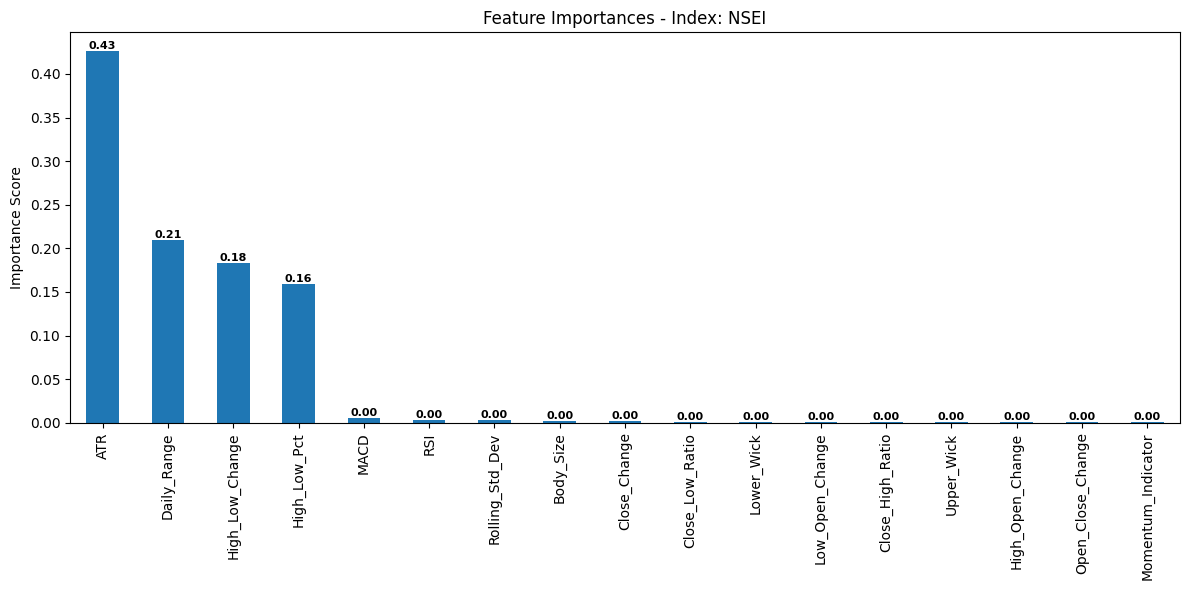

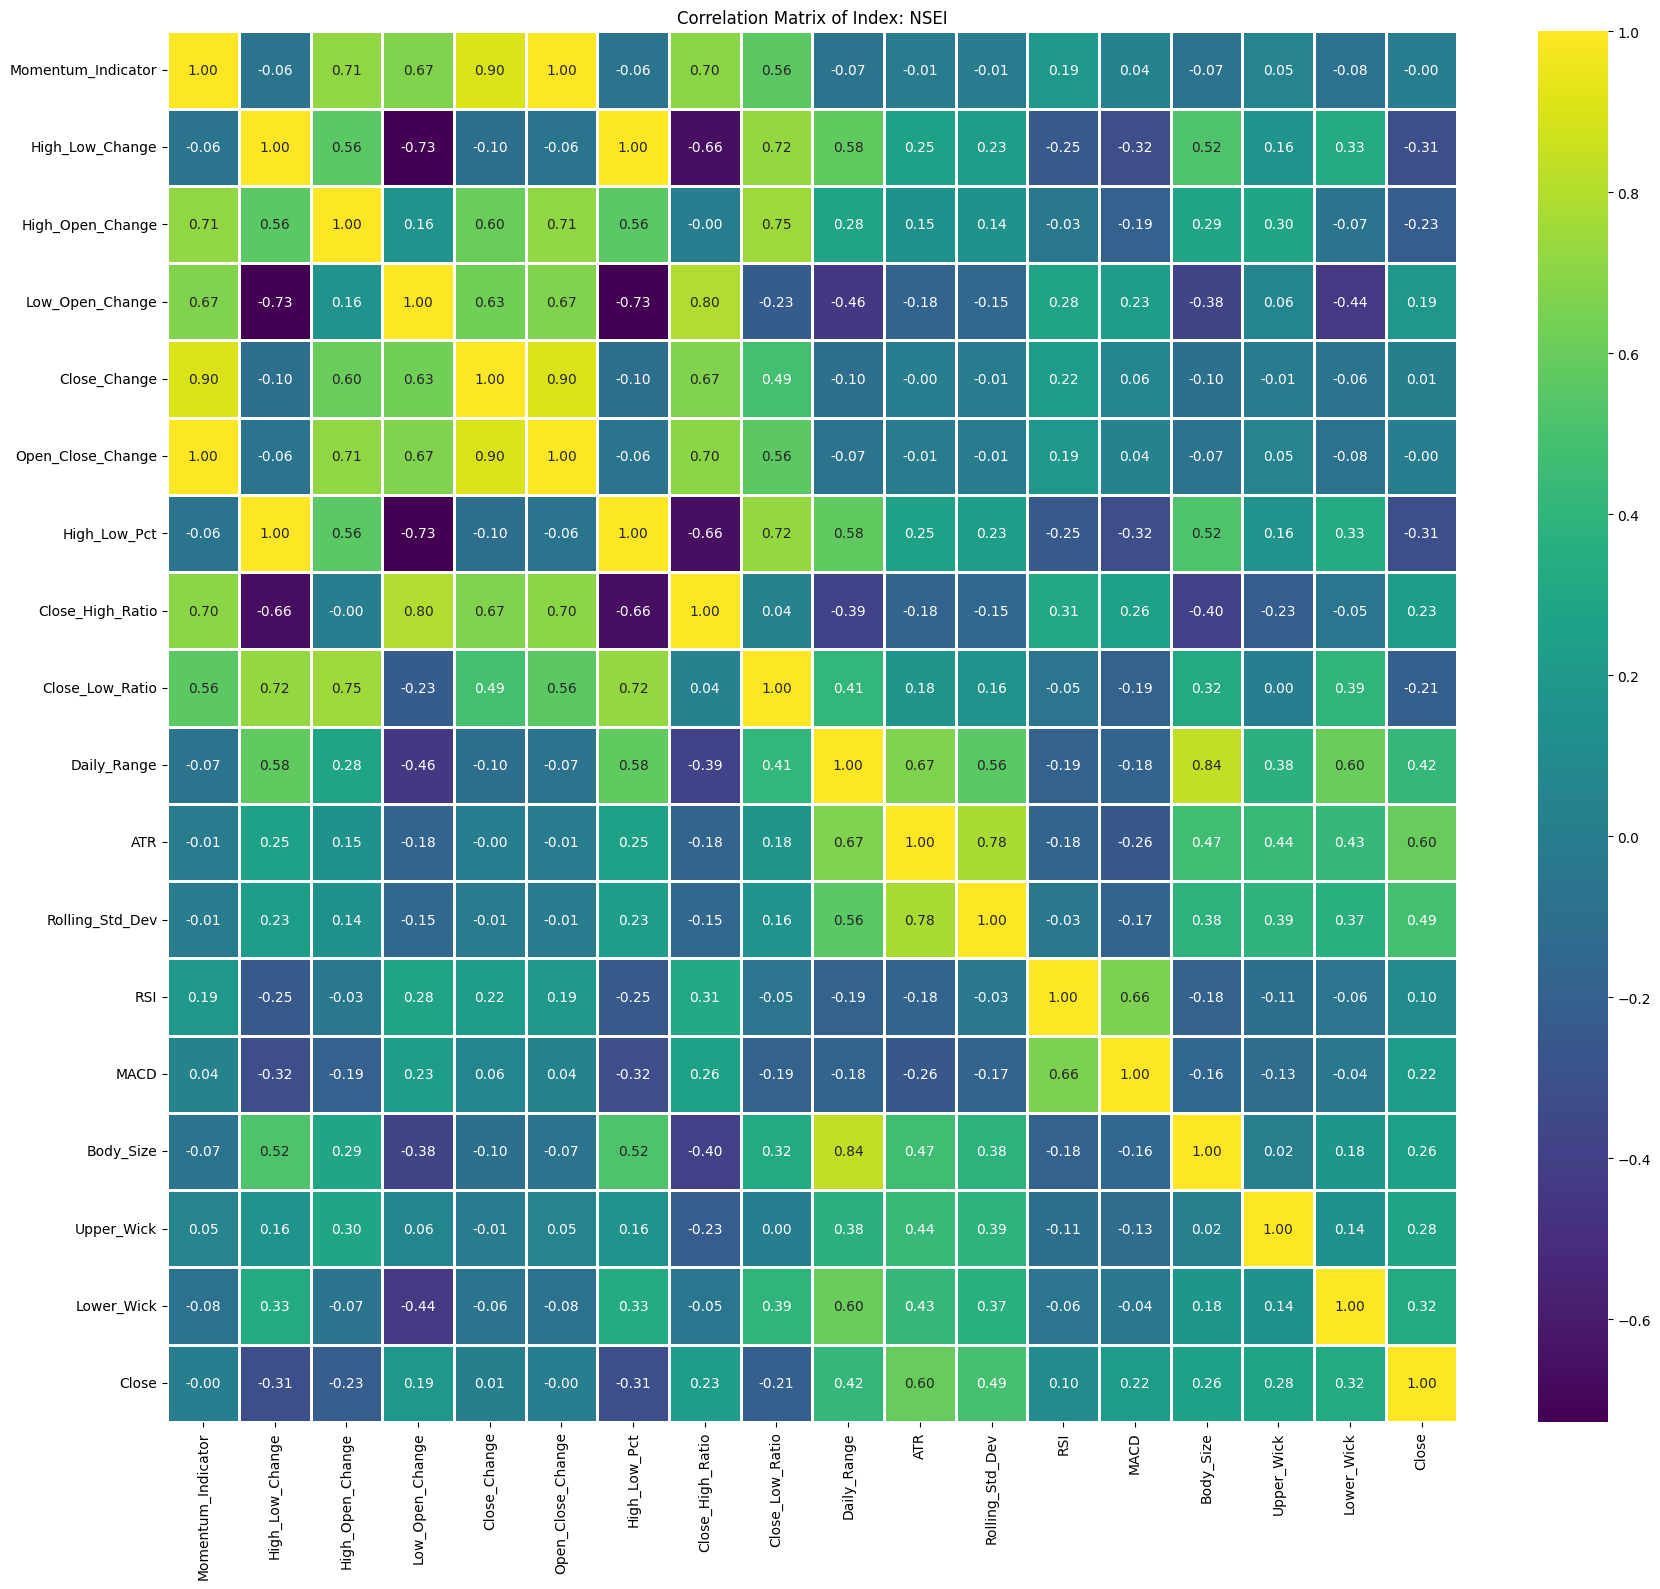


Processing Index: NSEBANK

Index: NSEBANK - Feature Importances:
ATR                   0.567156
Daily_Range           0.178449
High_Low_Change       0.122675
High_Low_Pct          0.119855
MACD                  0.002696
Body_Size             0.001520
Rolling_Std_Dev       0.001456
RSI                   0.001058
Upper_Wick            0.000769
Close_High_Ratio      0.000751
Close_Change          0.000665
Low_Open_Change       0.000663
Lower_Wick            0.000626
Close_Low_Ratio       0.000597
High_Open_Change      0.000402
Open_Close_Change     0.000343
Momentum_Indicator    0.000318
dtype: float64


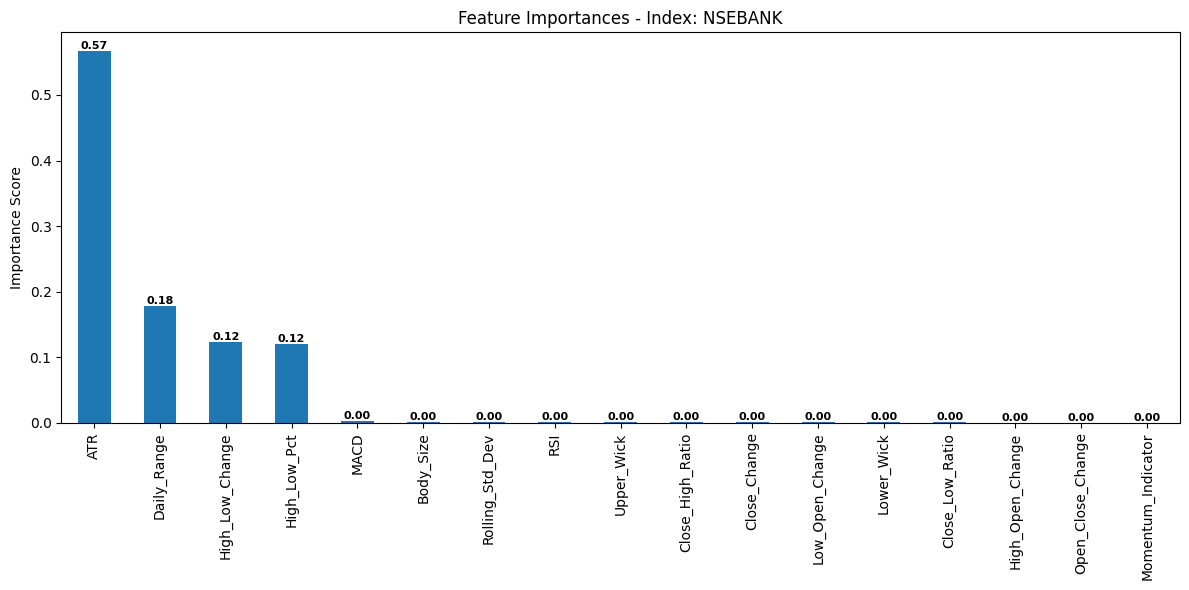

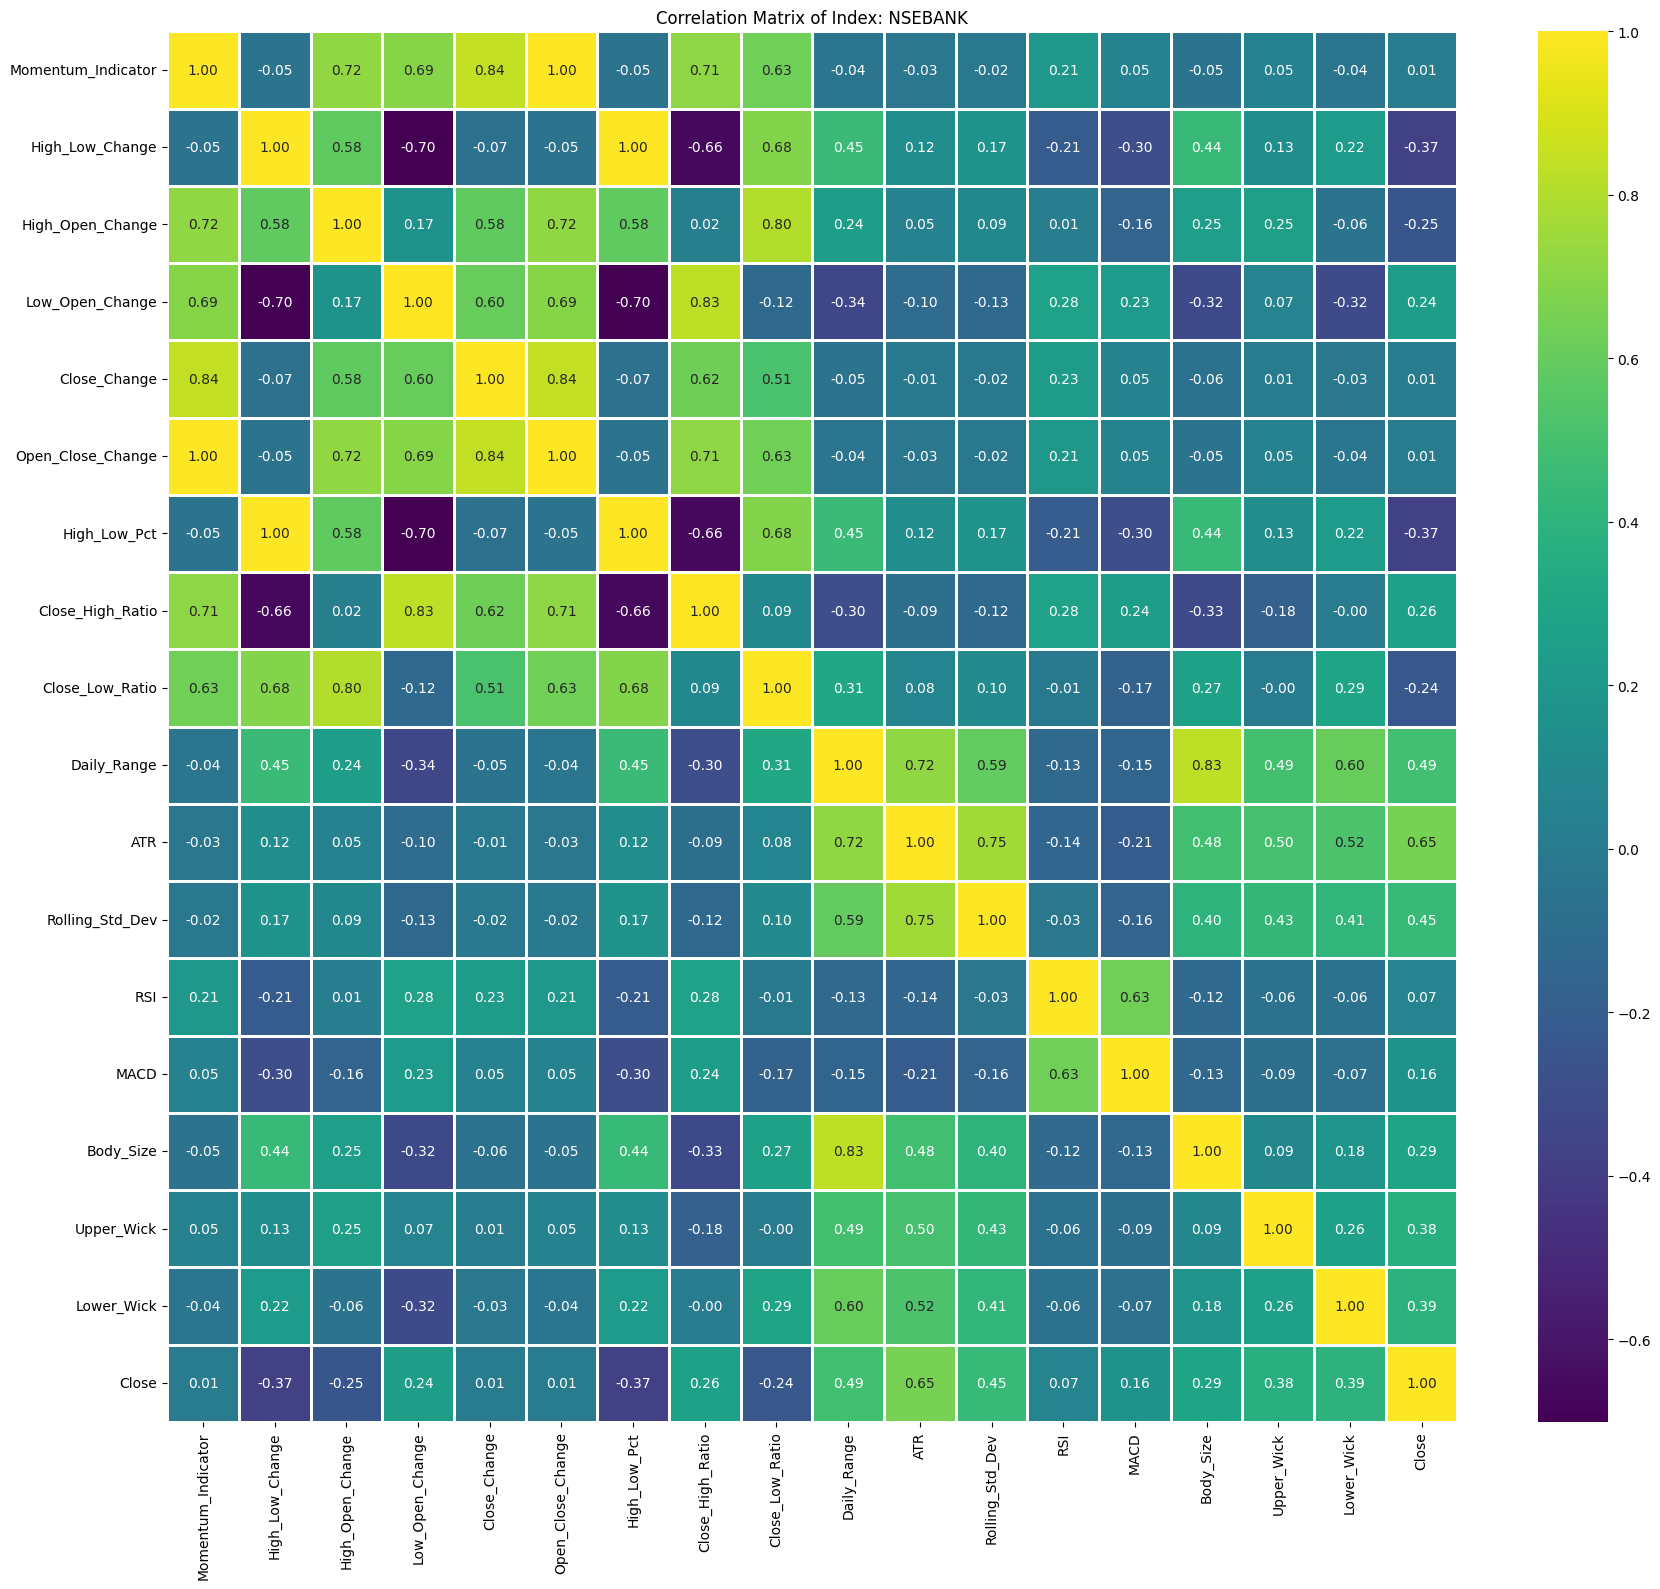


Processing Index: CNXIT

Index: CNXIT - Feature Importances:
ATR                   0.865487
Daily_Range           0.036912
High_Low_Change       0.028581
High_Low_Pct          0.027556
MACD                  0.022466
Rolling_Std_Dev       0.003088
RSI                   0.002861
Body_Size             0.002490
Close_High_Ratio      0.001961
Upper_Wick            0.001601
Low_Open_Change       0.001294
Lower_Wick            0.001235
High_Open_Change      0.001126
Close_Low_Ratio       0.001098
Close_Change          0.001094
Momentum_Indicator    0.000629
Open_Close_Change     0.000520
dtype: float64


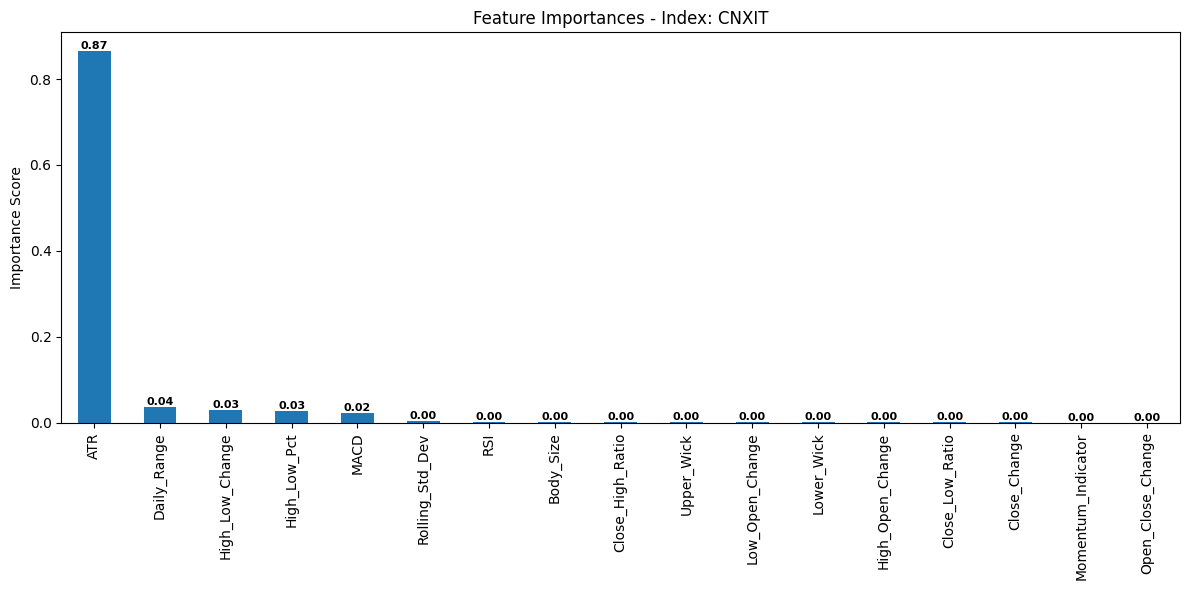

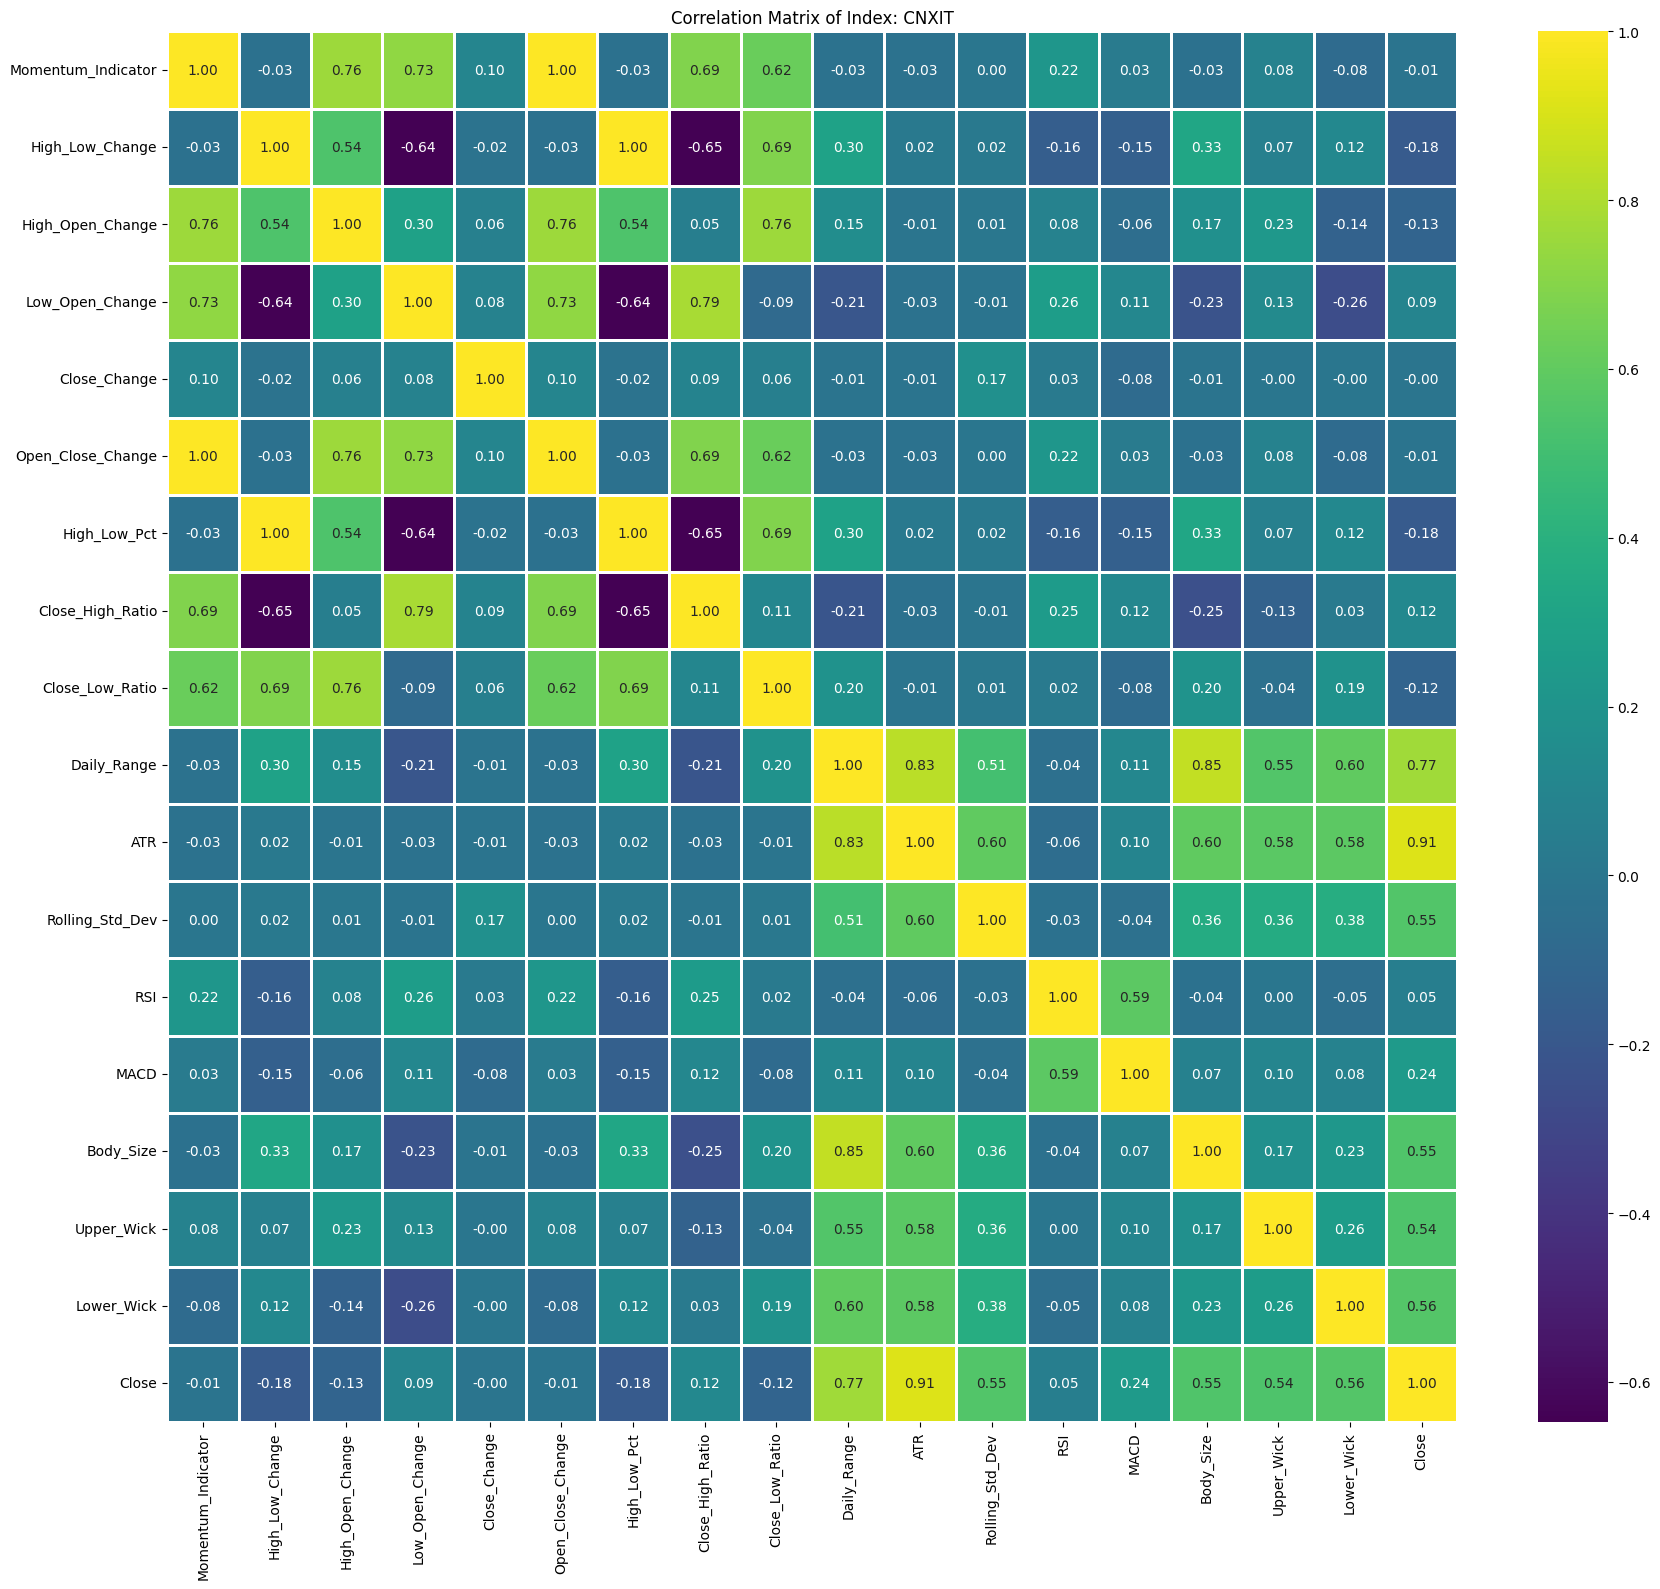


Processing Index: BSESN

Index: BSESN - Feature Importances:
ATR                   0.703340
Daily_Range           0.108969
High_Low_Change       0.090497
High_Low_Pct          0.082563
MACD                  0.006092
Rolling_Std_Dev       0.001504
RSI                   0.001223
Body_Size             0.001030
Close_Change          0.000827
Lower_Wick            0.000730
Low_Open_Change       0.000674
Close_Low_Ratio       0.000668
Close_High_Ratio      0.000566
Upper_Wick            0.000463
High_Open_Change      0.000356
Open_Close_Change     0.000254
Momentum_Indicator    0.000244
dtype: float64


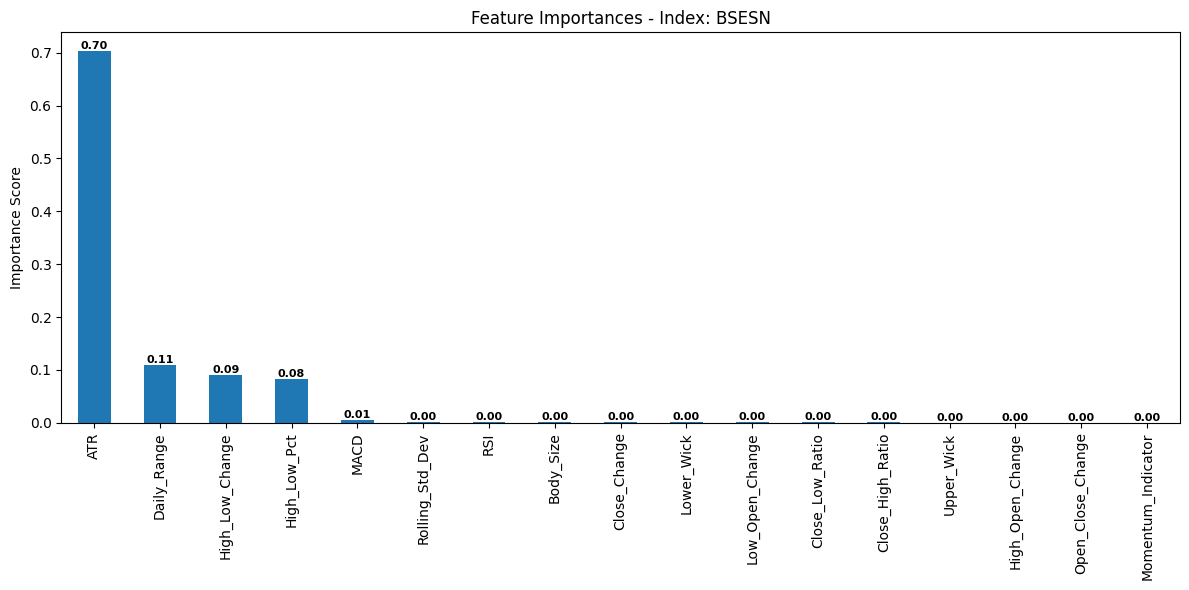

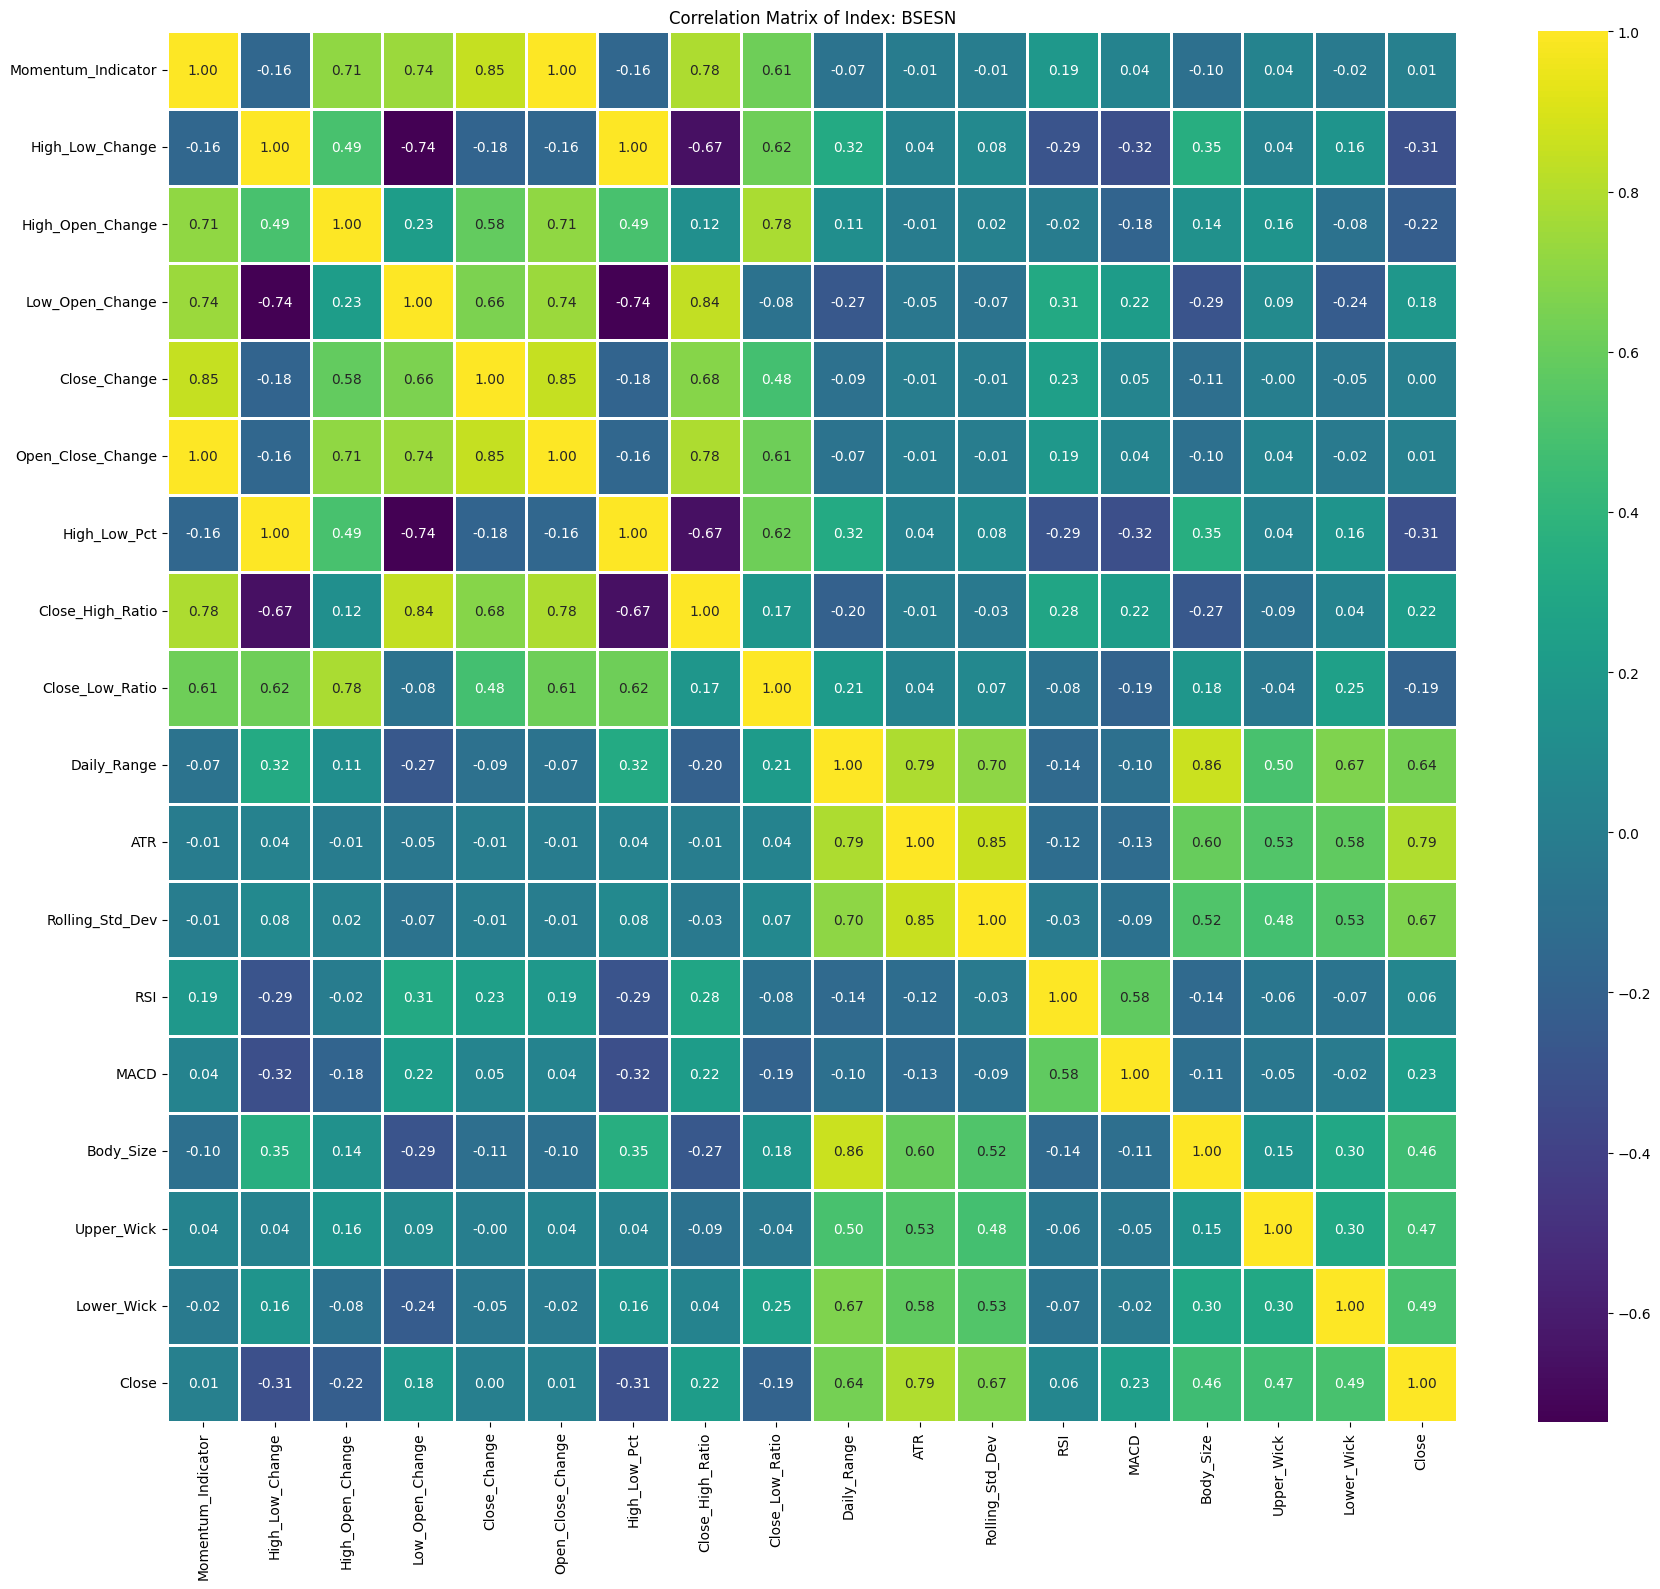


Processing Index: NIFTY_MIDCAP_100

Index: NIFTY_MIDCAP_100 - Feature Importances:
ATR                   0.787226
MACD                  0.073585
Daily_Range           0.043726
High_Low_Change       0.029000
High_Low_Pct          0.027830
RSI                   0.019787
Rolling_Std_Dev       0.006450
Body_Size             0.001775
Close_Low_Ratio       0.001670
High_Open_Change      0.001475
Lower_Wick            0.001433
Low_Open_Change       0.001422
Close_Change          0.001216
Close_High_Ratio      0.001206
Upper_Wick            0.001195
Momentum_Indicator    0.000520
Open_Close_Change     0.000482
dtype: float64


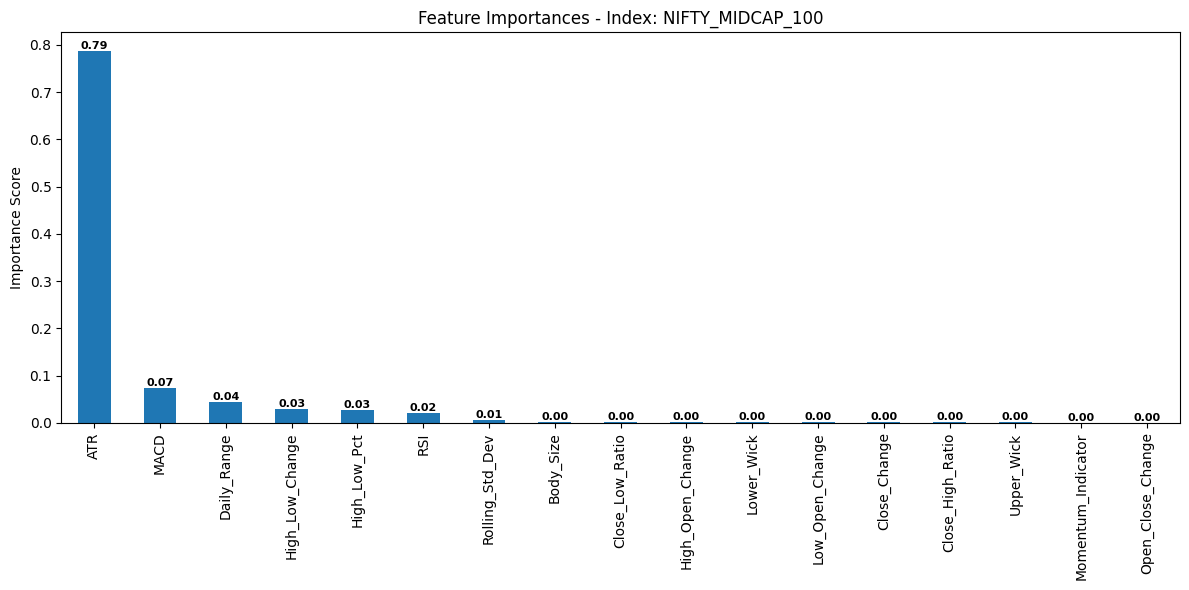

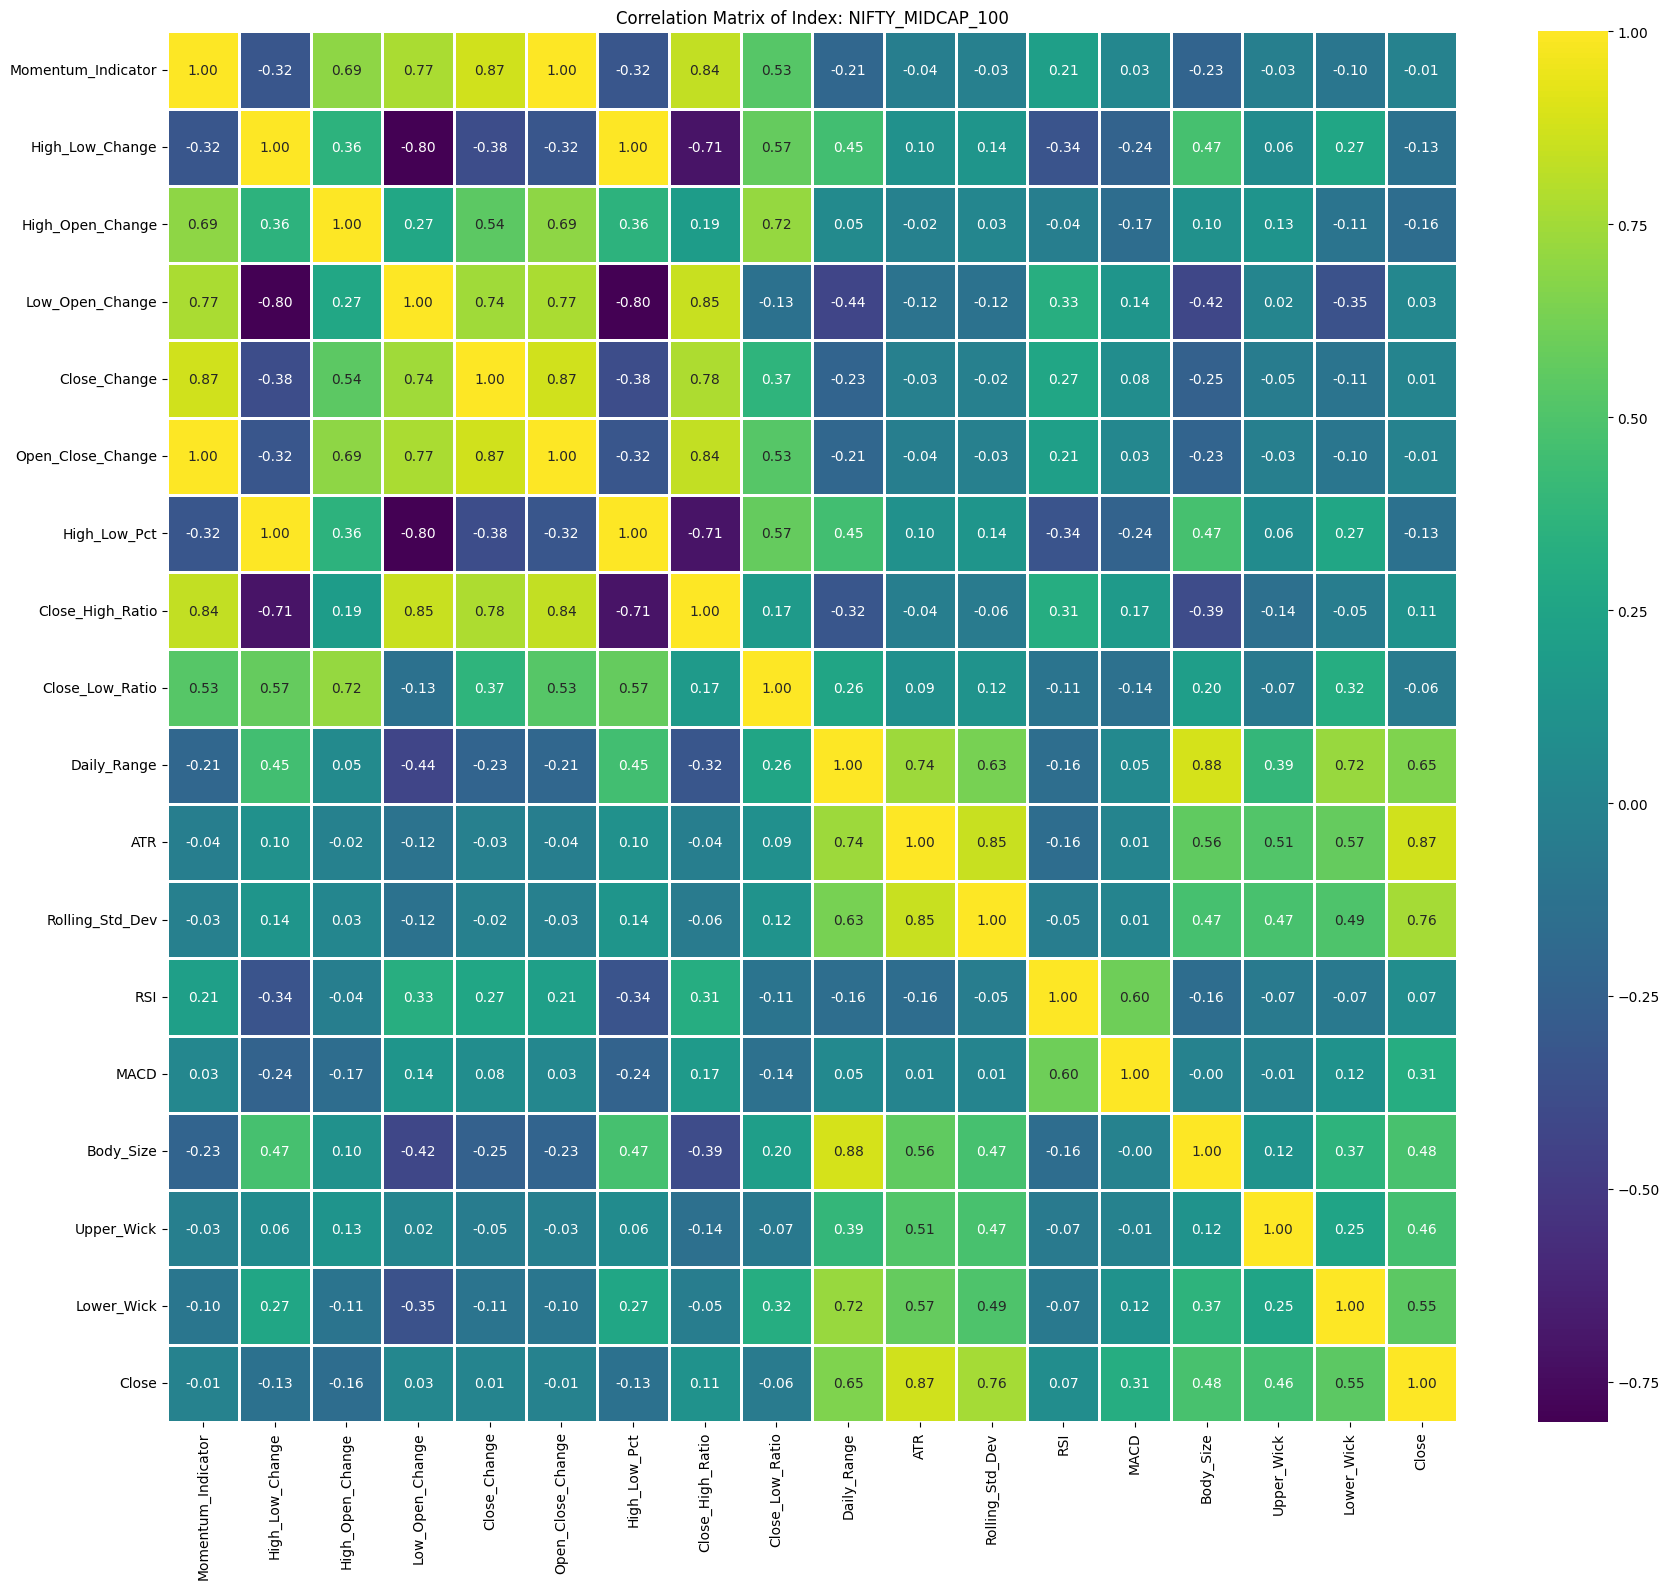


Processing Index: CNXPSUBANK

Index: CNXPSUBANK - Feature Importances:
ATR                   0.522844
Daily_Range           0.204335
High_Low_Pct          0.103906
High_Low_Change       0.100925
MACD                  0.025403
Rolling_Std_Dev       0.007984
Body_Size             0.006283
RSI                   0.005272
Close_High_Ratio      0.004302
Lower_Wick            0.002978
Low_Open_Change       0.002882
Close_Low_Ratio       0.002740
Close_Change          0.002363
Upper_Wick            0.002342
High_Open_Change      0.002251
Momentum_Indicator    0.001653
Open_Close_Change     0.001538
dtype: float64


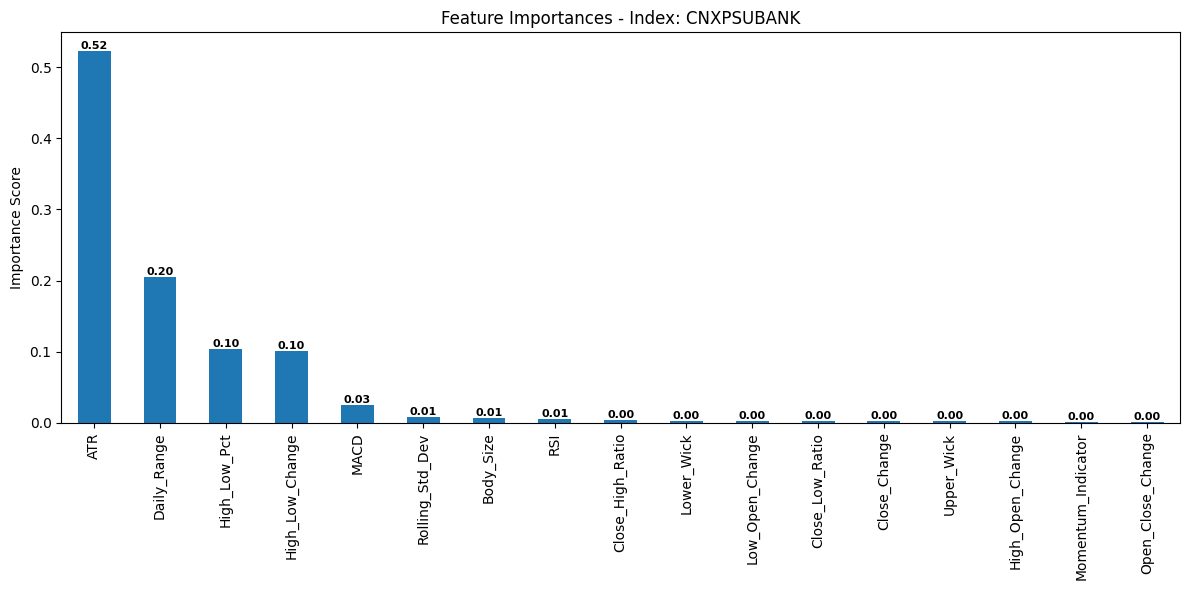

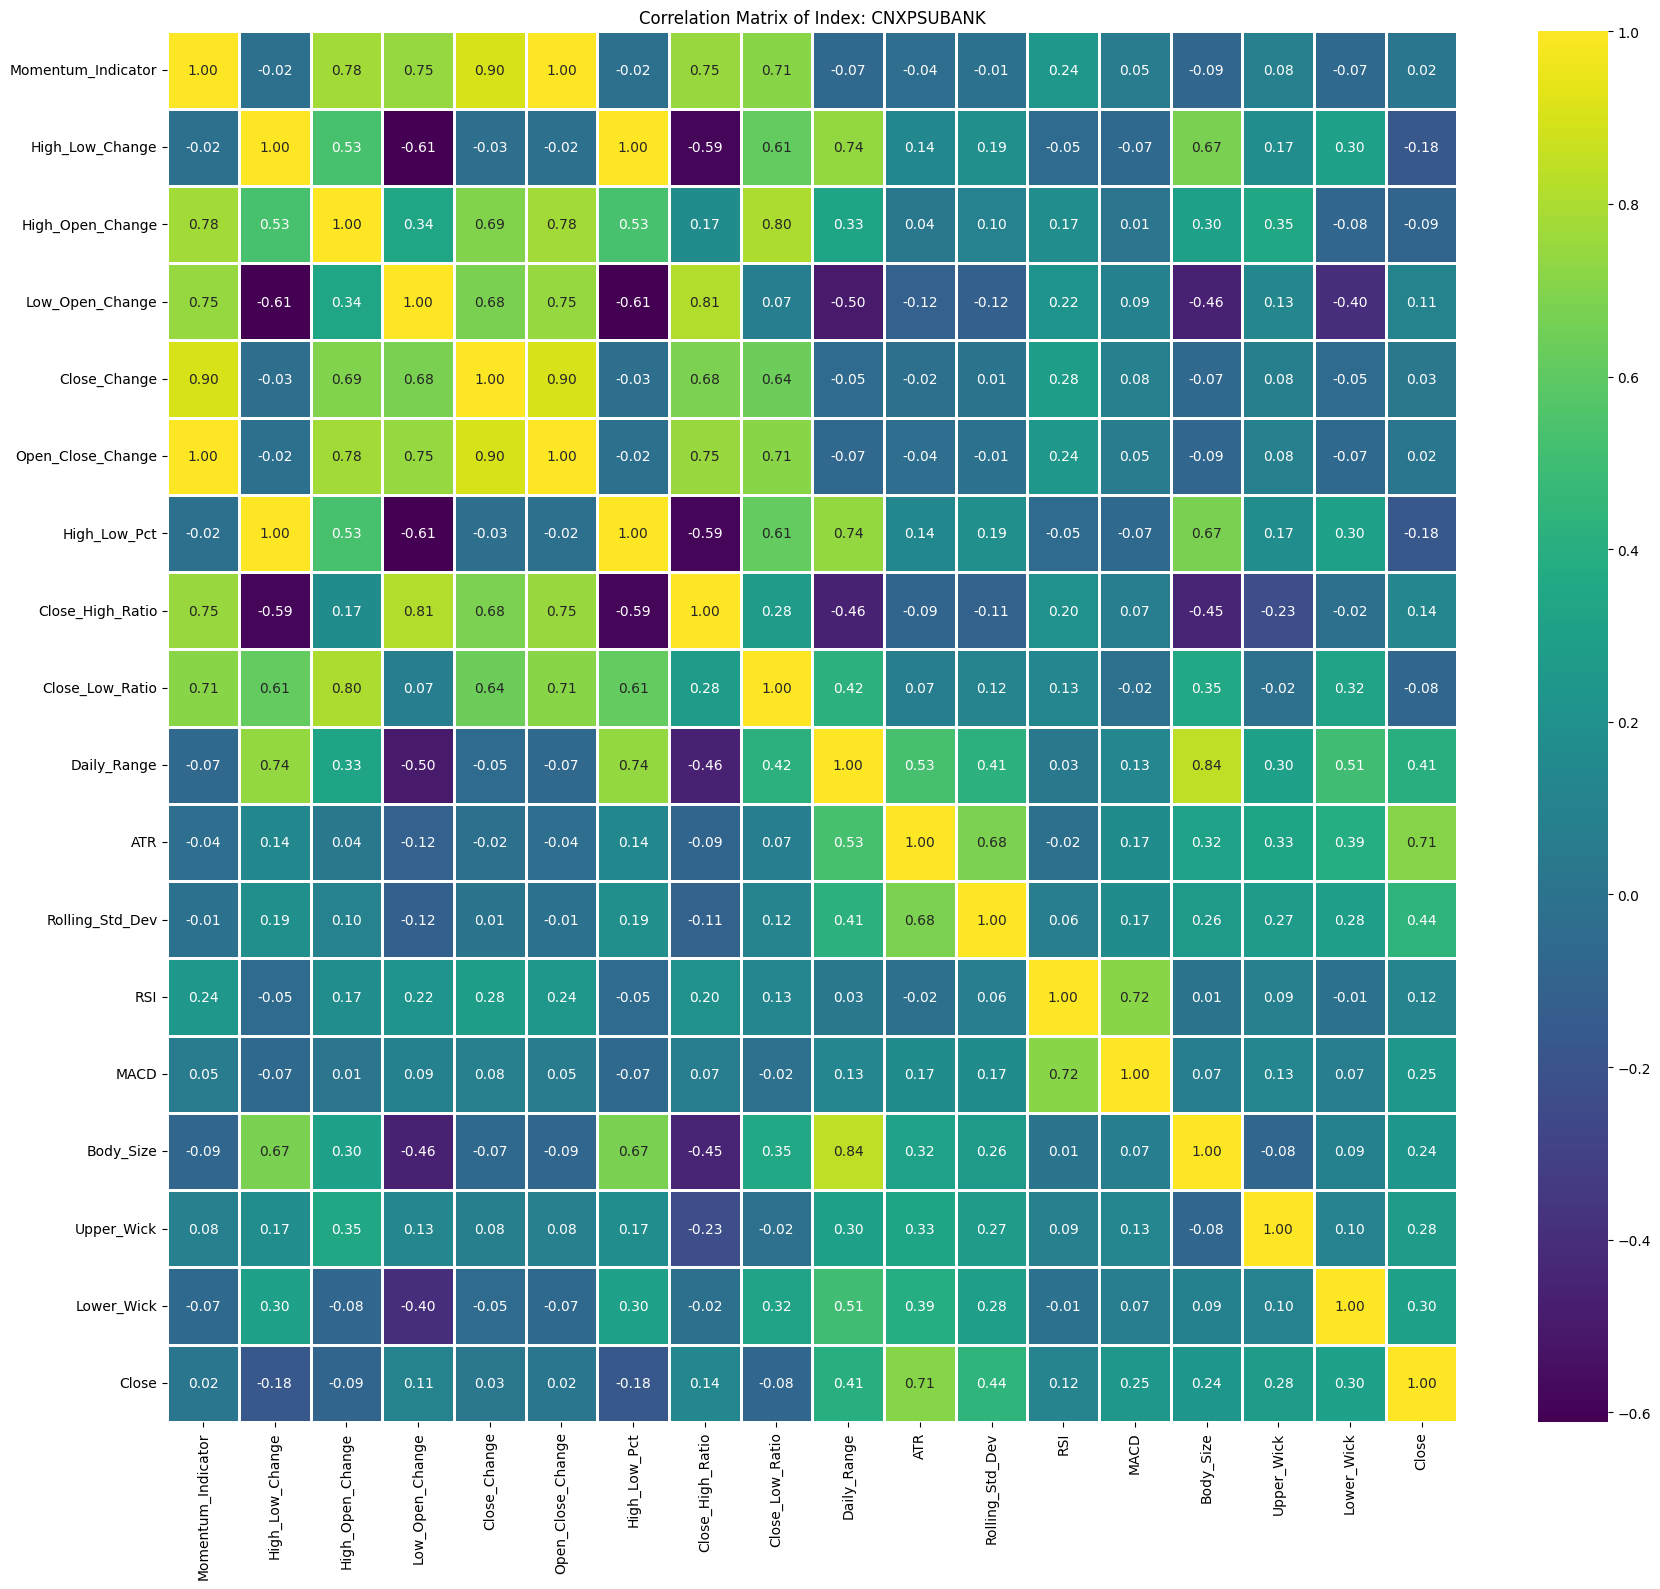


Processing Index: CNXAUTO

Index: CNXAUTO - Feature Importances:
ATR                   0.716861
Daily_Range           0.079793
High_Low_Change       0.067950
High_Low_Pct          0.056790
MACD                  0.042300
Rolling_Std_Dev       0.008441
RSI                   0.008284
Body_Size             0.004640
Lower_Wick            0.002451
Close_High_Ratio      0.002445
Close_Change          0.002221
Low_Open_Change       0.001731
Close_Low_Ratio       0.001694
High_Open_Change      0.001519
Upper_Wick            0.001369
Open_Close_Change     0.000791
Momentum_Indicator    0.000719
dtype: float64


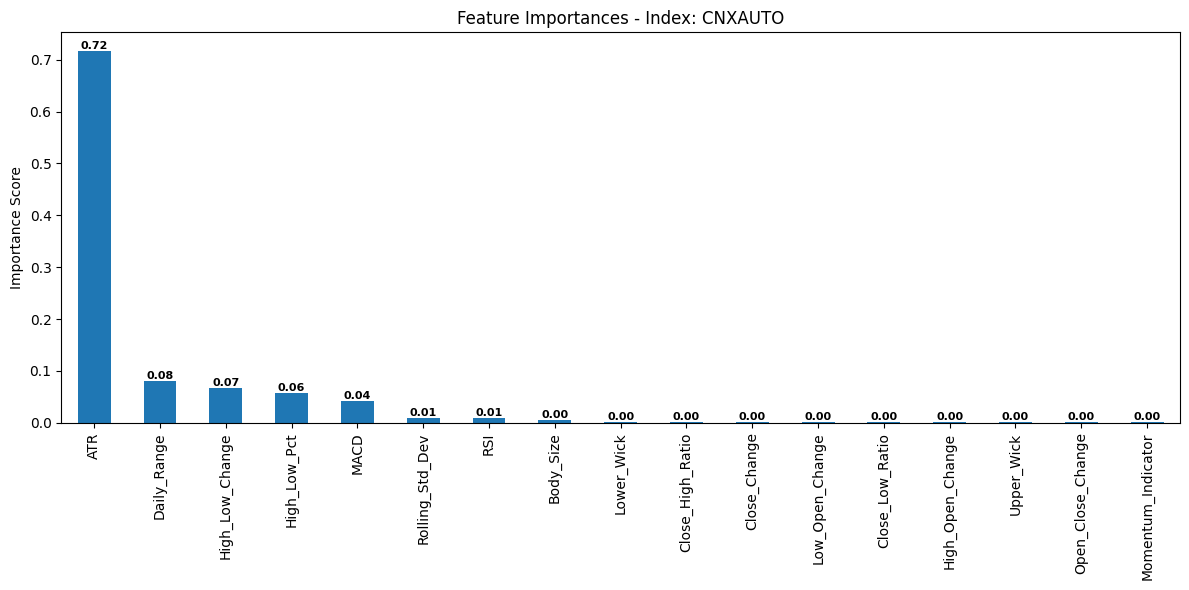

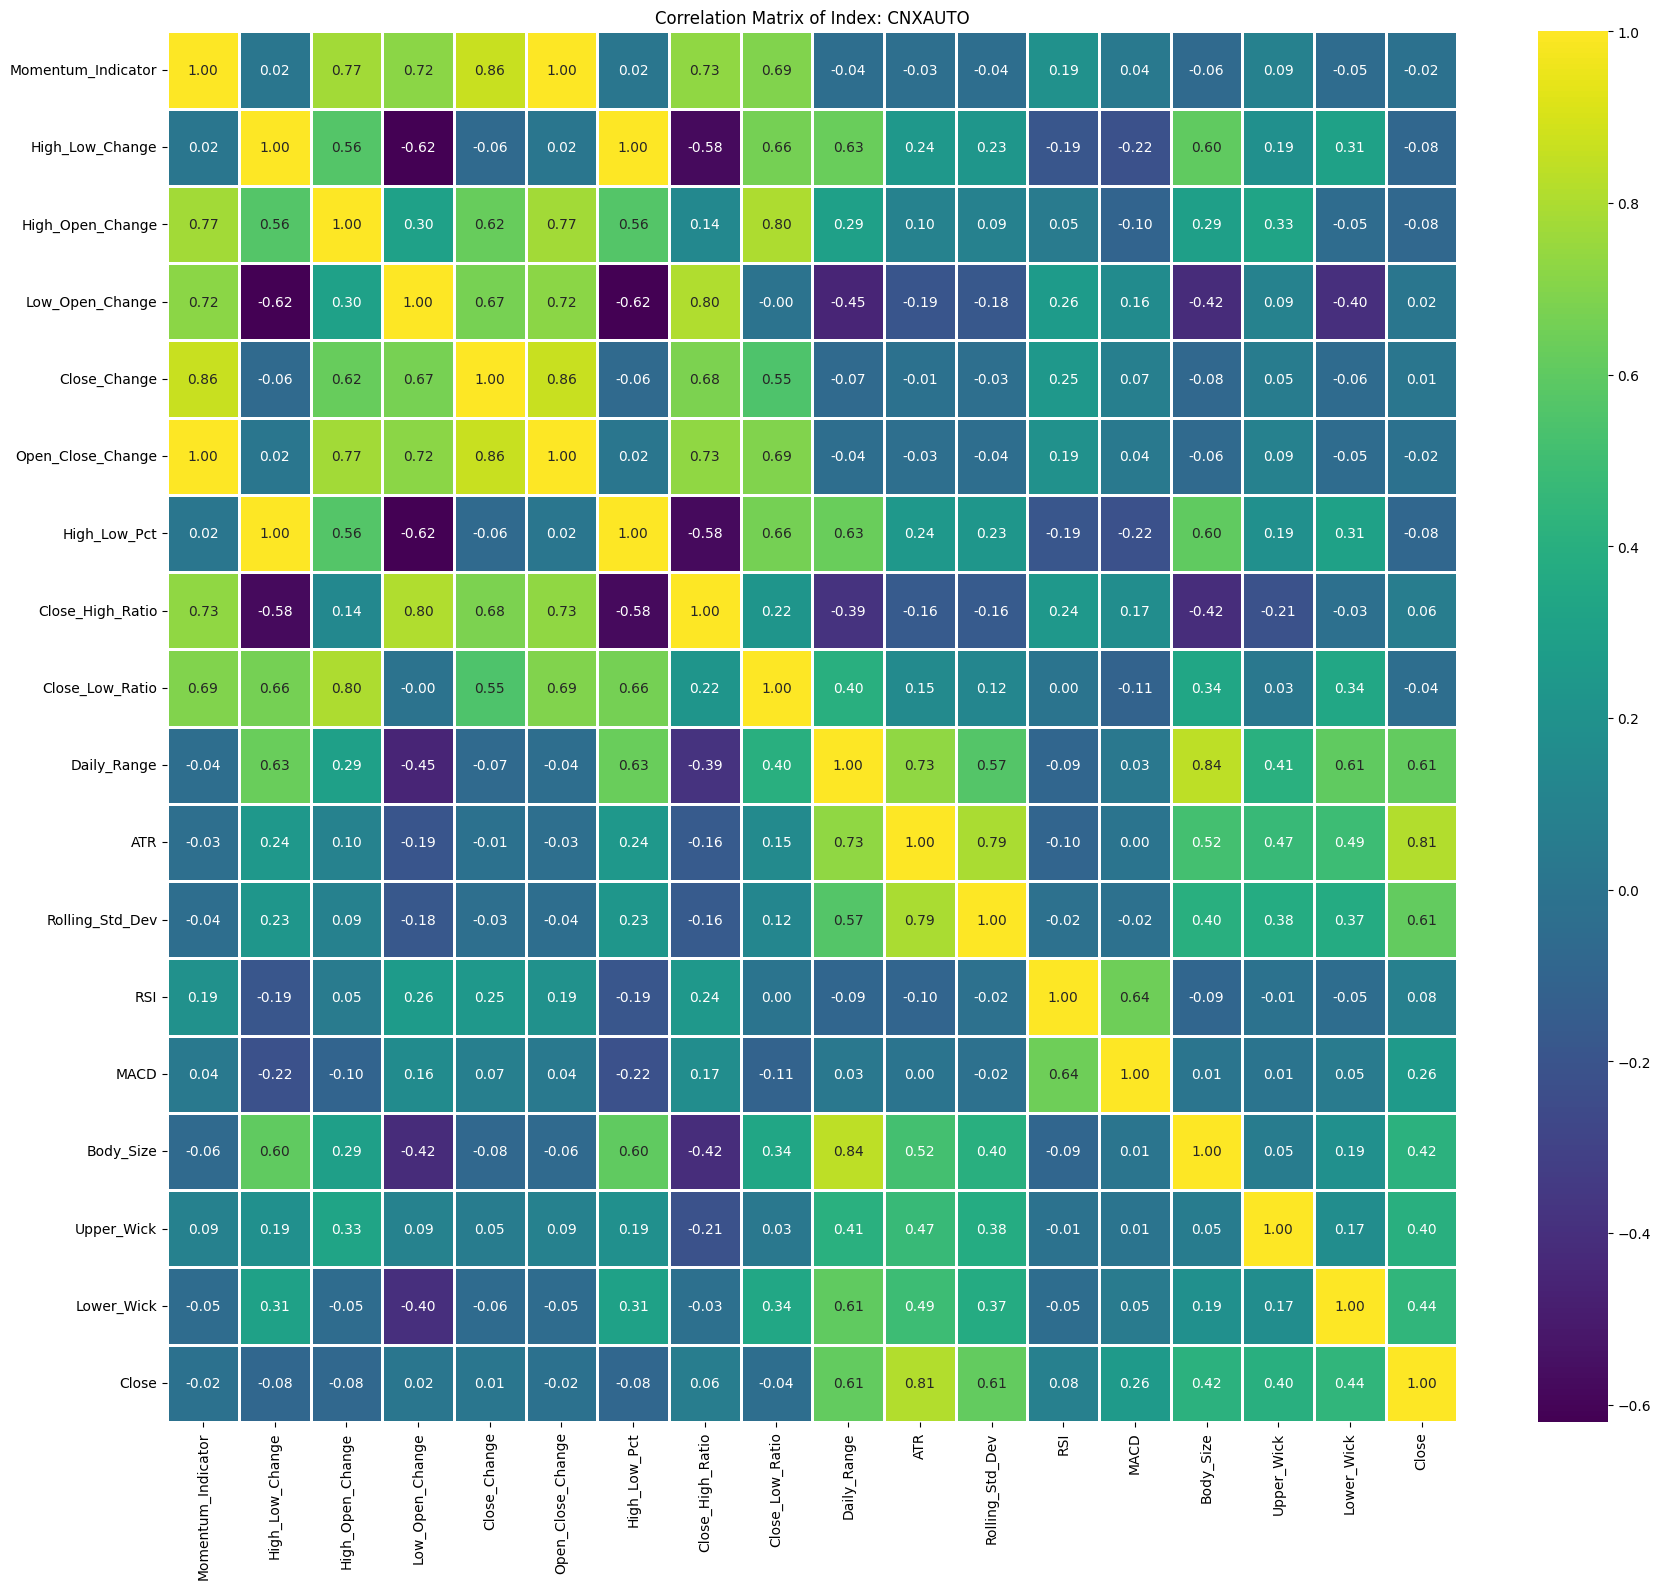


Processing Index: NIFTY_FIN_SERVICE

Index: NIFTY_FIN_SERVICE - Feature Importances:
ATR                   0.681966
Daily_Range           0.127594
High_Low_Change       0.085704
High_Low_Pct          0.081131
MACD                  0.008727
Rolling_Std_Dev       0.002483
Body_Size             0.002121
RSI                   0.001720
Close_High_Ratio      0.001530
Low_Open_Change       0.001199
Close_Low_Ratio       0.001111
Lower_Wick            0.001065
Upper_Wick            0.000997
Close_Change          0.000866
High_Open_Change      0.000756
Open_Close_Change     0.000519
Momentum_Indicator    0.000512
dtype: float64


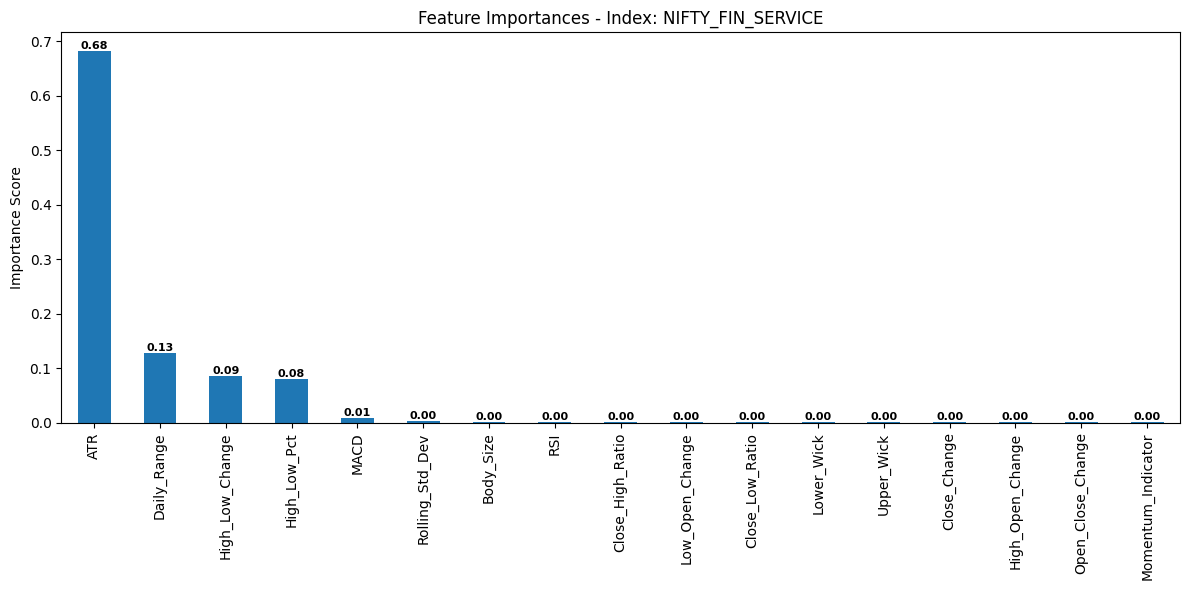

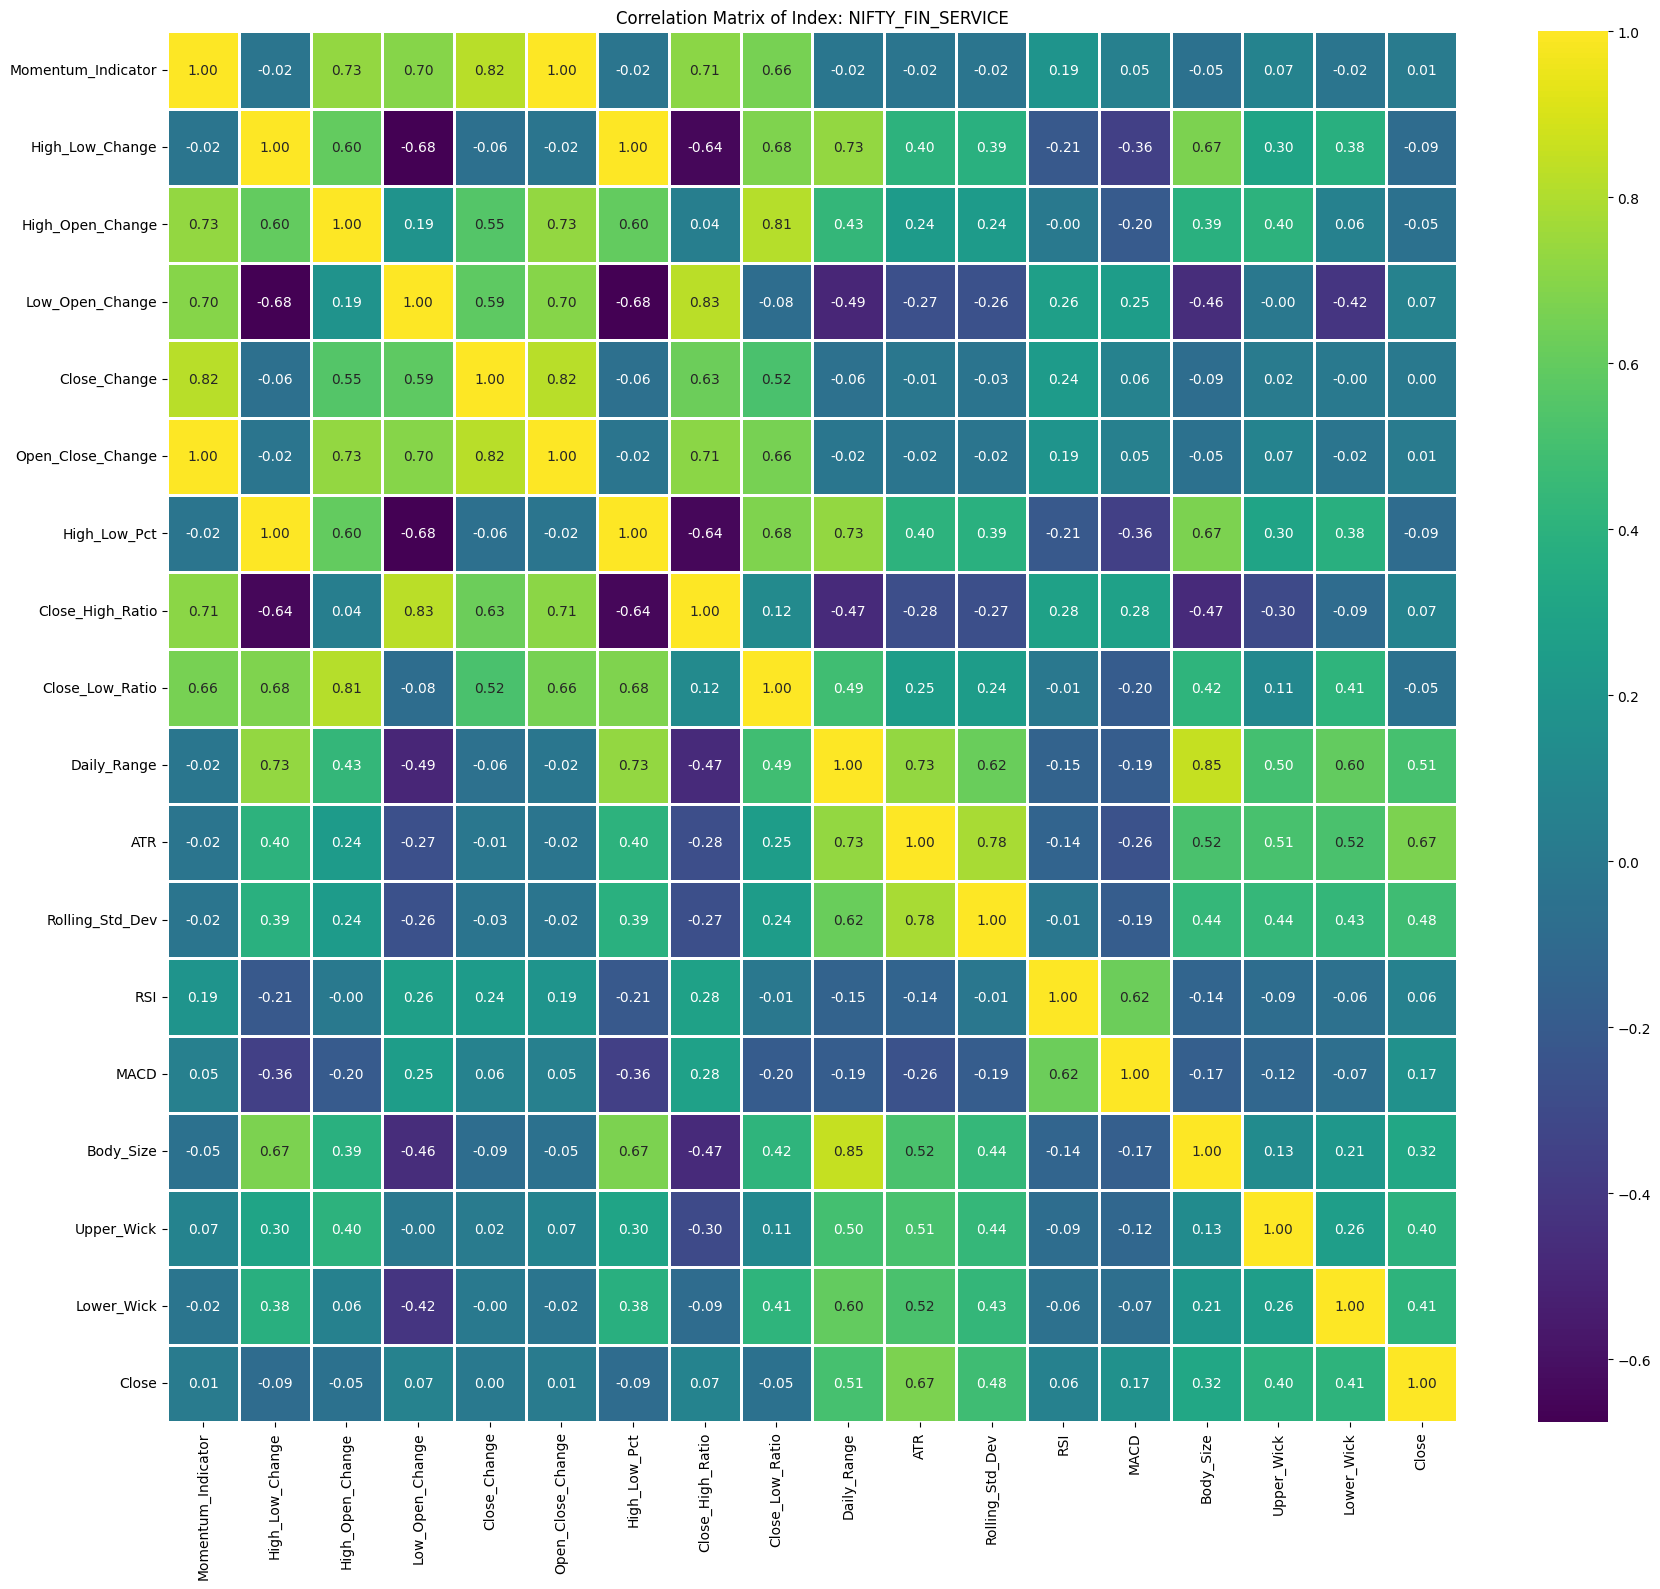

ATR                   0.681966
Daily_Range           0.127594
High_Low_Change       0.085704
High_Low_Pct          0.081131
MACD                  0.008727
Rolling_Std_Dev       0.002483
Body_Size             0.002121
RSI                   0.001720
Close_High_Ratio      0.001530
Low_Open_Change       0.001199
Close_Low_Ratio       0.001111
Lower_Wick            0.001065
Upper_Wick            0.000997
Close_Change          0.000866
High_Open_Change      0.000756
Open_Close_Change     0.000519
Momentum_Indicator    0.000512
dtype: float64

In [32]:
index_excel_file = '../Data/Index_Data.xlsx'
all_indexes = pd.read_excel(index_excel_file, sheet_name=None)

print("### Feature Selection for Each Index ###")
for sheet_name, df in all_indexes.items():
    asset_identifier = f"Index: {sheet_name}"
    print(f"\nProcessing {asset_identifier}")
    feat_imp = select_features_rf(df, asset_name=asset_identifier)
    
feat_imp

### Feature Selection for Mutual Funds

### Feature Selection for Each Mutual Fund ###

Processing Mutual Fund: 0P00005WL6

Mutual Fund: 0P00005WL6 - Feature Importances:
Rolling_Std_Dev       0.362024
MACD                  0.300649
RSI                   0.194222
Close_Change          0.143106
Momentum_Indicator    0.000000
Daily_Range           0.000000
Upper_Wick            0.000000
Body_Size             0.000000
ATR                   0.000000
Close_Low_Ratio       0.000000
High_Low_Change       0.000000
Close_High_Ratio      0.000000
High_Low_Pct          0.000000
Open_Close_Change     0.000000
Low_Open_Change       0.000000
High_Open_Change      0.000000
Lower_Wick            0.000000
dtype: float64


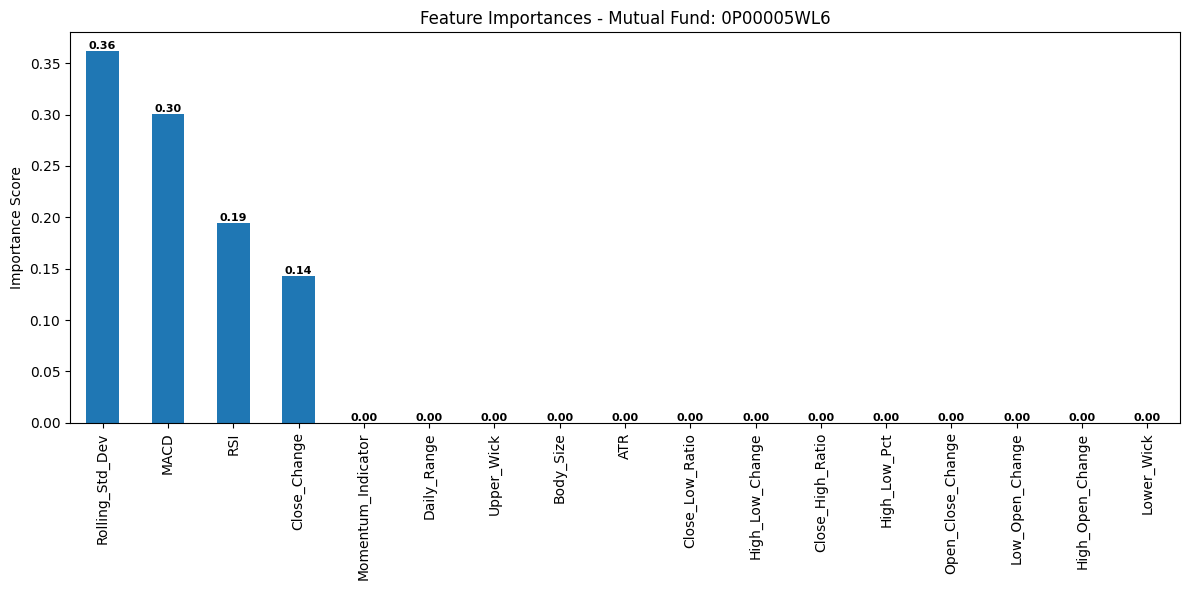

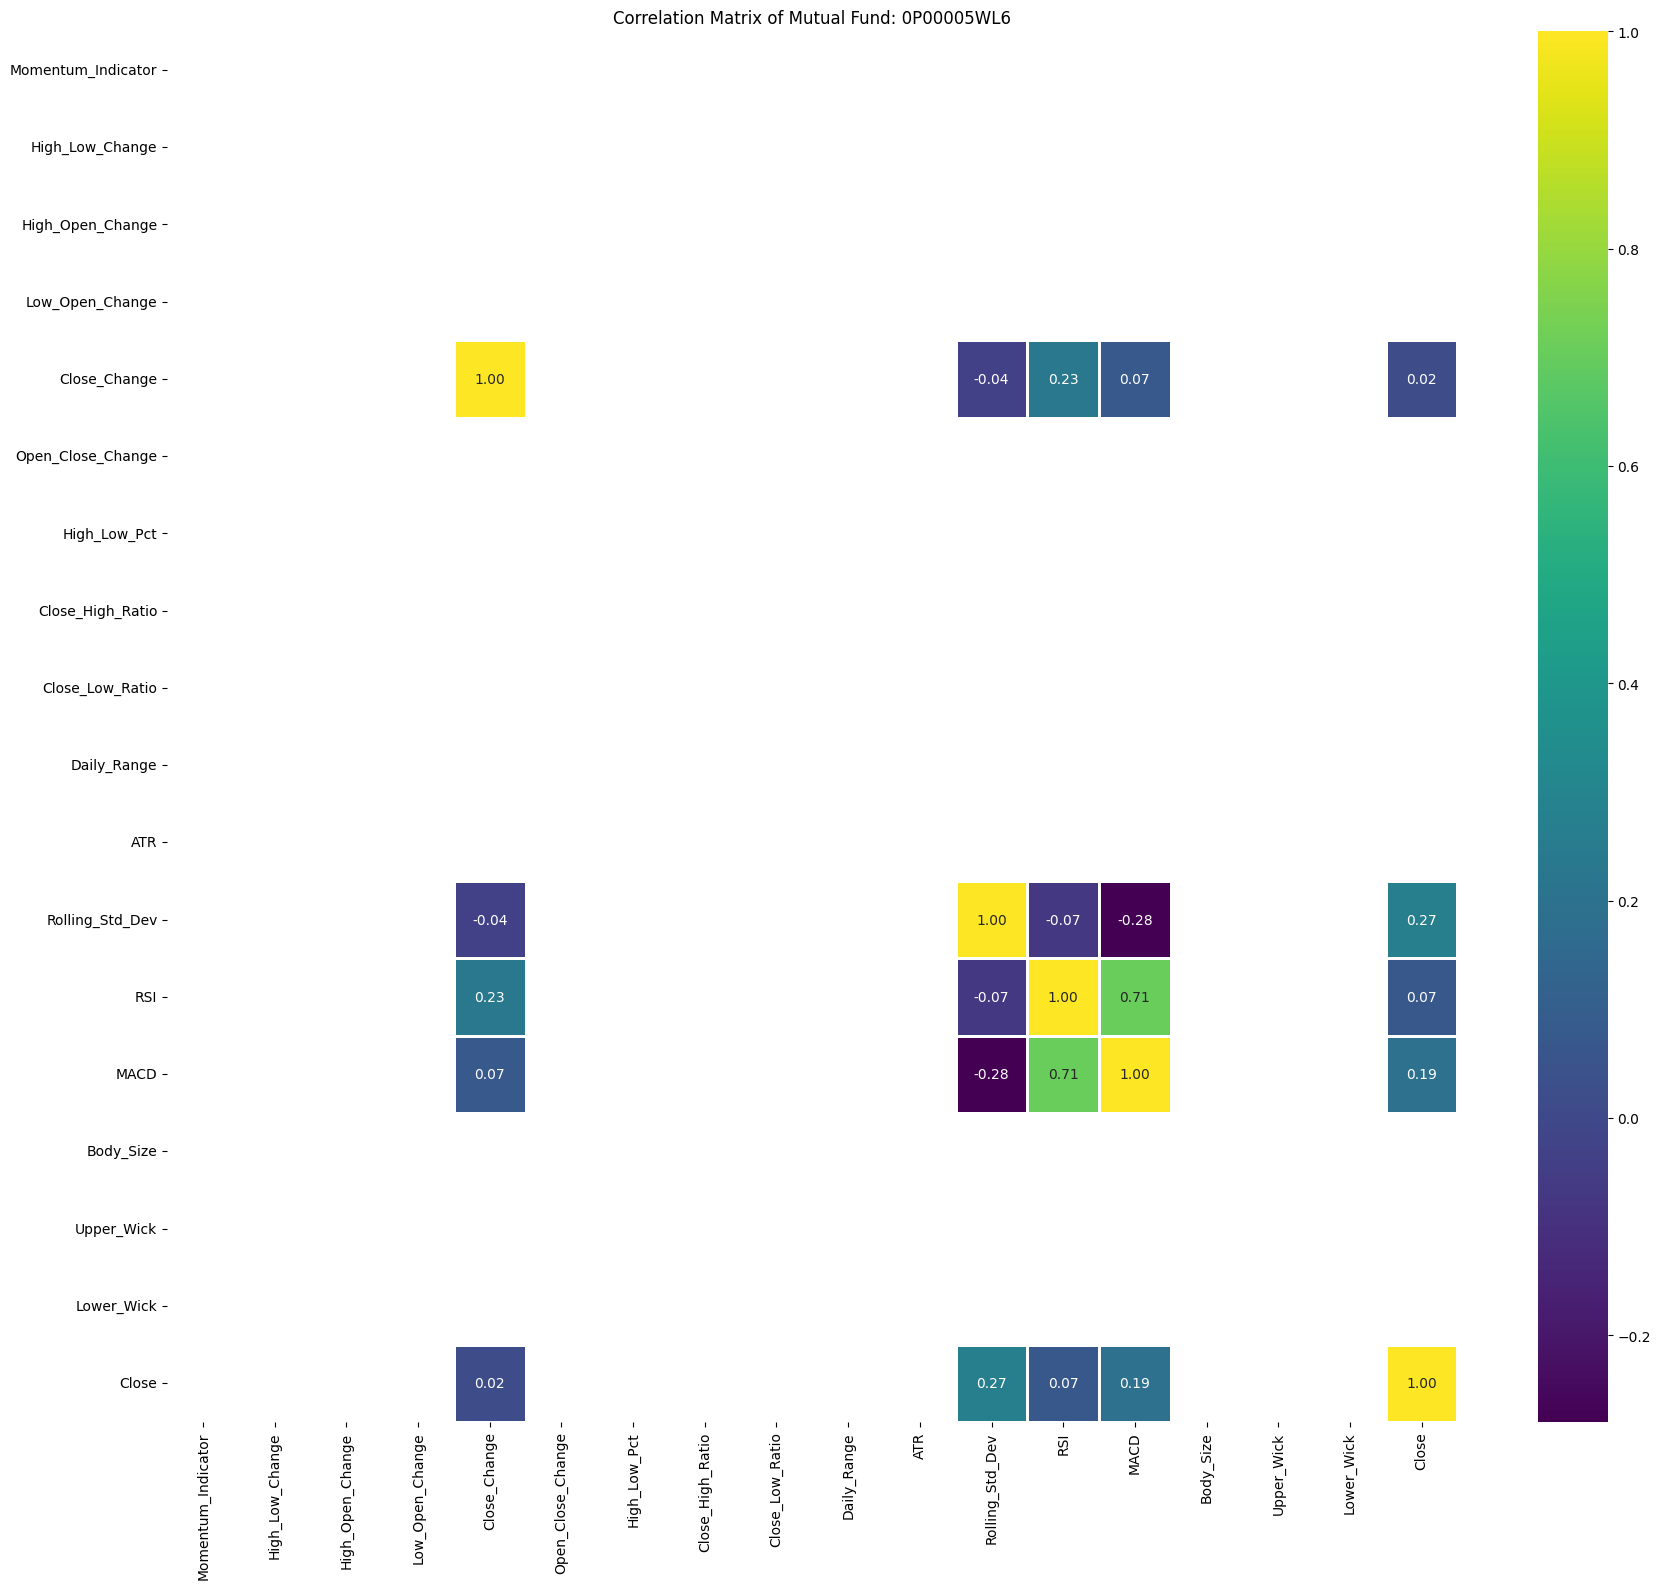


Processing Mutual Fund: UTINEXT50

Mutual Fund: UTINEXT50 - Feature Importances:
ATR                   0.383955
Daily_Range           0.150720
MACD                  0.111567
High_Low_Pct          0.077860
High_Low_Change       0.073195
Close_Low_Ratio       0.058292
Rolling_Std_Dev       0.048670
High_Open_Change      0.021771
RSI                   0.013699
Close_Change          0.012394
Lower_Wick            0.010558
Body_Size             0.009418
Low_Open_Change       0.009355
Upper_Wick            0.006478
Close_High_Ratio      0.006011
Open_Close_Change     0.003088
Momentum_Indicator    0.002971
dtype: float64


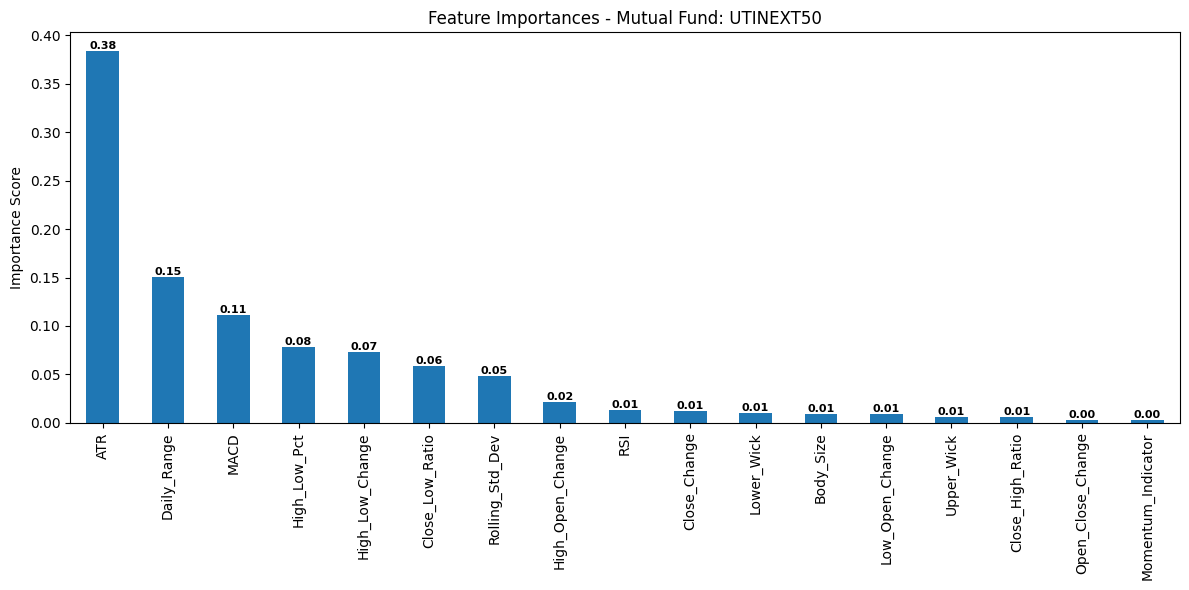

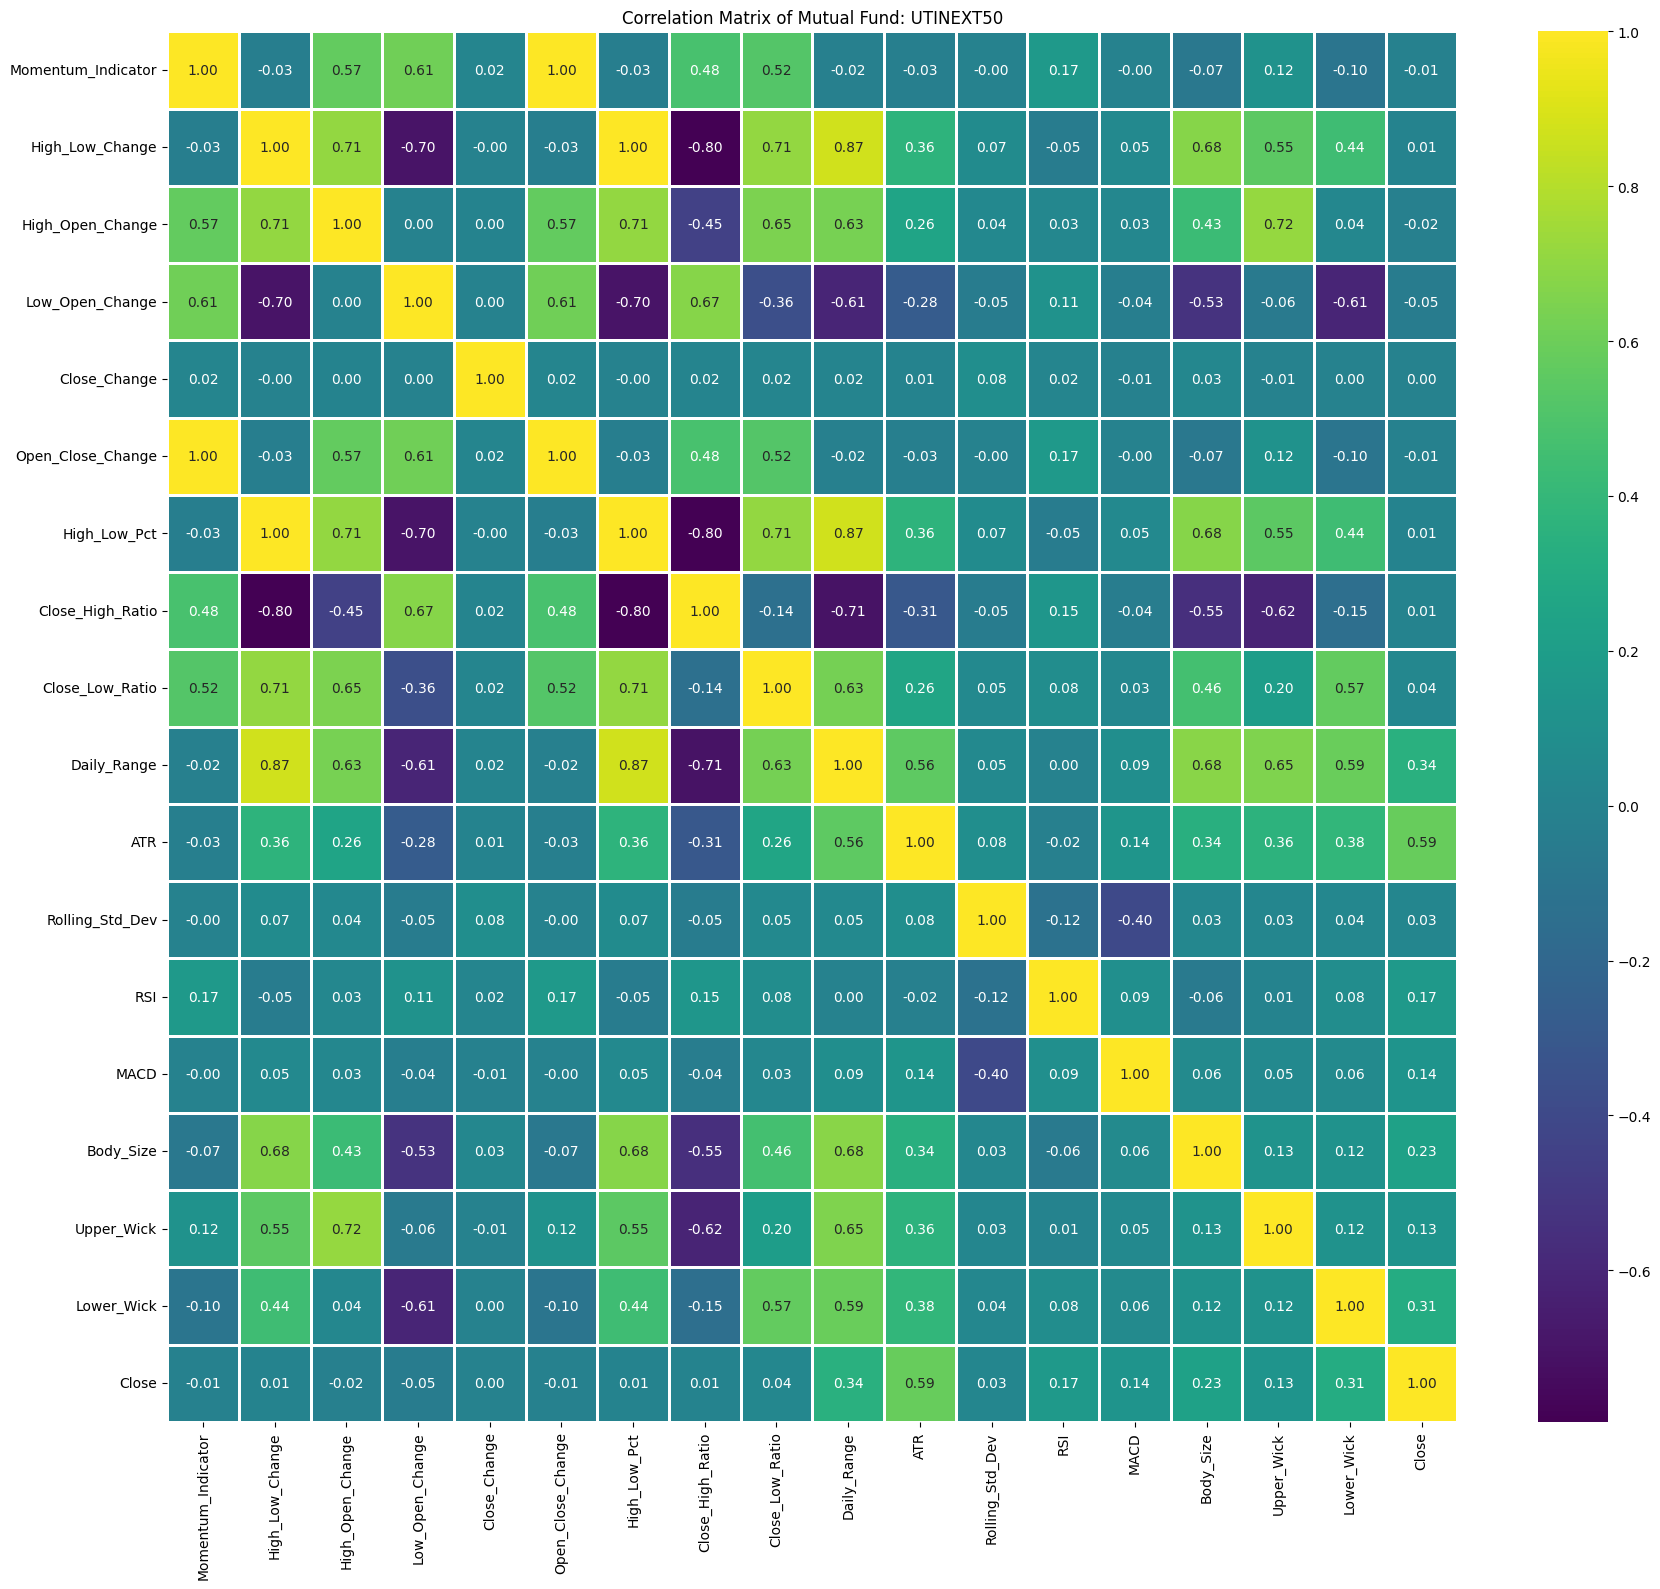


Processing Mutual Fund: 0P0000MLHH

Mutual Fund: 0P0000MLHH - Feature Importances:
Rolling_Std_Dev       0.389989
MACD                  0.308092
RSI                   0.174824
Close_Change          0.127095
Momentum_Indicator    0.000000
Daily_Range           0.000000
Upper_Wick            0.000000
Body_Size             0.000000
ATR                   0.000000
Close_Low_Ratio       0.000000
High_Low_Change       0.000000
Close_High_Ratio      0.000000
High_Low_Pct          0.000000
Open_Close_Change     0.000000
Low_Open_Change       0.000000
High_Open_Change      0.000000
Lower_Wick            0.000000
dtype: float64


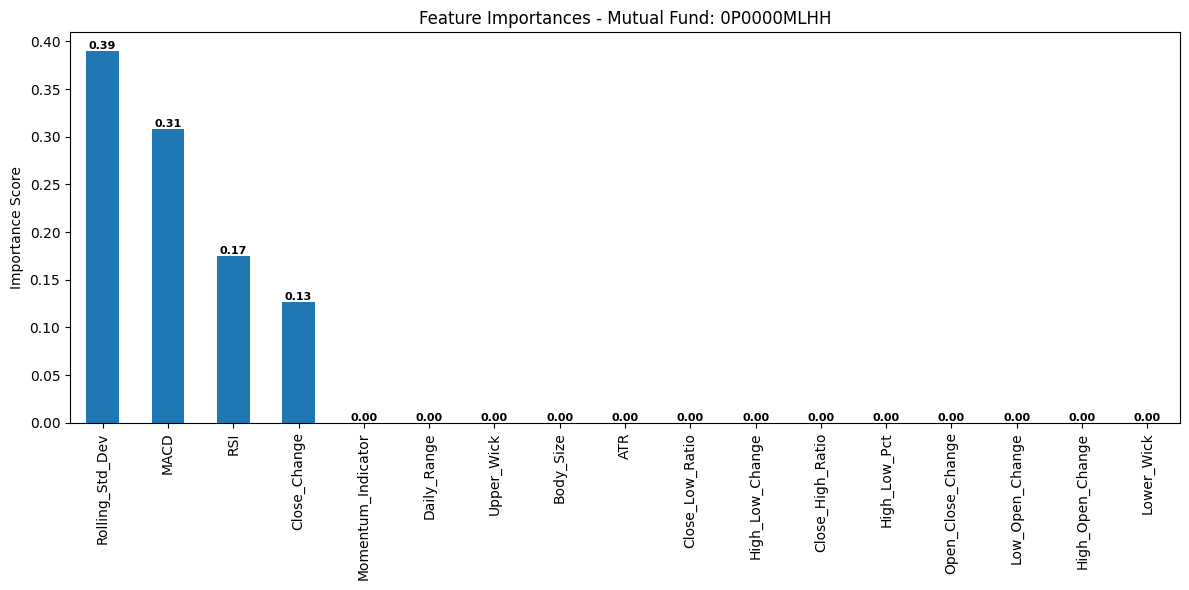

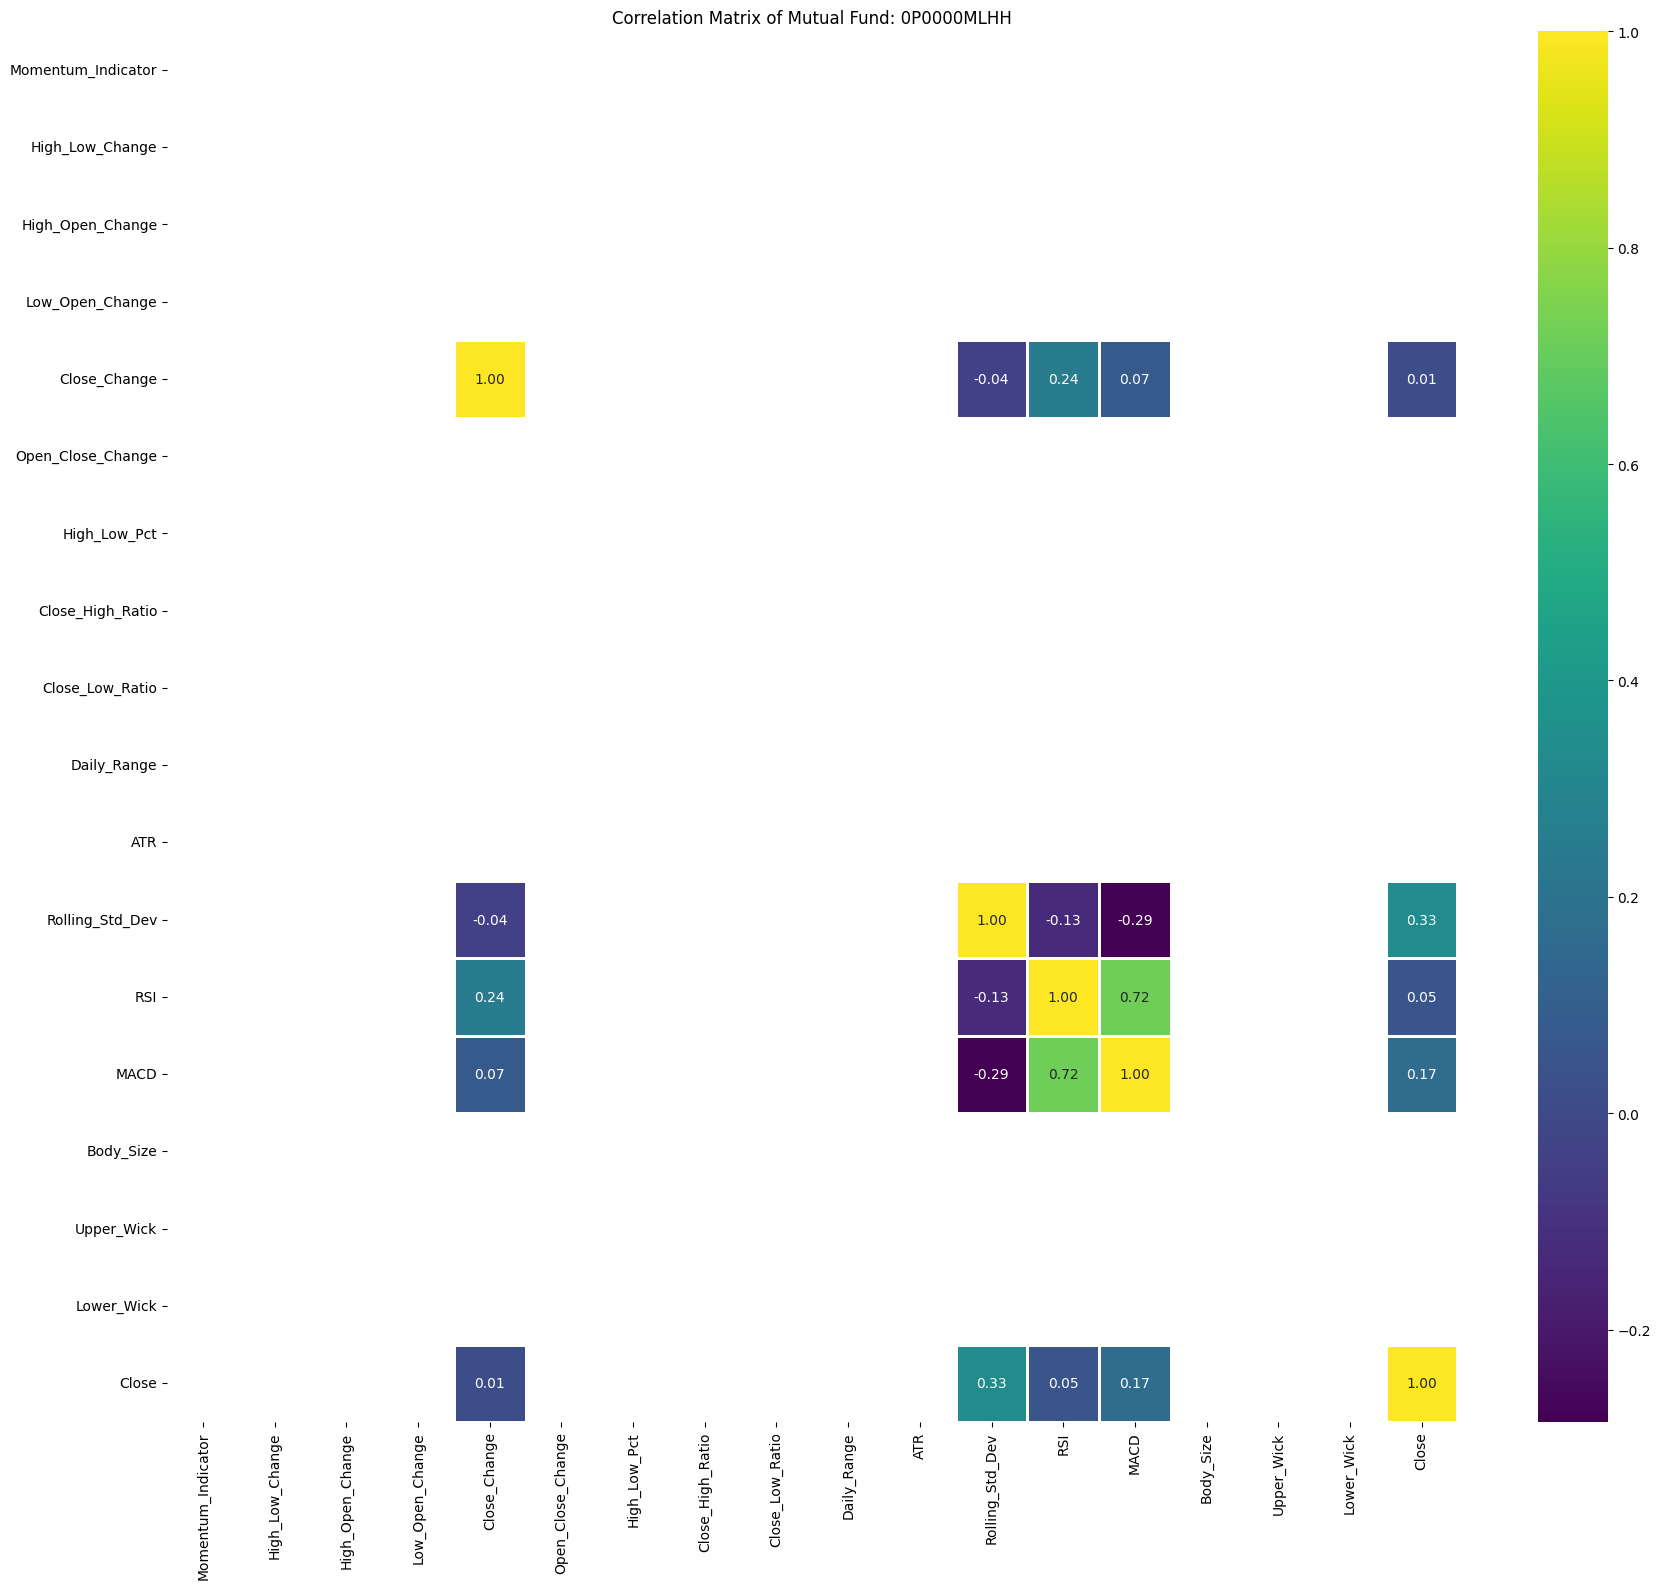


Processing Mutual Fund: 0P0000KV39

Mutual Fund: 0P0000KV39 - Feature Importances:
Rolling_Std_Dev       0.423813
MACD                  0.263110
RSI                   0.224069
Close_Change          0.089008
Momentum_Indicator    0.000000
Daily_Range           0.000000
Upper_Wick            0.000000
Body_Size             0.000000
ATR                   0.000000
Close_Low_Ratio       0.000000
High_Low_Change       0.000000
Close_High_Ratio      0.000000
High_Low_Pct          0.000000
Open_Close_Change     0.000000
Low_Open_Change       0.000000
High_Open_Change      0.000000
Lower_Wick            0.000000
dtype: float64


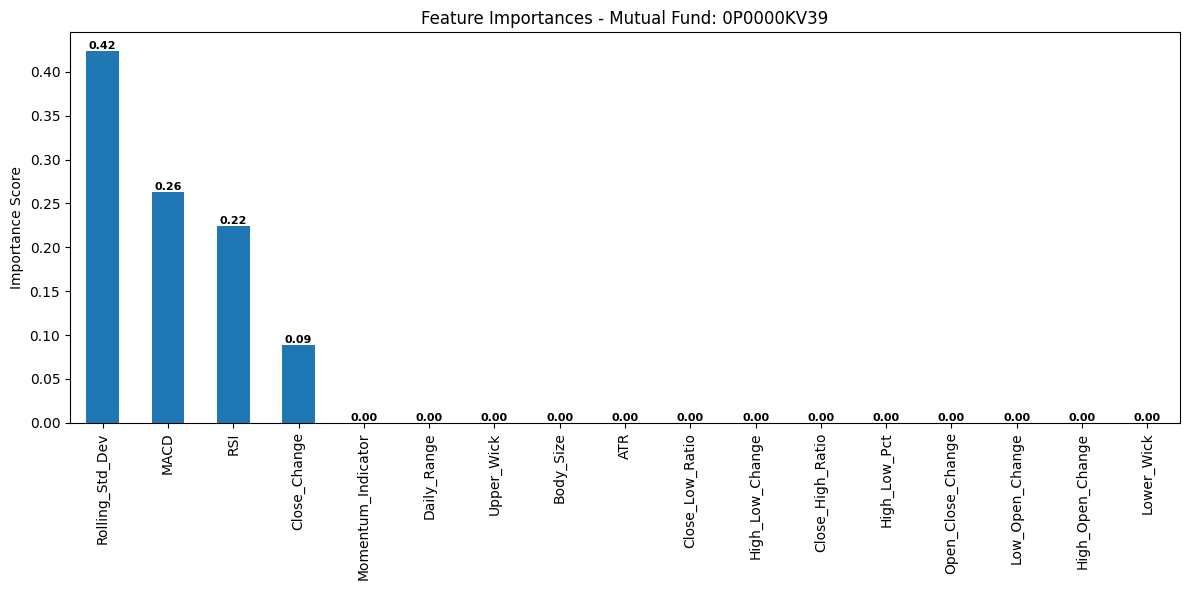

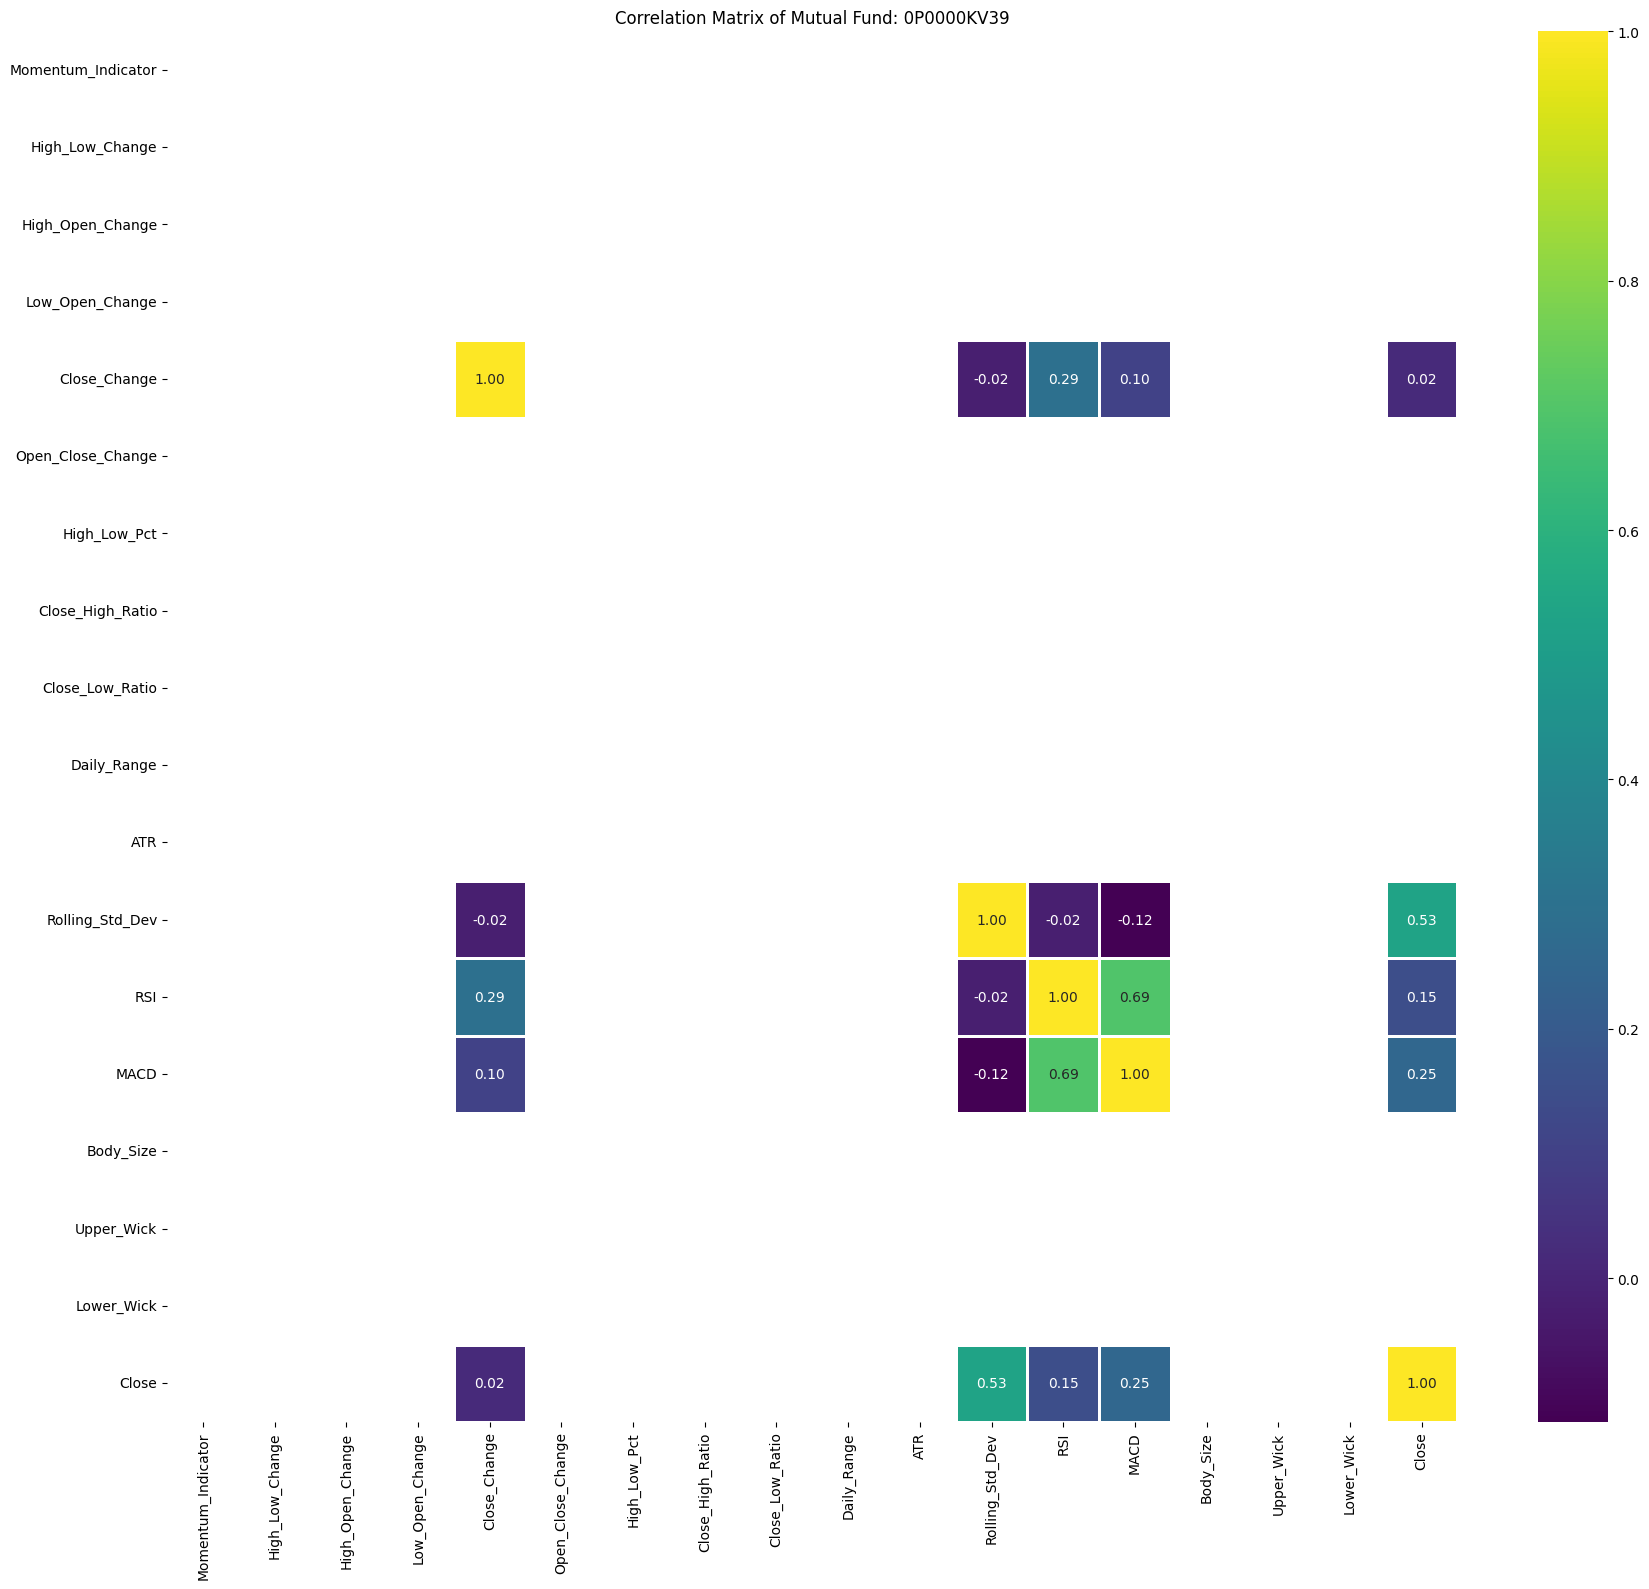


Processing Mutual Fund: 0P00009J3K

Mutual Fund: 0P00009J3K - Feature Importances:
Rolling_Std_Dev       0.486854
MACD                  0.260576
RSI                   0.201578
Close_Change          0.050992
Momentum_Indicator    0.000000
Daily_Range           0.000000
Upper_Wick            0.000000
Body_Size             0.000000
ATR                   0.000000
Close_Low_Ratio       0.000000
High_Low_Change       0.000000
Close_High_Ratio      0.000000
High_Low_Pct          0.000000
Open_Close_Change     0.000000
Low_Open_Change       0.000000
High_Open_Change      0.000000
Lower_Wick            0.000000
dtype: float64


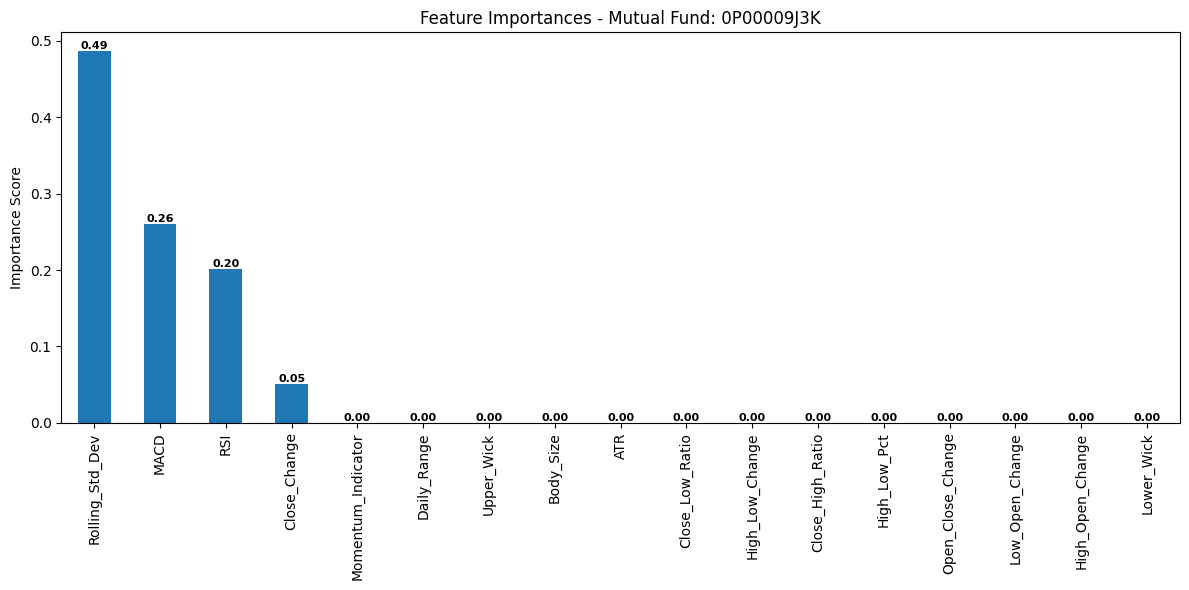

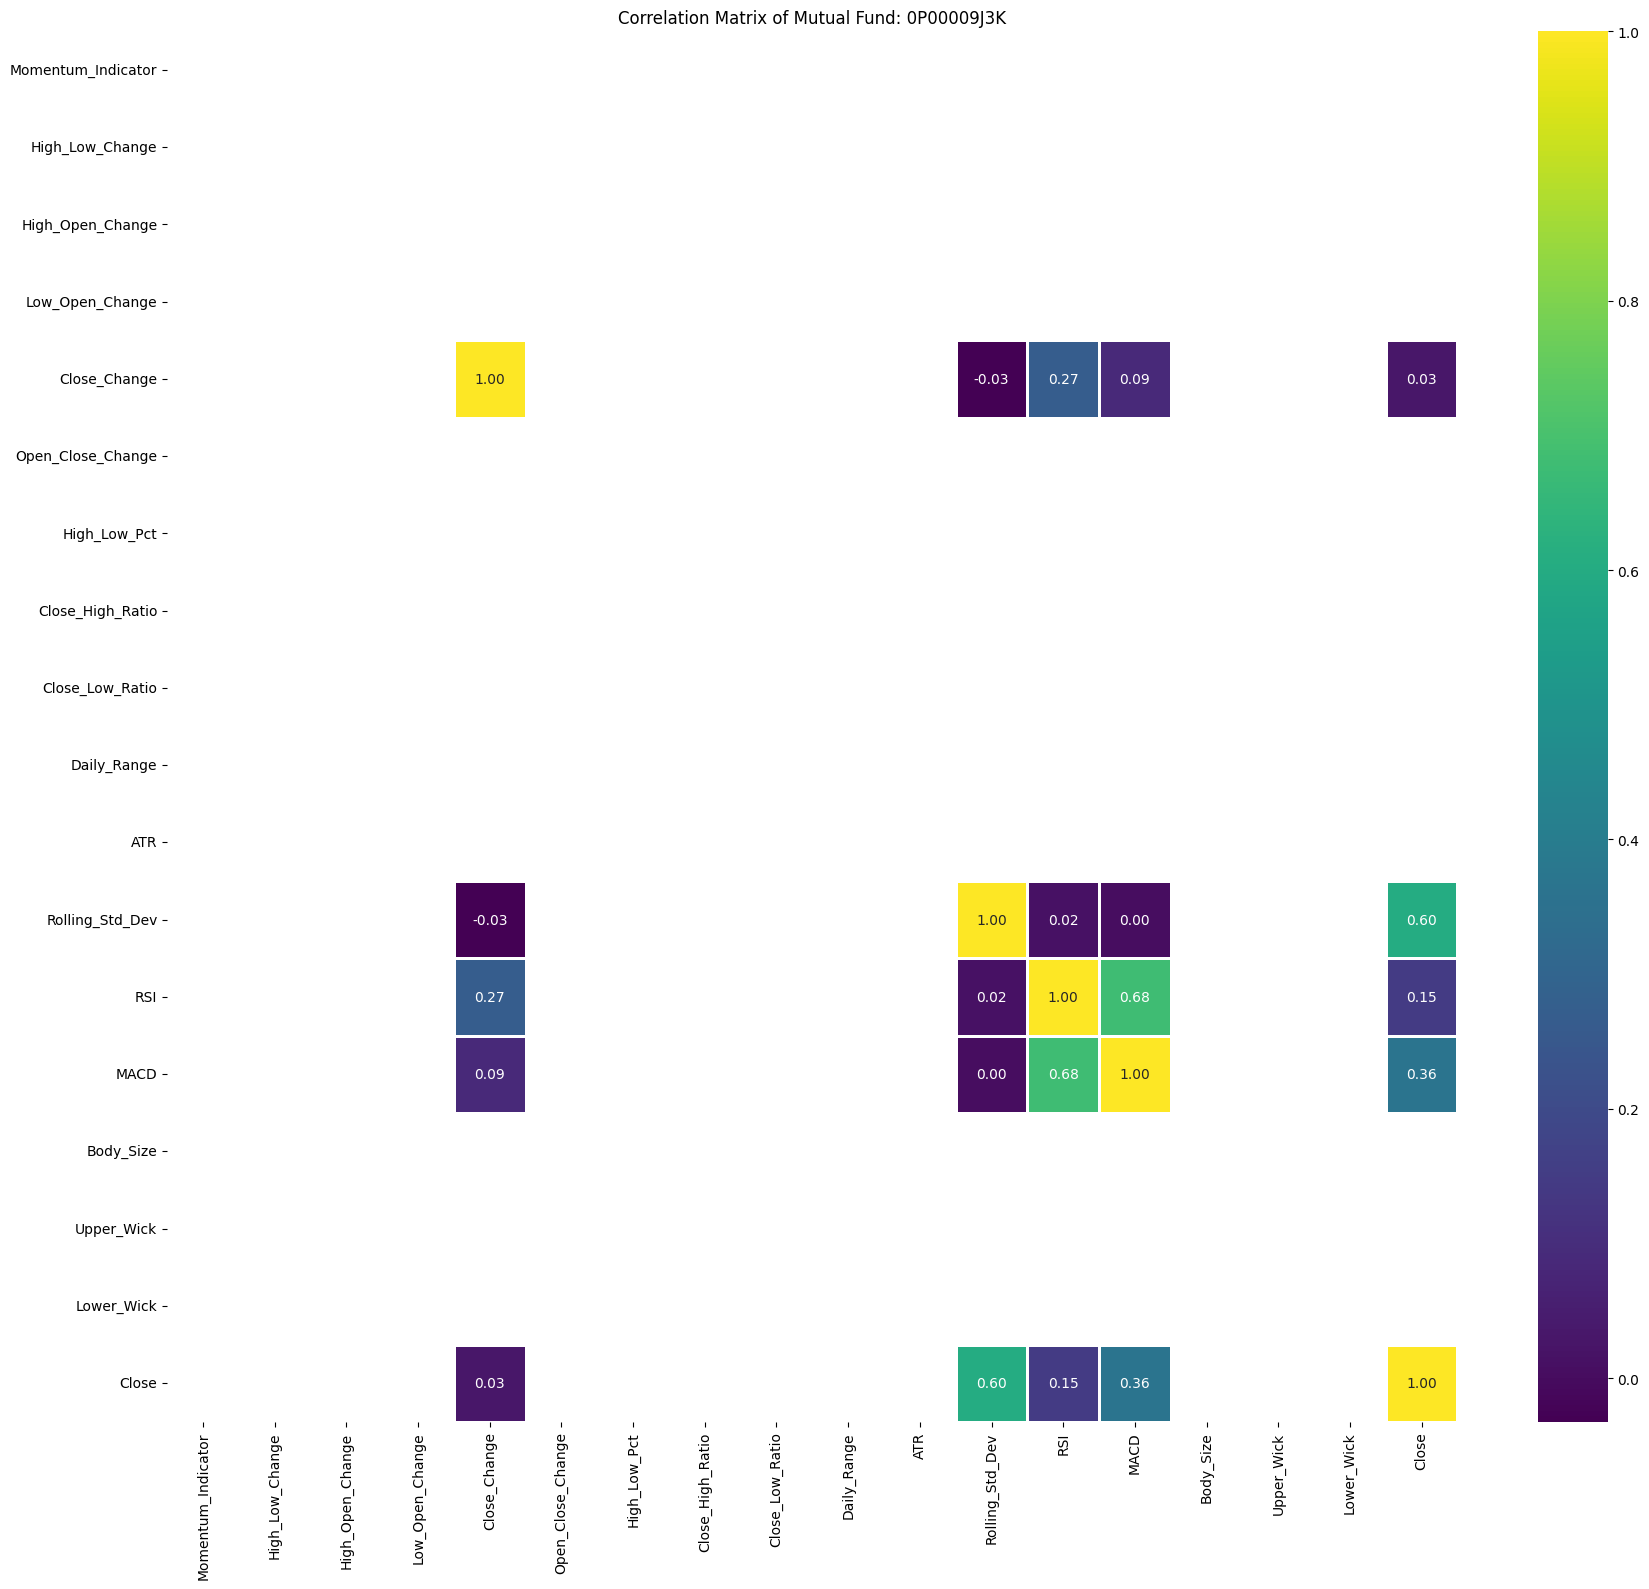


Processing Mutual Fund: 0P0001BAB5

Mutual Fund: 0P0001BAB5 - Feature Importances:
Rolling_Std_Dev       0.392631
MACD                  0.293099
RSI                   0.186838
Close_Change          0.127432
Momentum_Indicator    0.000000
Daily_Range           0.000000
Upper_Wick            0.000000
Body_Size             0.000000
ATR                   0.000000
Close_Low_Ratio       0.000000
High_Low_Change       0.000000
Close_High_Ratio      0.000000
High_Low_Pct          0.000000
Open_Close_Change     0.000000
Low_Open_Change       0.000000
High_Open_Change      0.000000
Lower_Wick            0.000000
dtype: float64


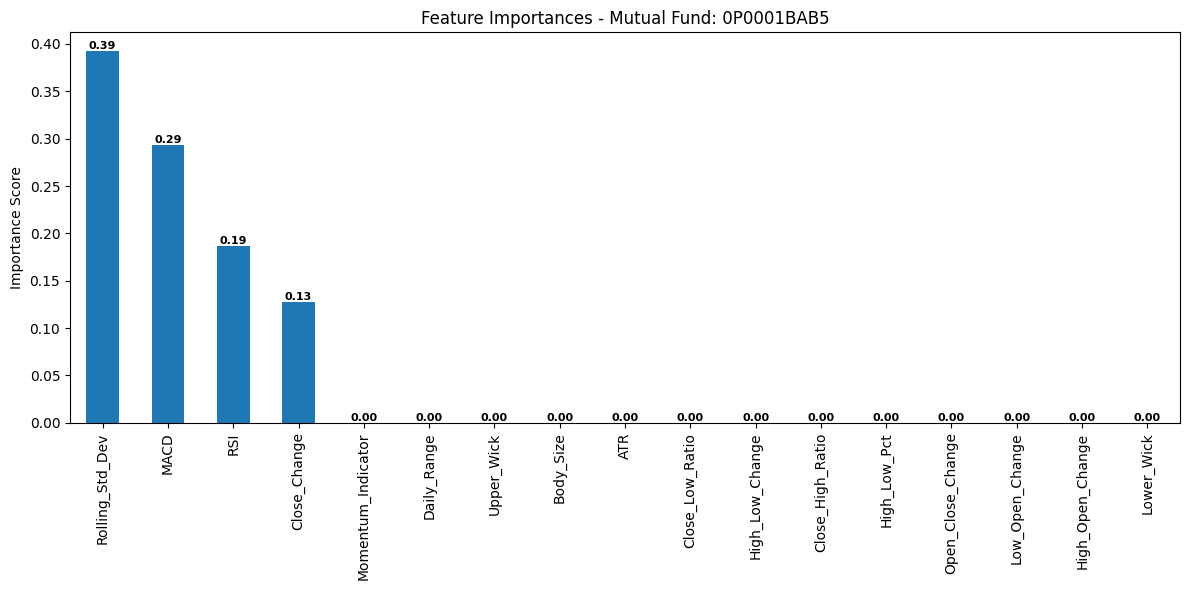

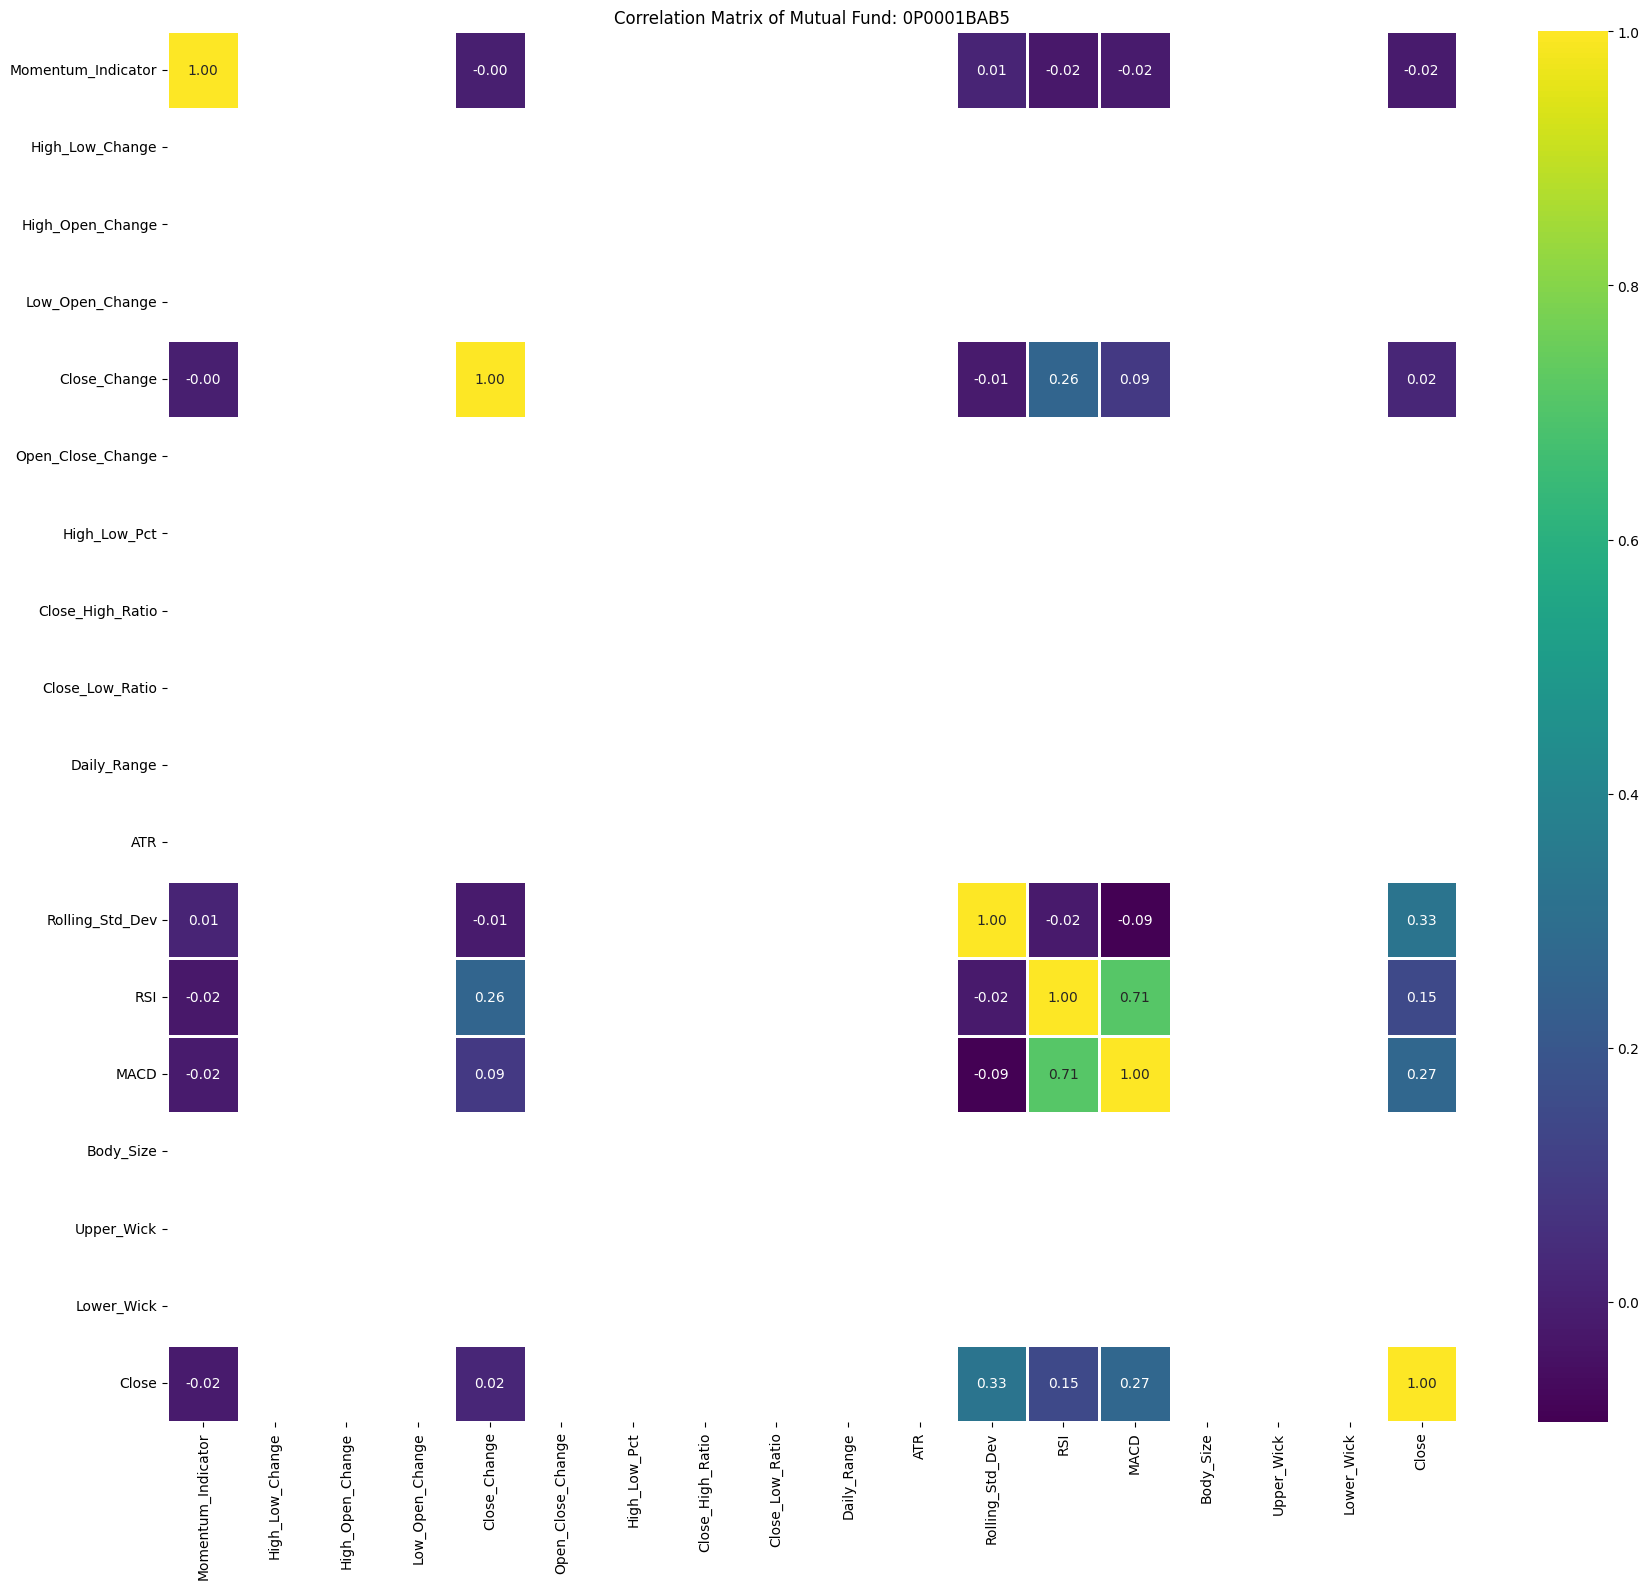


Processing Mutual Fund: 0P0001EI18

Mutual Fund: 0P0001EI18 - Feature Importances:
Rolling_Std_Dev       0.344285
MACD                  0.290723
RSI                   0.203691
Close_Change          0.161301
Momentum_Indicator    0.000000
Daily_Range           0.000000
Upper_Wick            0.000000
Body_Size             0.000000
ATR                   0.000000
Close_Low_Ratio       0.000000
High_Low_Change       0.000000
Close_High_Ratio      0.000000
High_Low_Pct          0.000000
Open_Close_Change     0.000000
Low_Open_Change       0.000000
High_Open_Change      0.000000
Lower_Wick            0.000000
dtype: float64


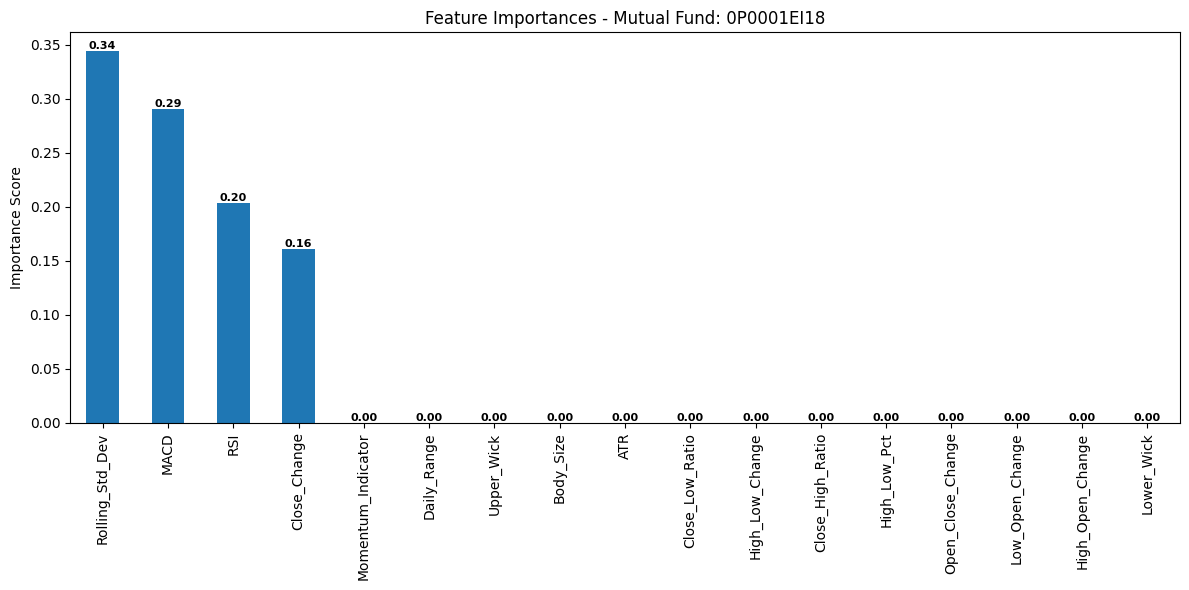

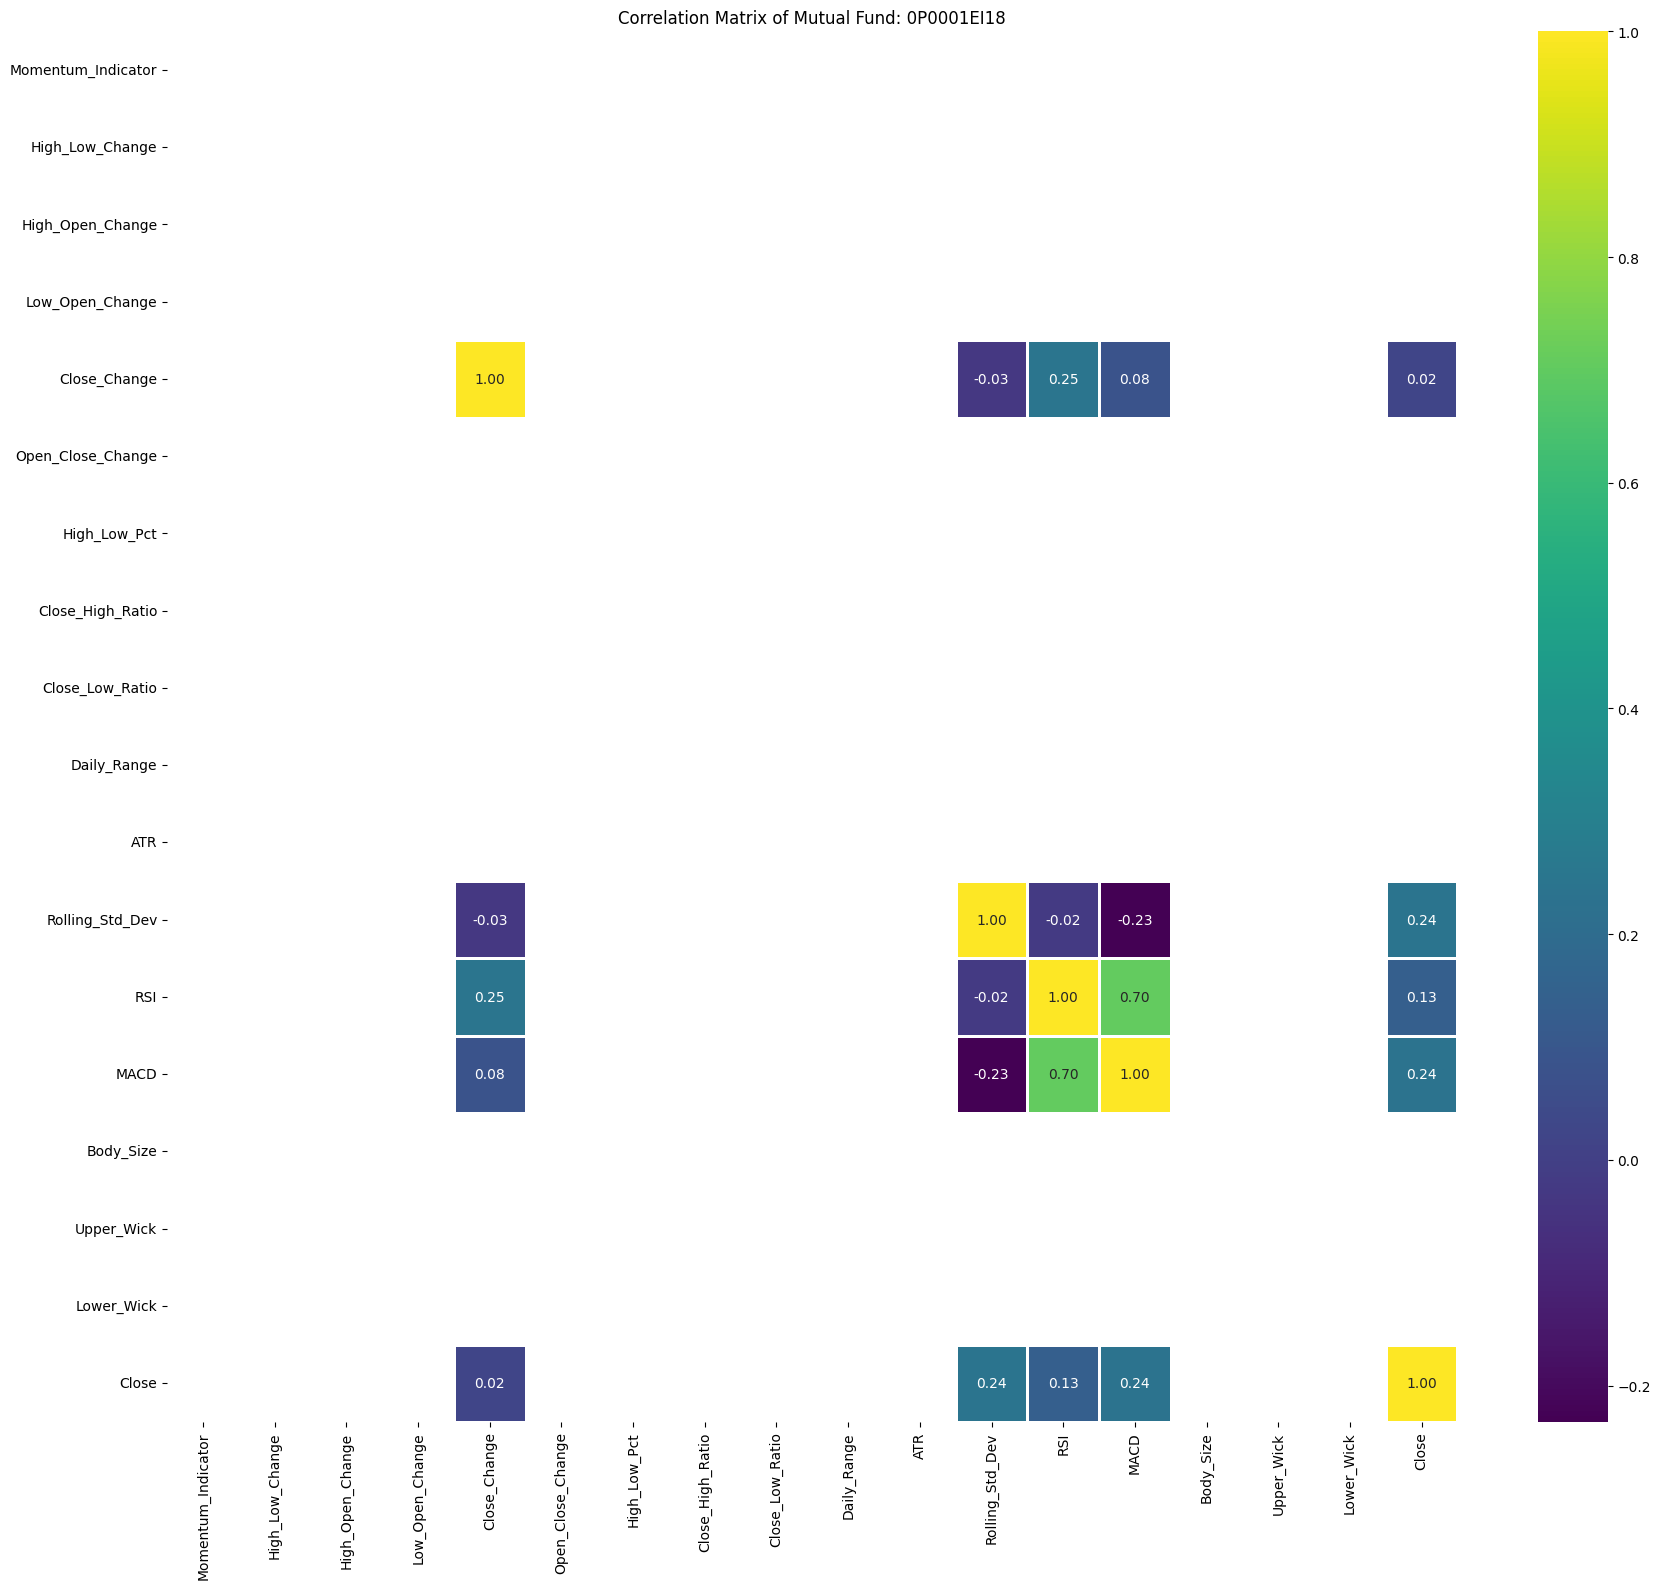


Processing Mutual Fund: 0P0001BA1R

Mutual Fund: 0P0001BA1R - Feature Importances:
Rolling_Std_Dev       0.335366
MACD                  0.319717
RSI                   0.202506
Close_Change          0.142411
Momentum_Indicator    0.000000
Daily_Range           0.000000
Upper_Wick            0.000000
Body_Size             0.000000
ATR                   0.000000
Close_Low_Ratio       0.000000
High_Low_Change       0.000000
Close_High_Ratio      0.000000
High_Low_Pct          0.000000
Open_Close_Change     0.000000
Low_Open_Change       0.000000
High_Open_Change      0.000000
Lower_Wick            0.000000
dtype: float64


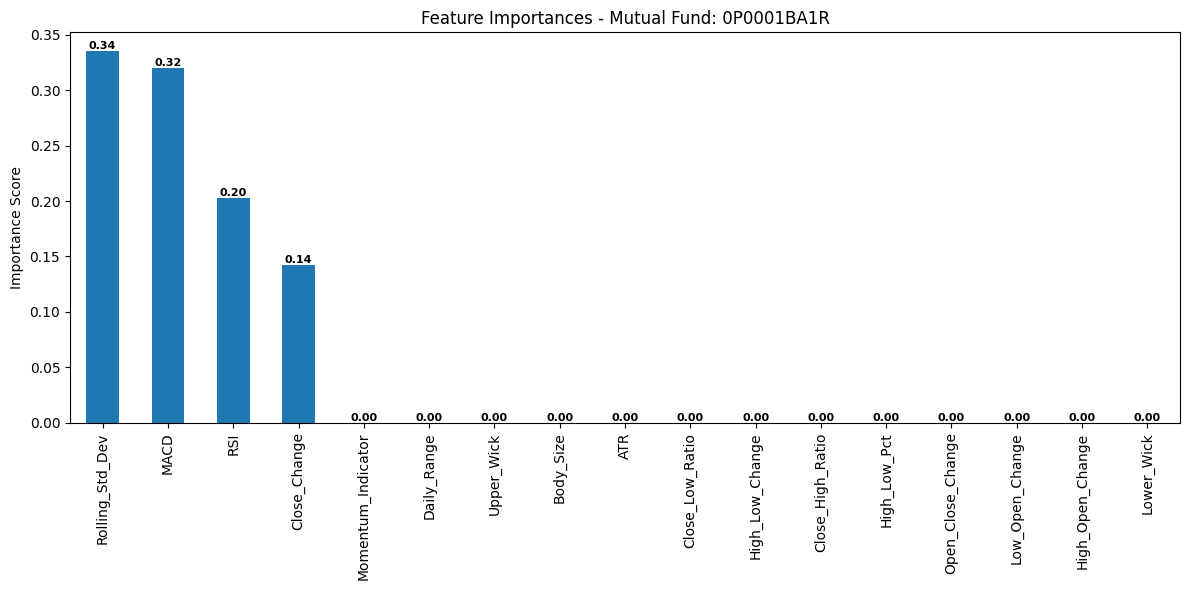

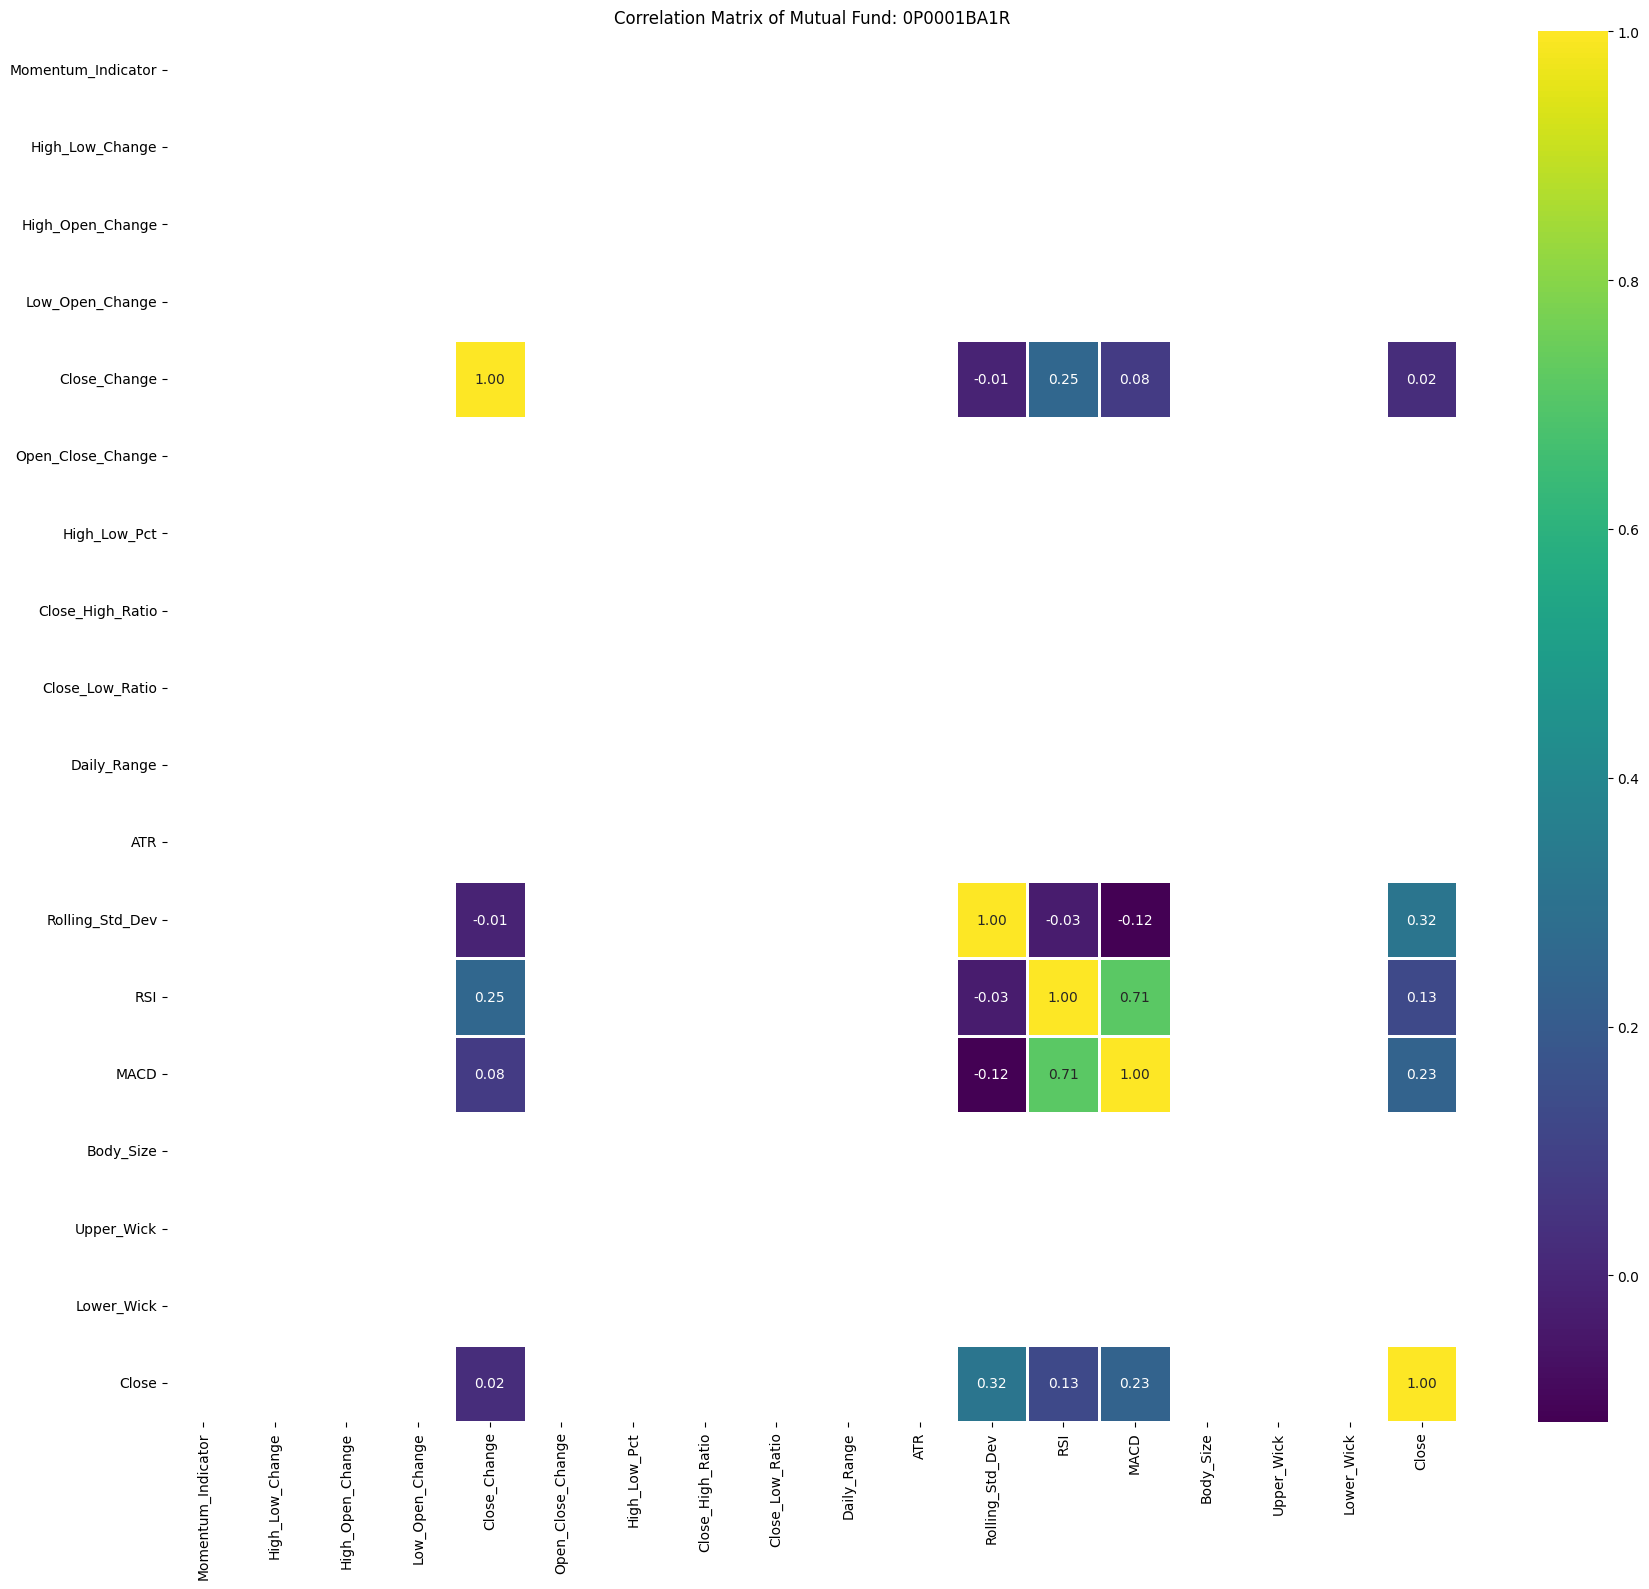


Processing Mutual Fund: 0P00005WEY

Mutual Fund: 0P00005WEY - Feature Importances:
Rolling_Std_Dev       0.379329
MACD                  0.278625
RSI                   0.206754
Close_Change          0.135292
Momentum_Indicator    0.000000
Daily_Range           0.000000
Upper_Wick            0.000000
Body_Size             0.000000
ATR                   0.000000
Close_Low_Ratio       0.000000
High_Low_Change       0.000000
Close_High_Ratio      0.000000
High_Low_Pct          0.000000
Open_Close_Change     0.000000
Low_Open_Change       0.000000
High_Open_Change      0.000000
Lower_Wick            0.000000
dtype: float64


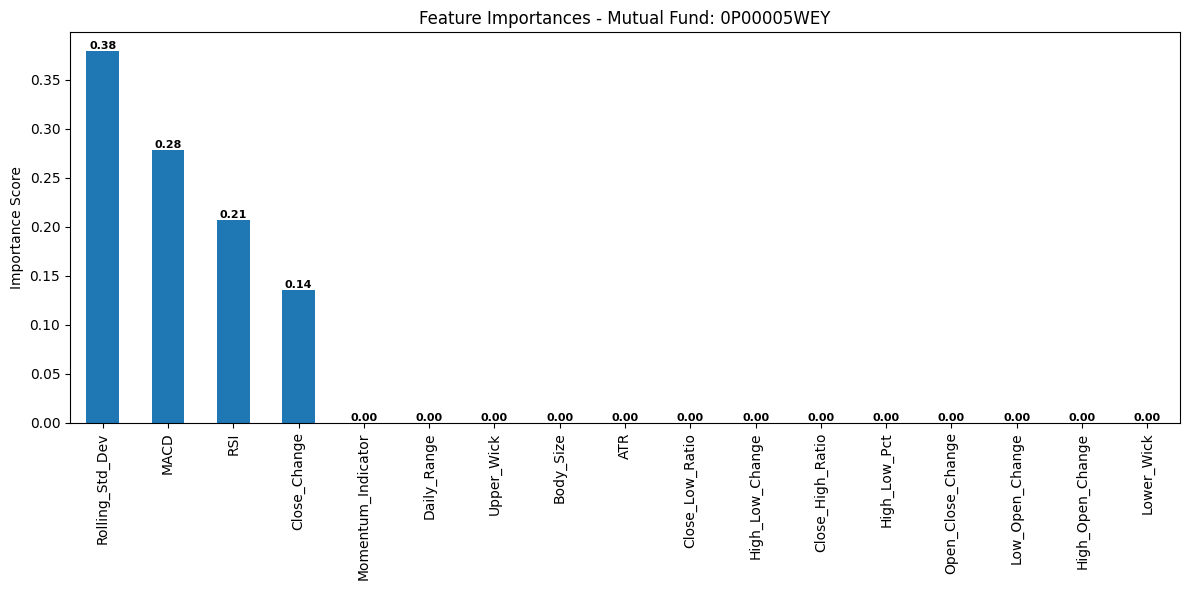

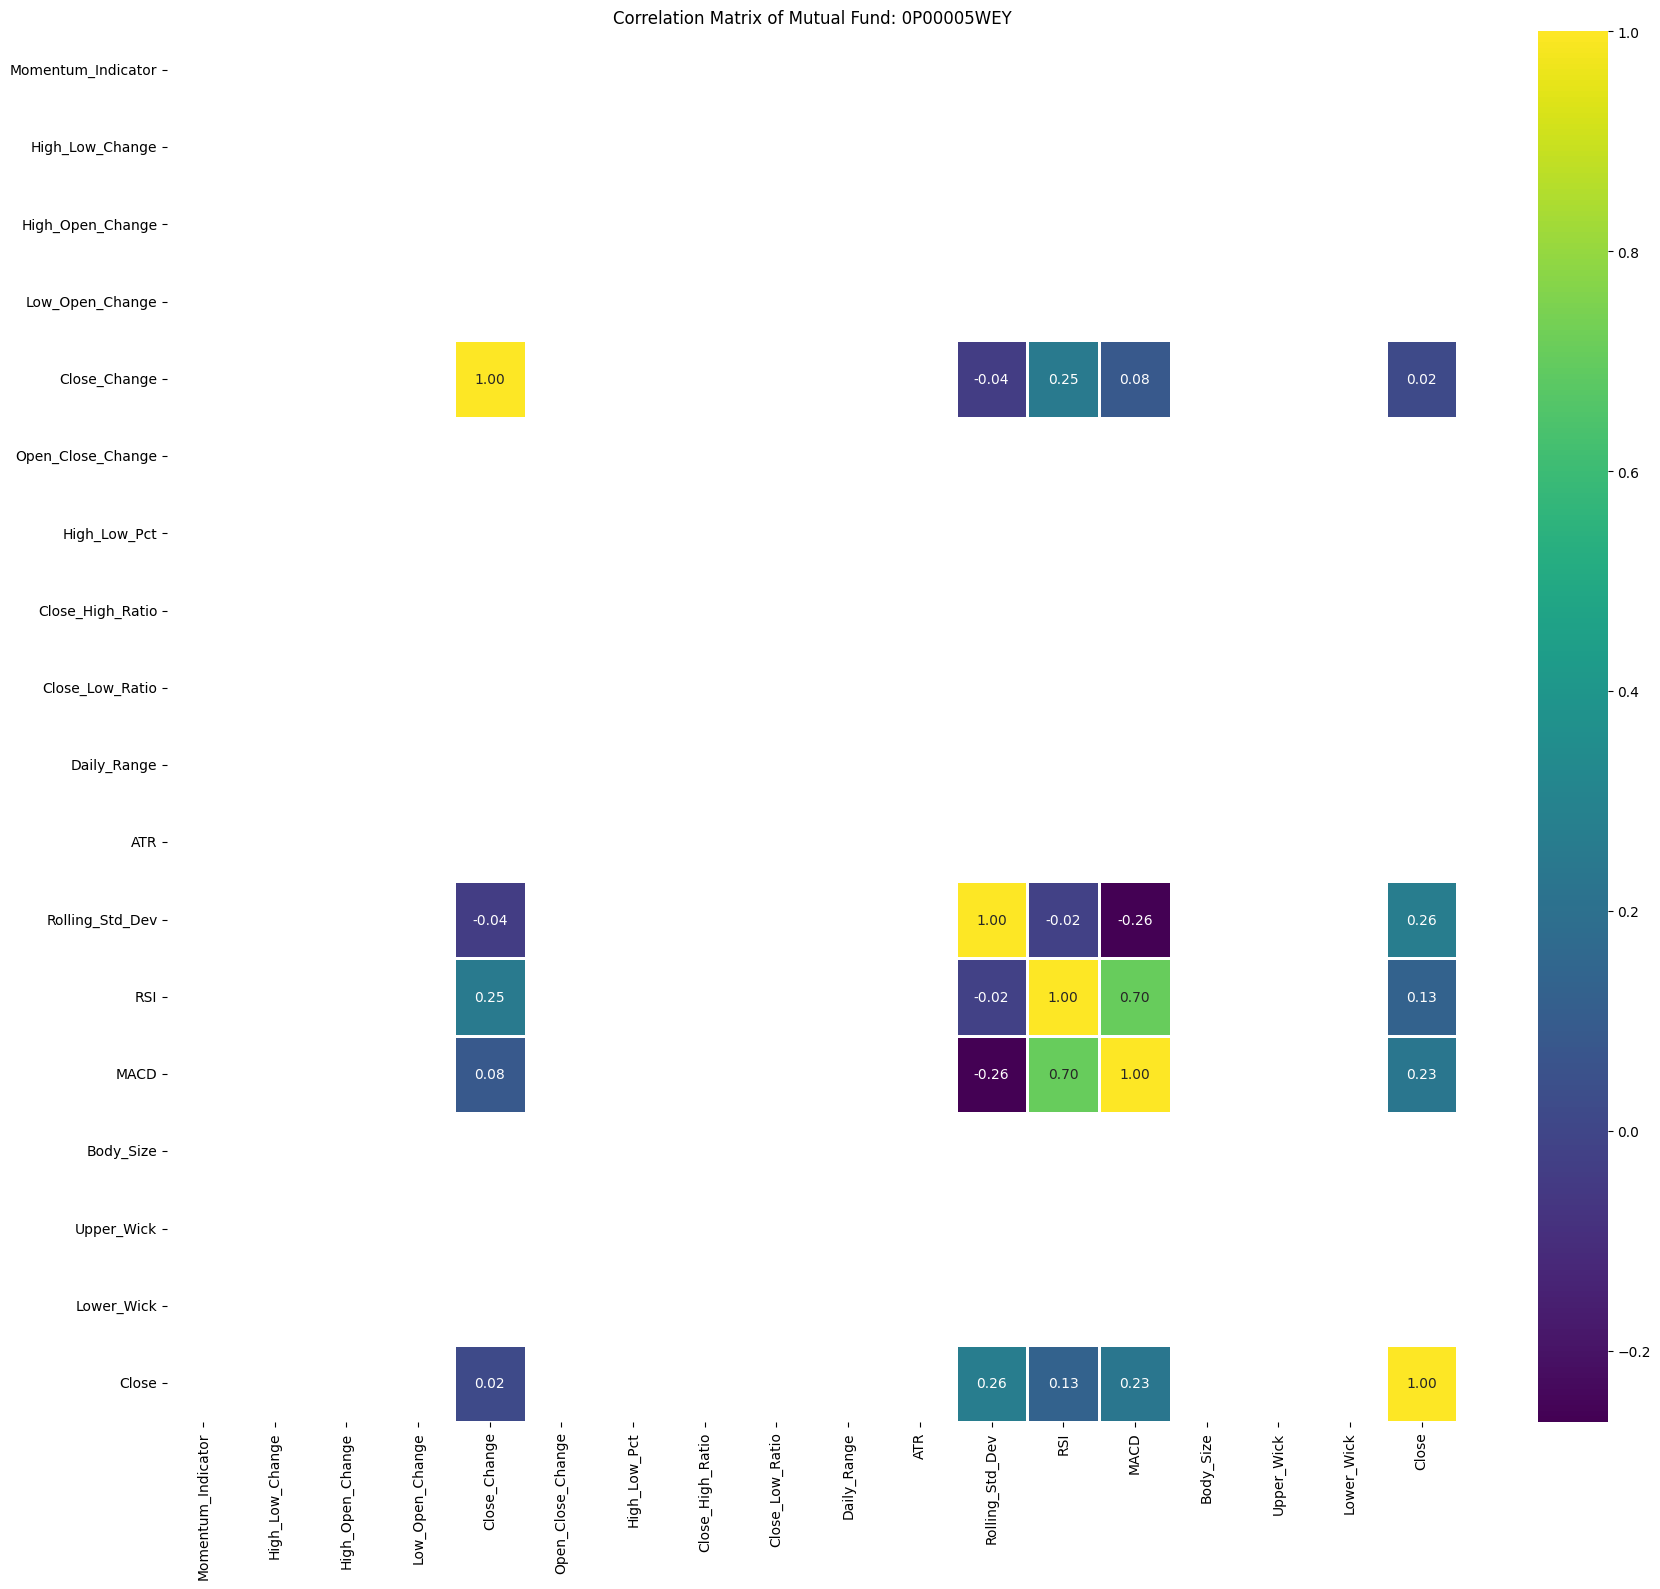


Processing Mutual Fund: 0P0000XUXL

Mutual Fund: 0P0000XUXL - Feature Importances:
MACD                  0.313360
RSI                   0.291610
Rolling_Std_Dev       0.243048
Close_Change          0.151981
Momentum_Indicator    0.000000
Daily_Range           0.000000
Upper_Wick            0.000000
Body_Size             0.000000
ATR                   0.000000
Close_Low_Ratio       0.000000
High_Low_Change       0.000000
Close_High_Ratio      0.000000
High_Low_Pct          0.000000
Open_Close_Change     0.000000
Low_Open_Change       0.000000
High_Open_Change      0.000000
Lower_Wick            0.000000
dtype: float64


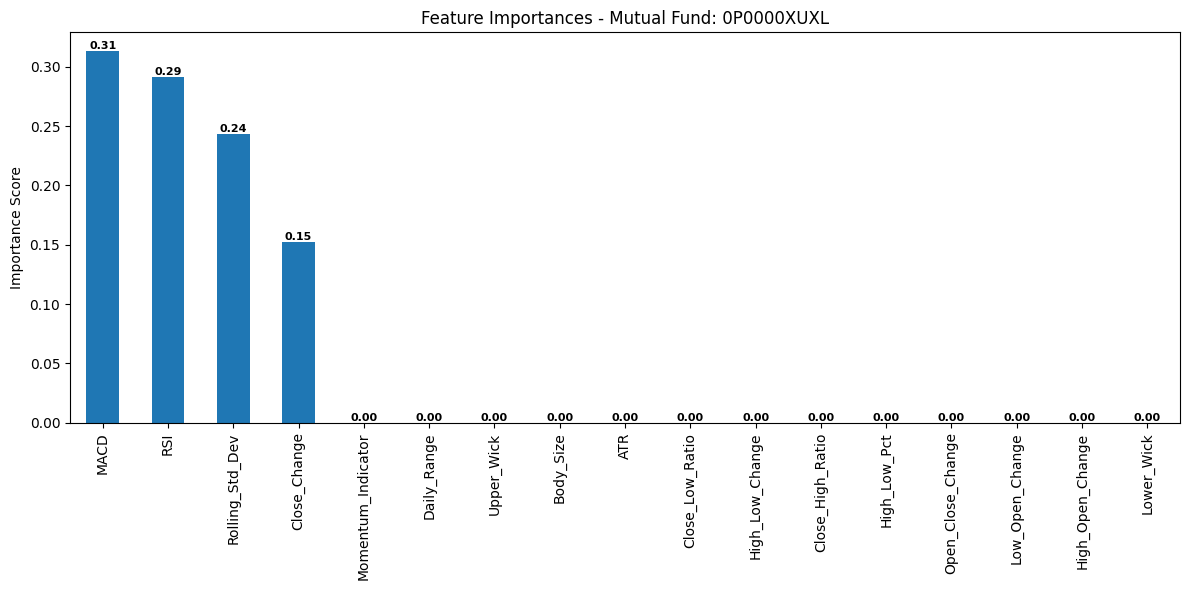

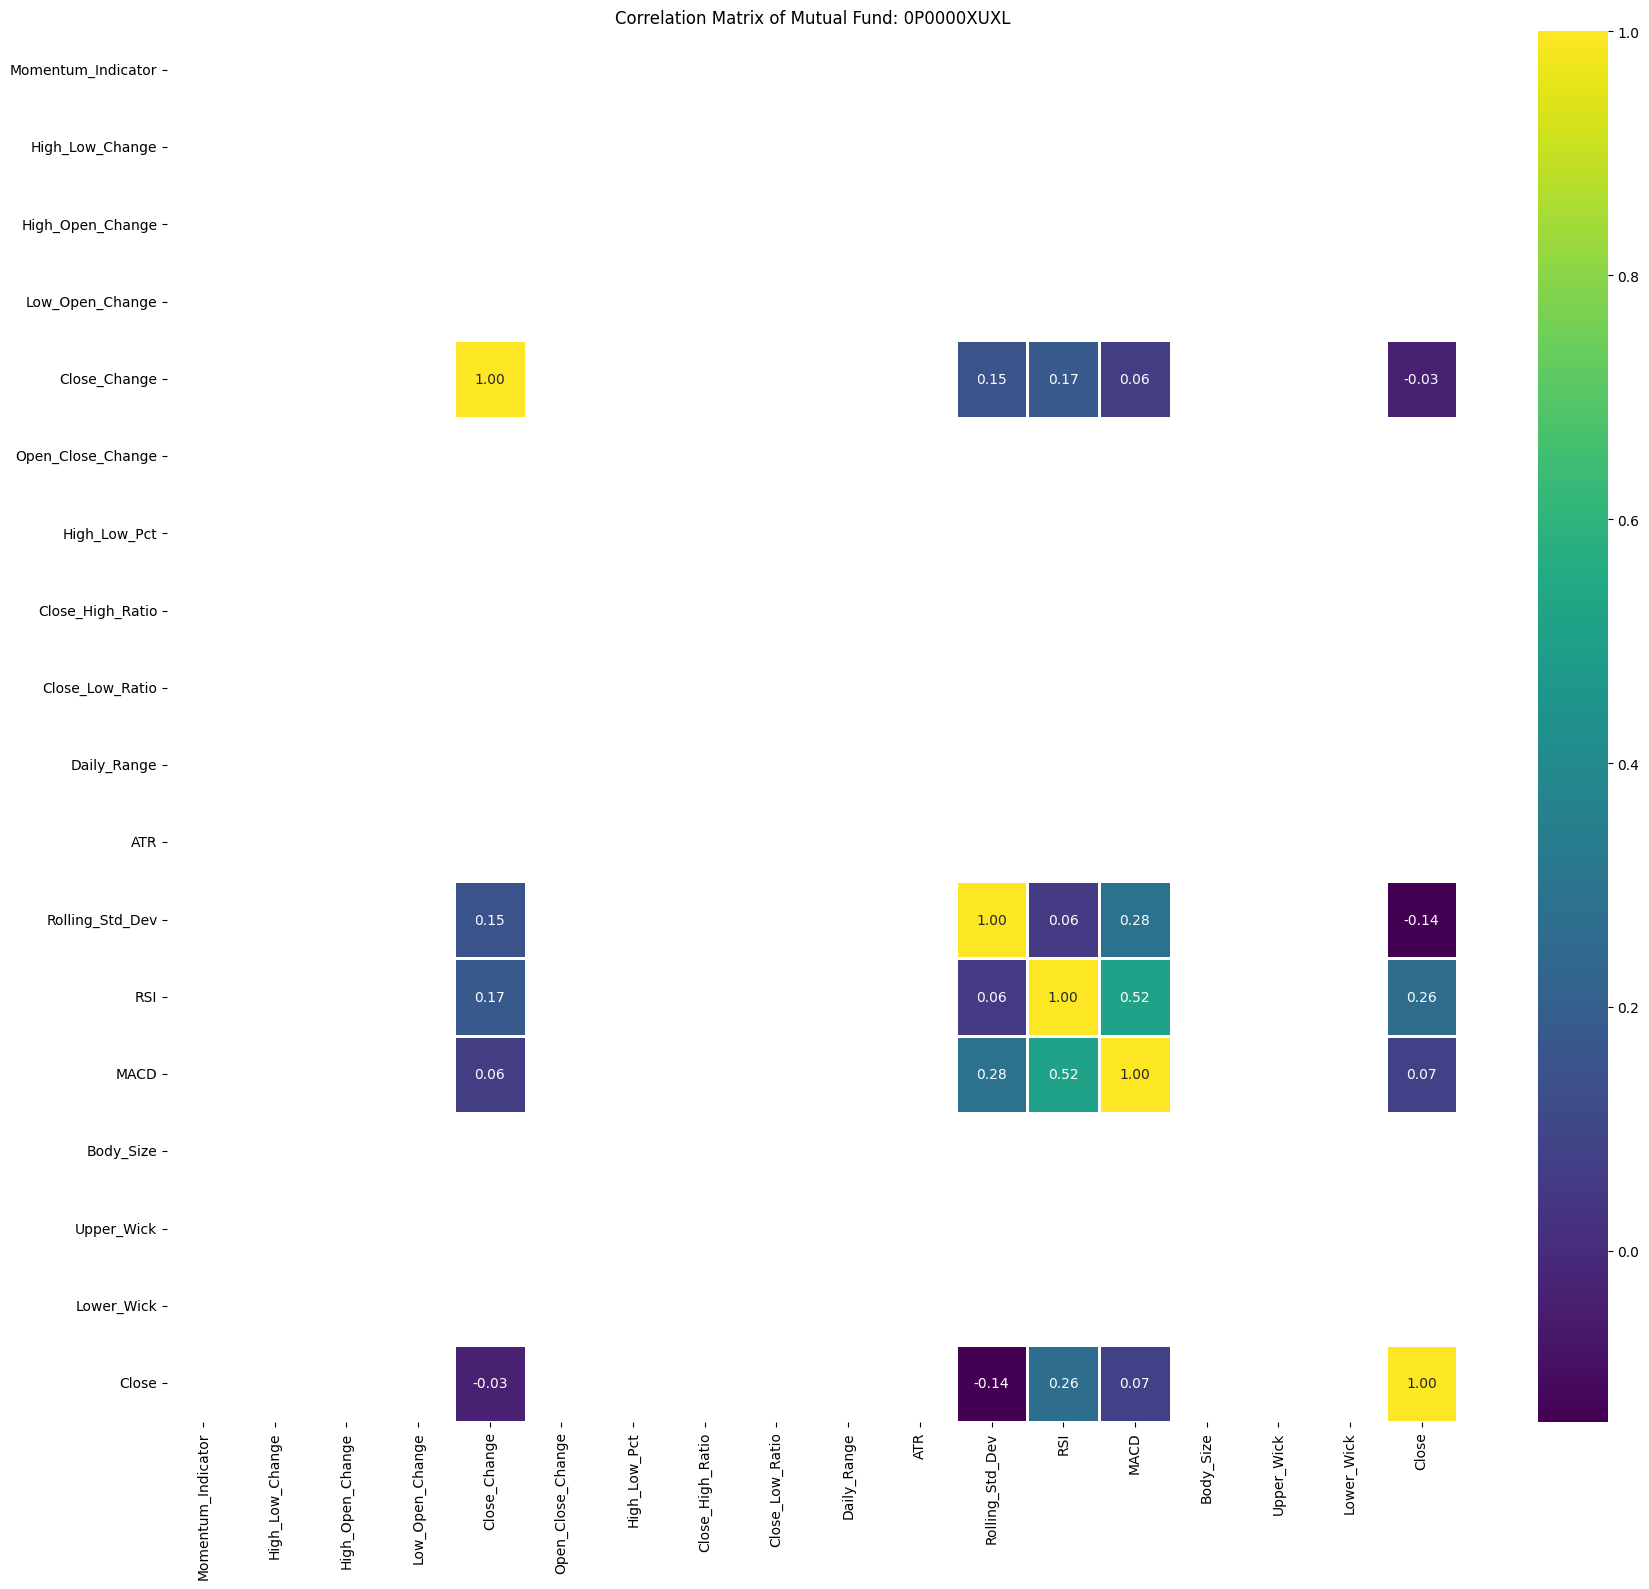


Processing Mutual Fund: 0P0000XUYZ

Mutual Fund: 0P0000XUYZ - Feature Importances:
MACD                  0.366272
RSI                   0.284128
Rolling_Std_Dev       0.237962
Close_Change          0.111638
Momentum_Indicator    0.000000
Daily_Range           0.000000
Upper_Wick            0.000000
Body_Size             0.000000
ATR                   0.000000
Close_Low_Ratio       0.000000
High_Low_Change       0.000000
Close_High_Ratio      0.000000
High_Low_Pct          0.000000
Open_Close_Change     0.000000
Low_Open_Change       0.000000
High_Open_Change      0.000000
Lower_Wick            0.000000
dtype: float64


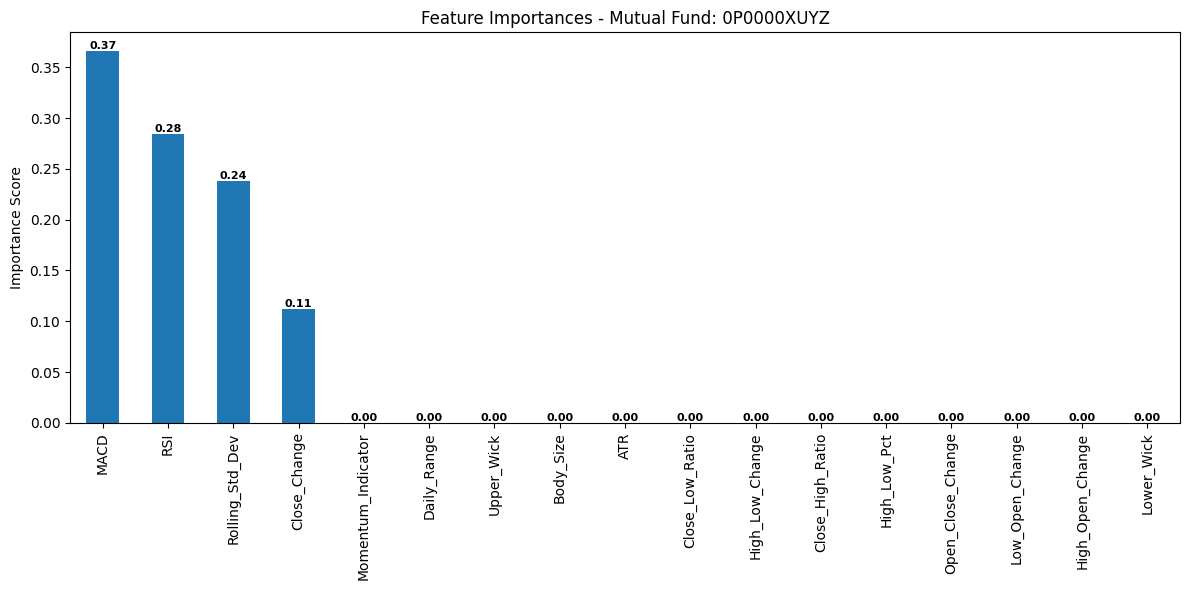

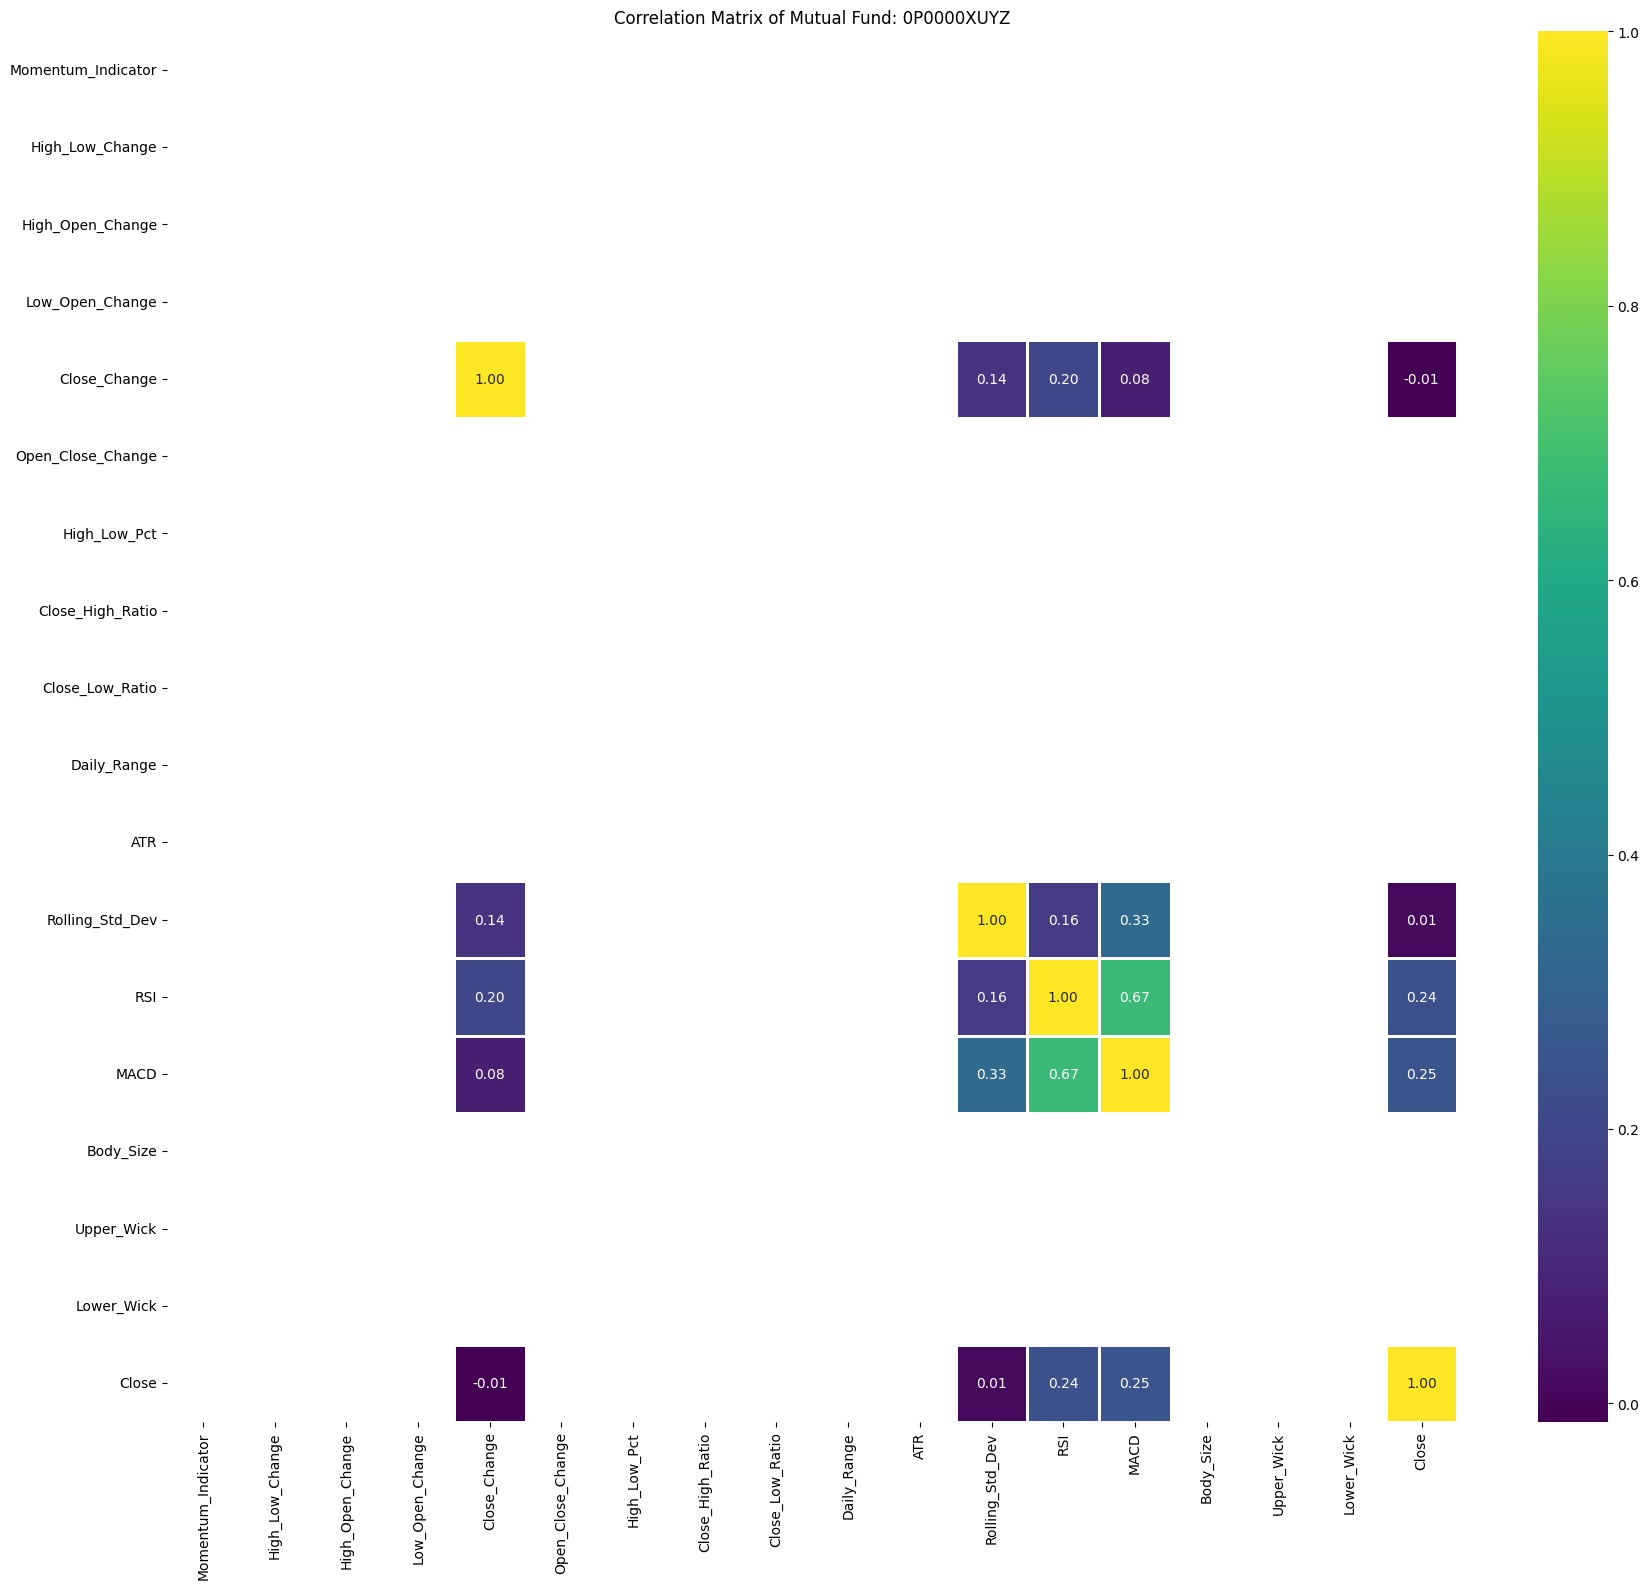


Processing Mutual Fund: 0P0000XW8D

Mutual Fund: 0P0000XW8D - Feature Importances:
MACD                  0.317169
RSI                   0.293564
Rolling_Std_Dev       0.238426
Close_Change          0.150841
Momentum_Indicator    0.000000
Daily_Range           0.000000
Upper_Wick            0.000000
Body_Size             0.000000
ATR                   0.000000
Close_Low_Ratio       0.000000
High_Low_Change       0.000000
Close_High_Ratio      0.000000
High_Low_Pct          0.000000
Open_Close_Change     0.000000
Low_Open_Change       0.000000
High_Open_Change      0.000000
Lower_Wick            0.000000
dtype: float64


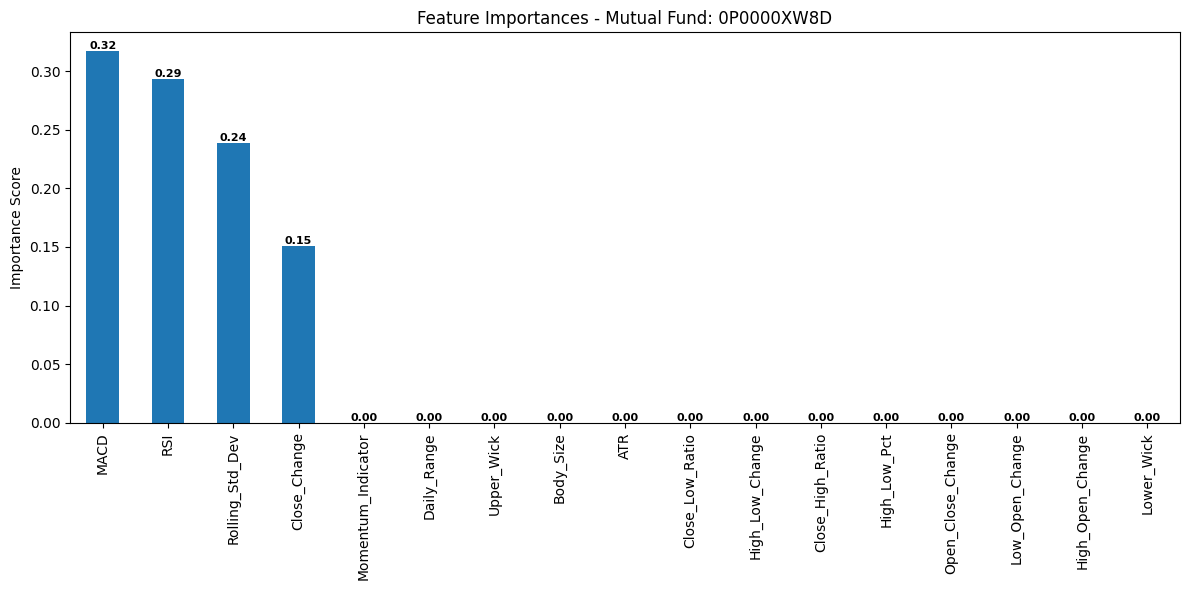

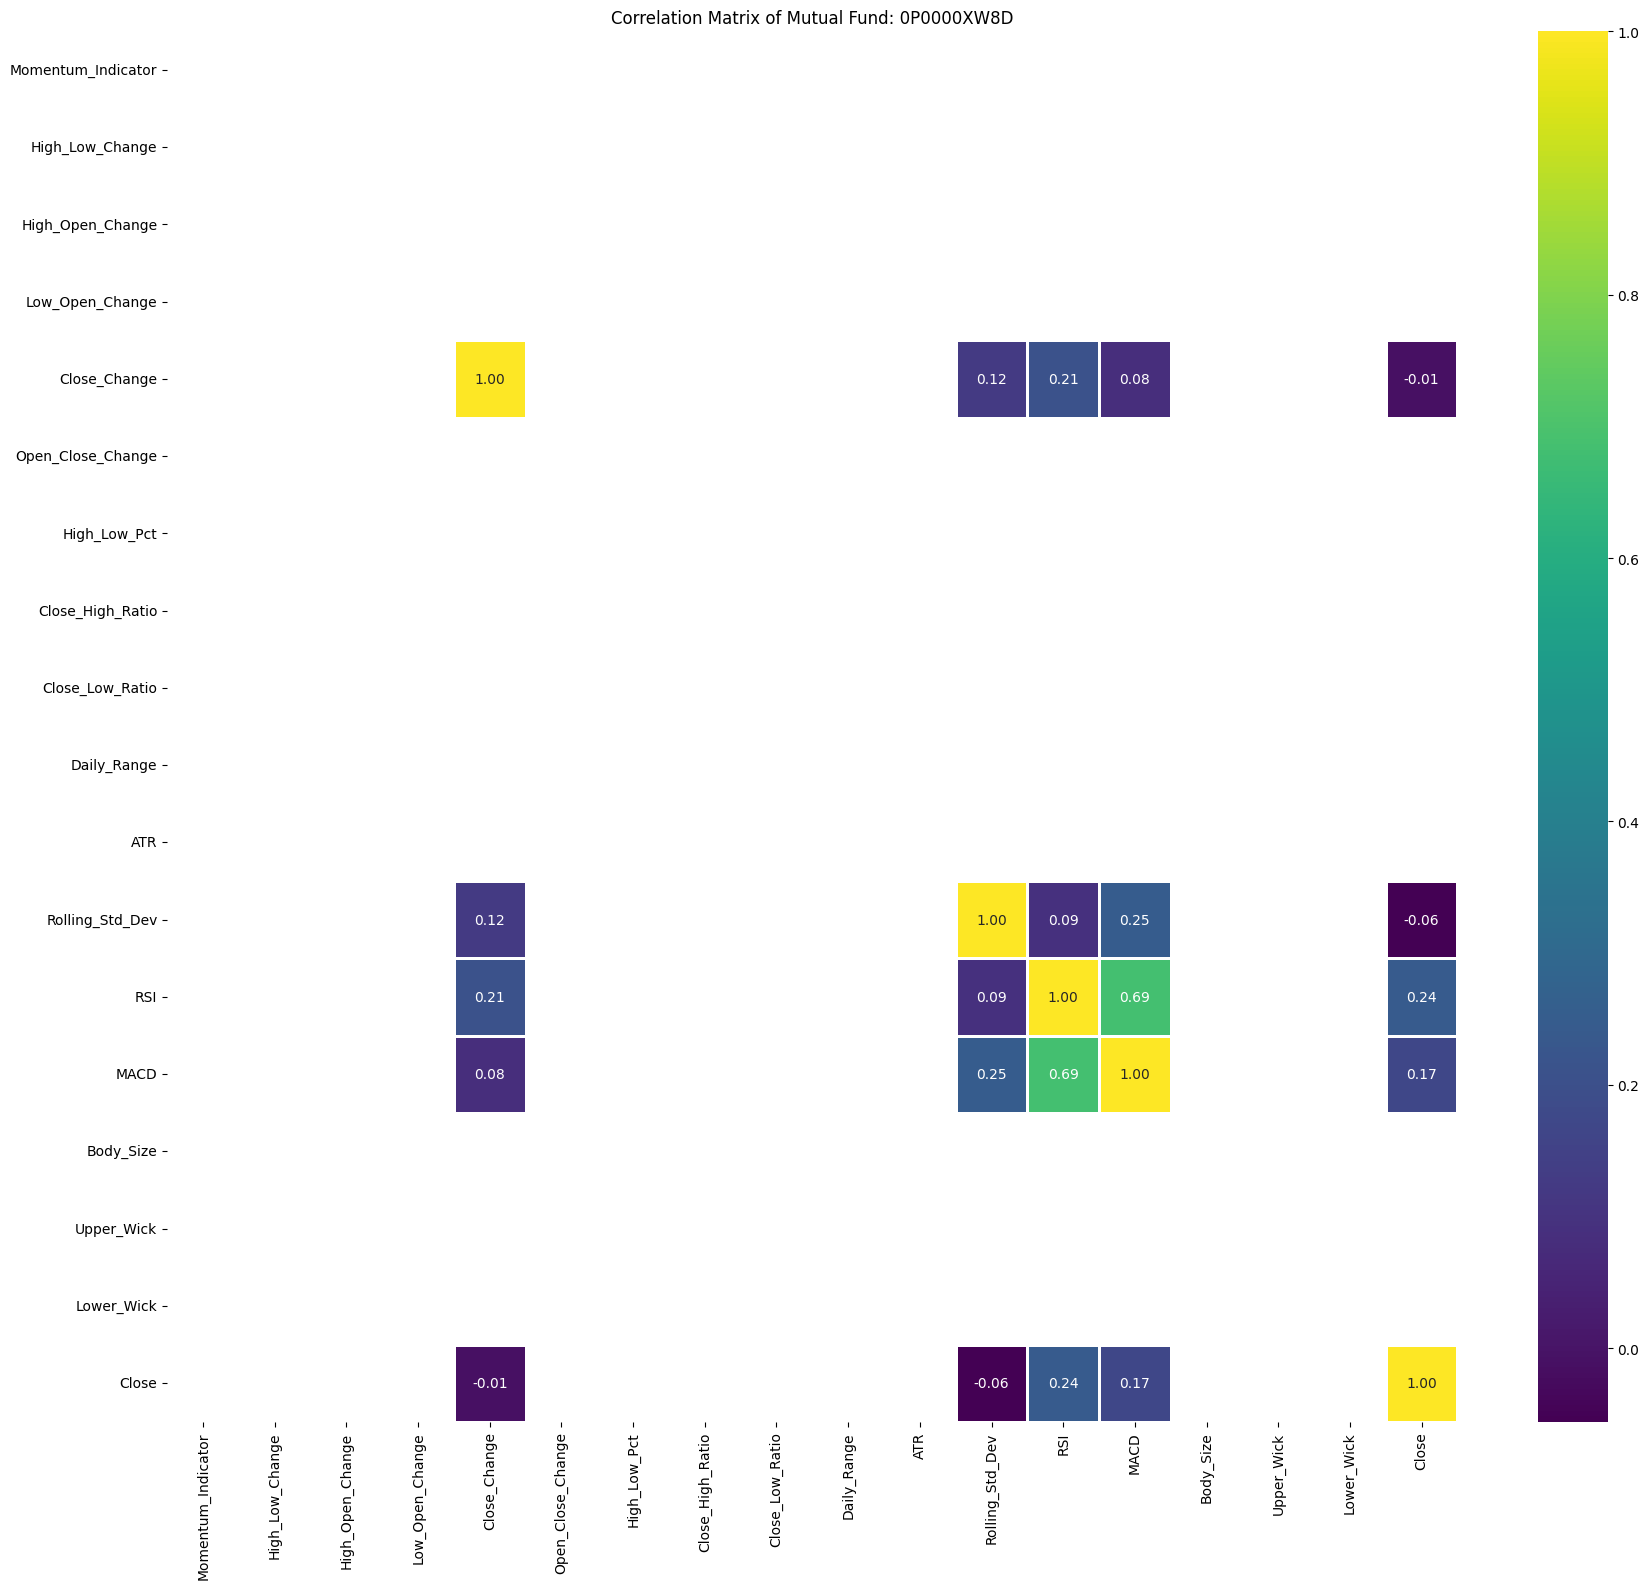


Processing Mutual Fund: 0P0000XVER

Mutual Fund: 0P0000XVER - Feature Importances:
MACD                  0.749091
Close_Change          0.123187
Rolling_Std_Dev       0.115874
RSI                   0.011848
Momentum_Indicator    0.000000
Daily_Range           0.000000
Upper_Wick            0.000000
Body_Size             0.000000
ATR                   0.000000
Close_Low_Ratio       0.000000
High_Low_Change       0.000000
Close_High_Ratio      0.000000
High_Low_Pct          0.000000
Open_Close_Change     0.000000
Low_Open_Change       0.000000
High_Open_Change      0.000000
Lower_Wick            0.000000
dtype: float64


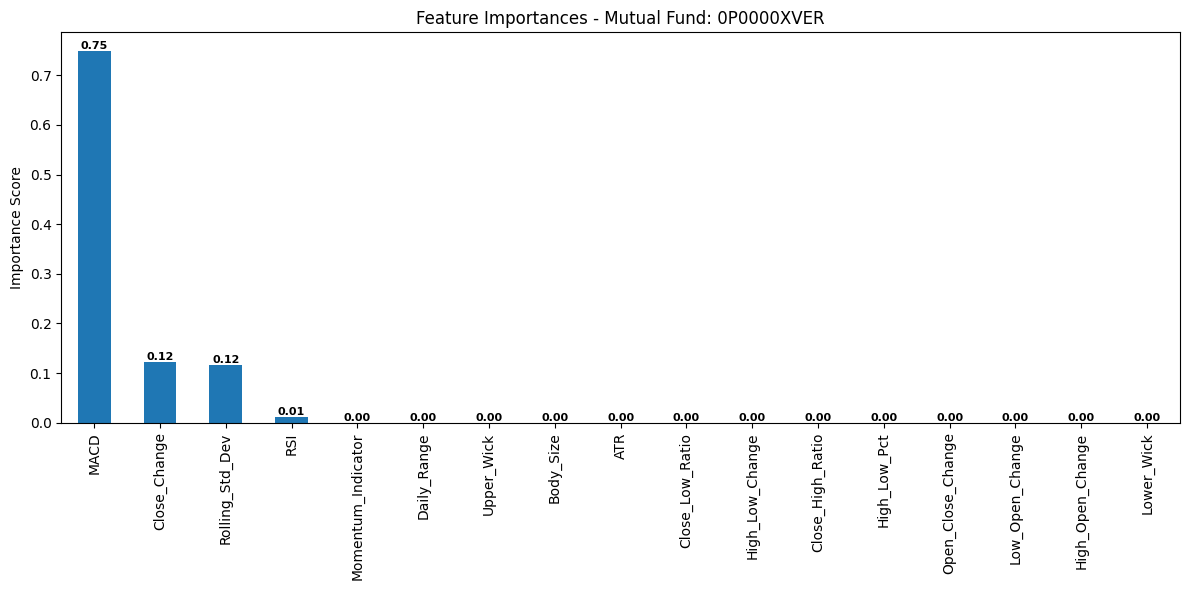

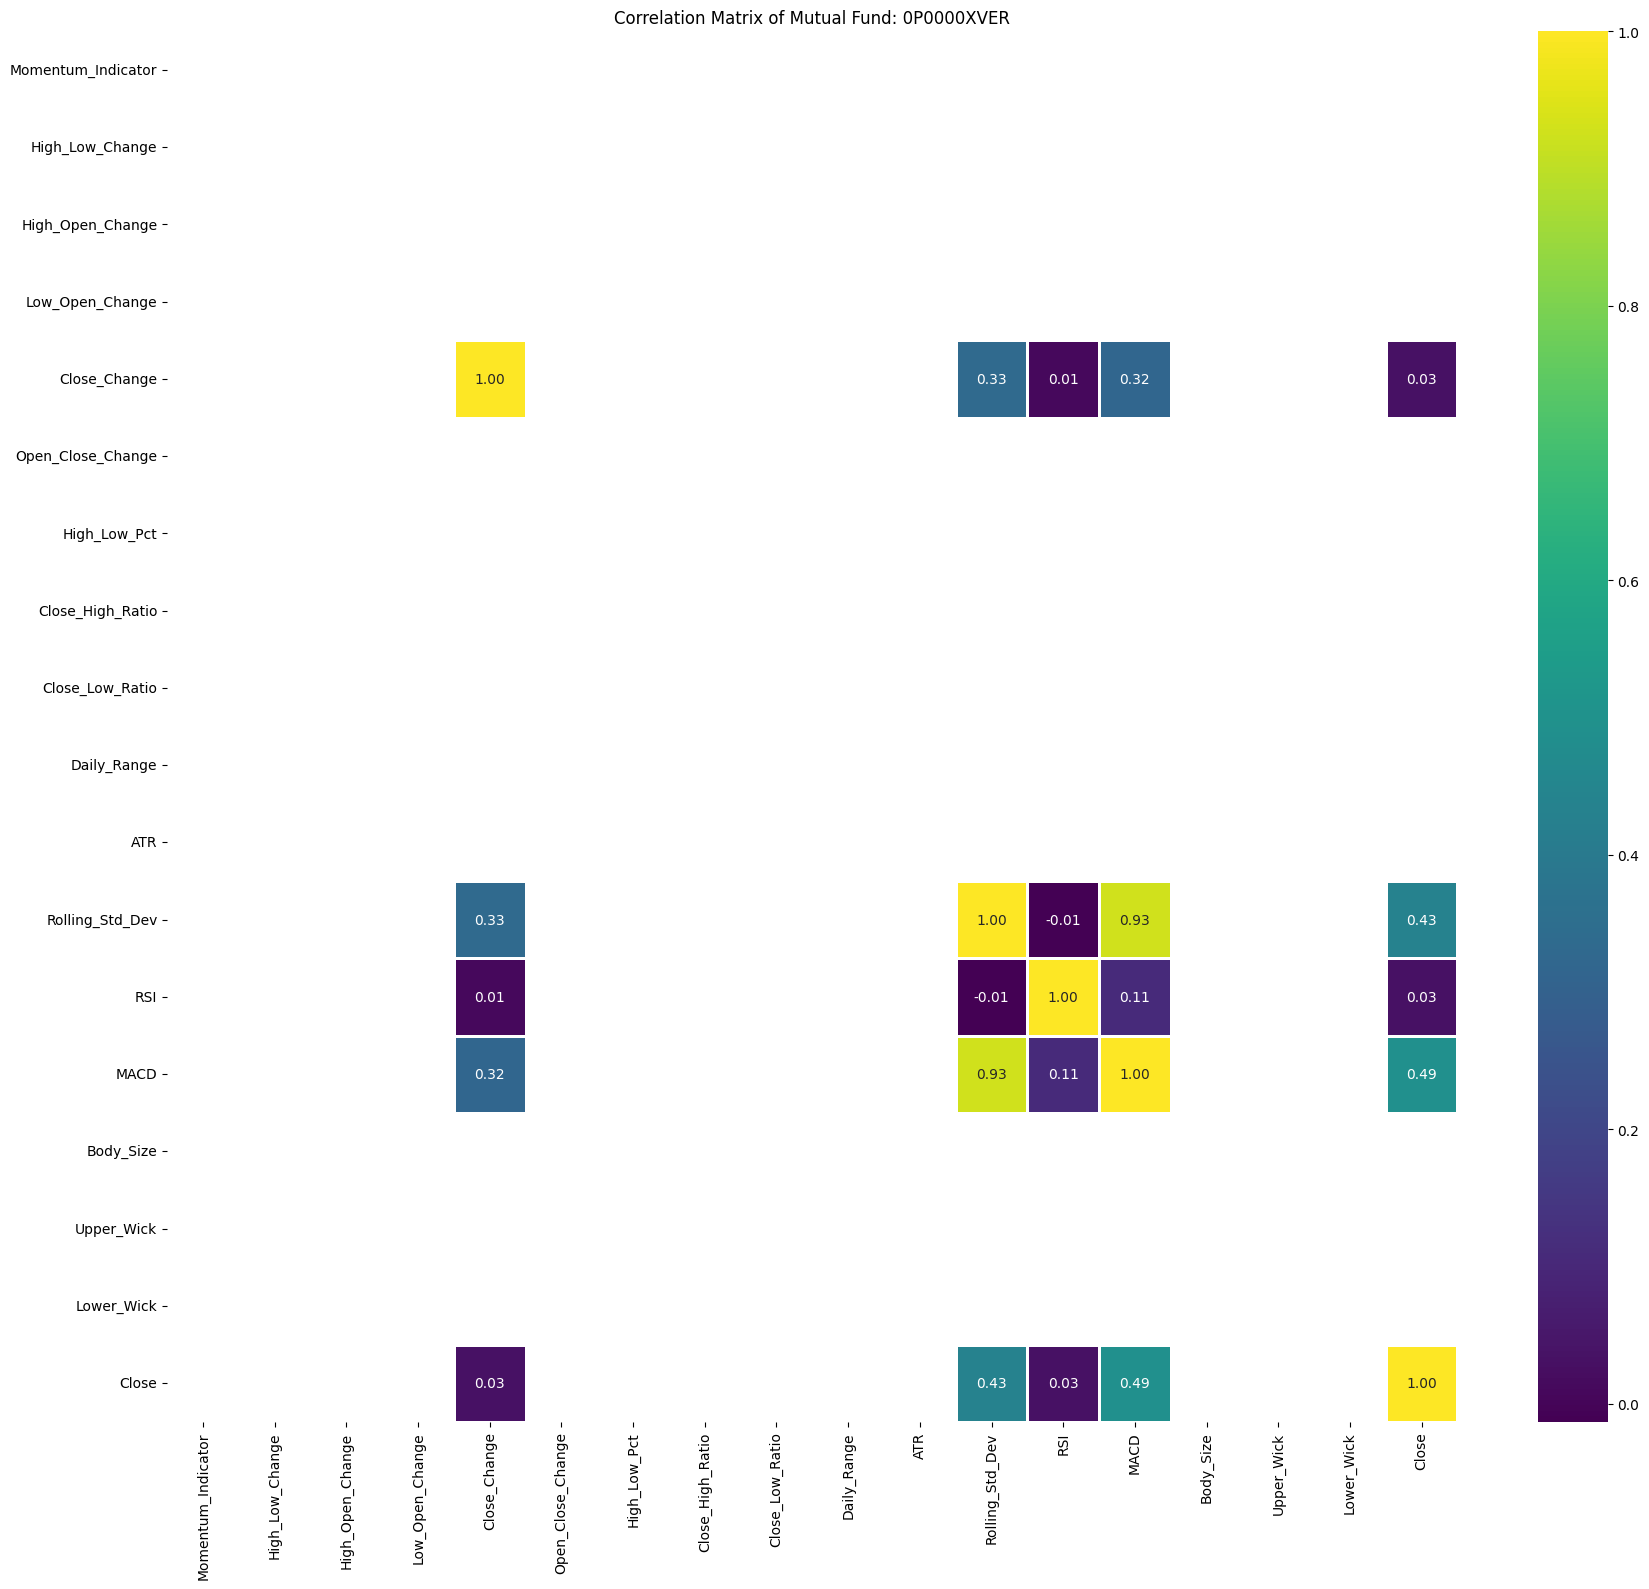


Processing Mutual Fund: 0P0000XUYS

Mutual Fund: 0P0000XUYS - Feature Importances:
Rolling_Std_Dev       0.443123
MACD                  0.328461
RSI                   0.155152
Close_Change          0.073265
Momentum_Indicator    0.000000
Daily_Range           0.000000
Upper_Wick            0.000000
Body_Size             0.000000
ATR                   0.000000
Close_Low_Ratio       0.000000
High_Low_Change       0.000000
Close_High_Ratio      0.000000
High_Low_Pct          0.000000
Open_Close_Change     0.000000
Low_Open_Change       0.000000
High_Open_Change      0.000000
Lower_Wick            0.000000
dtype: float64


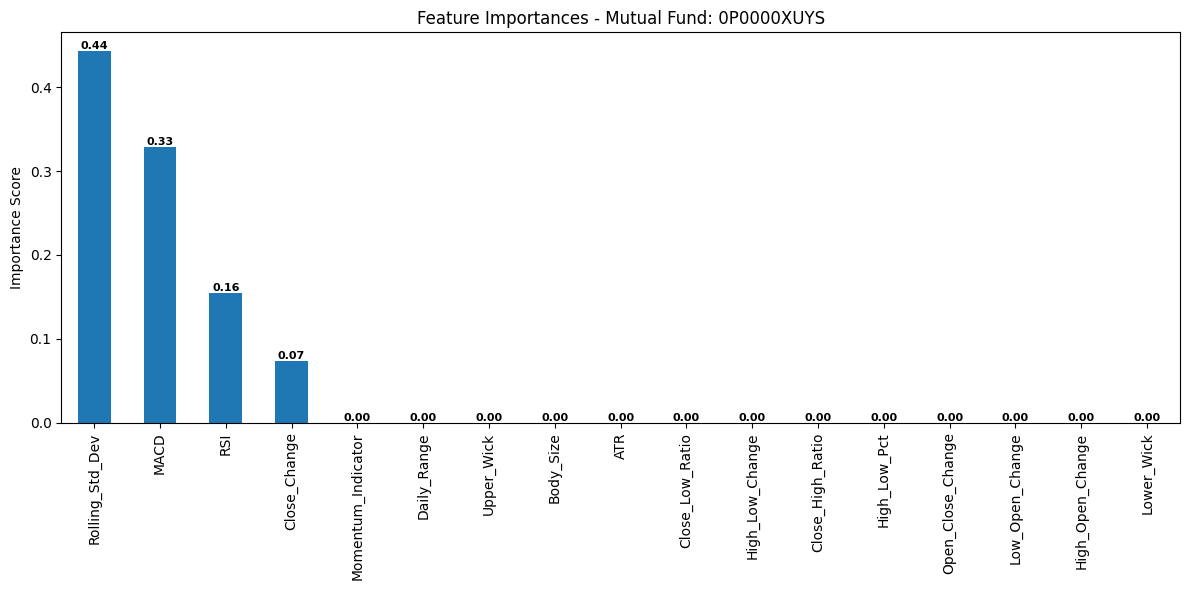

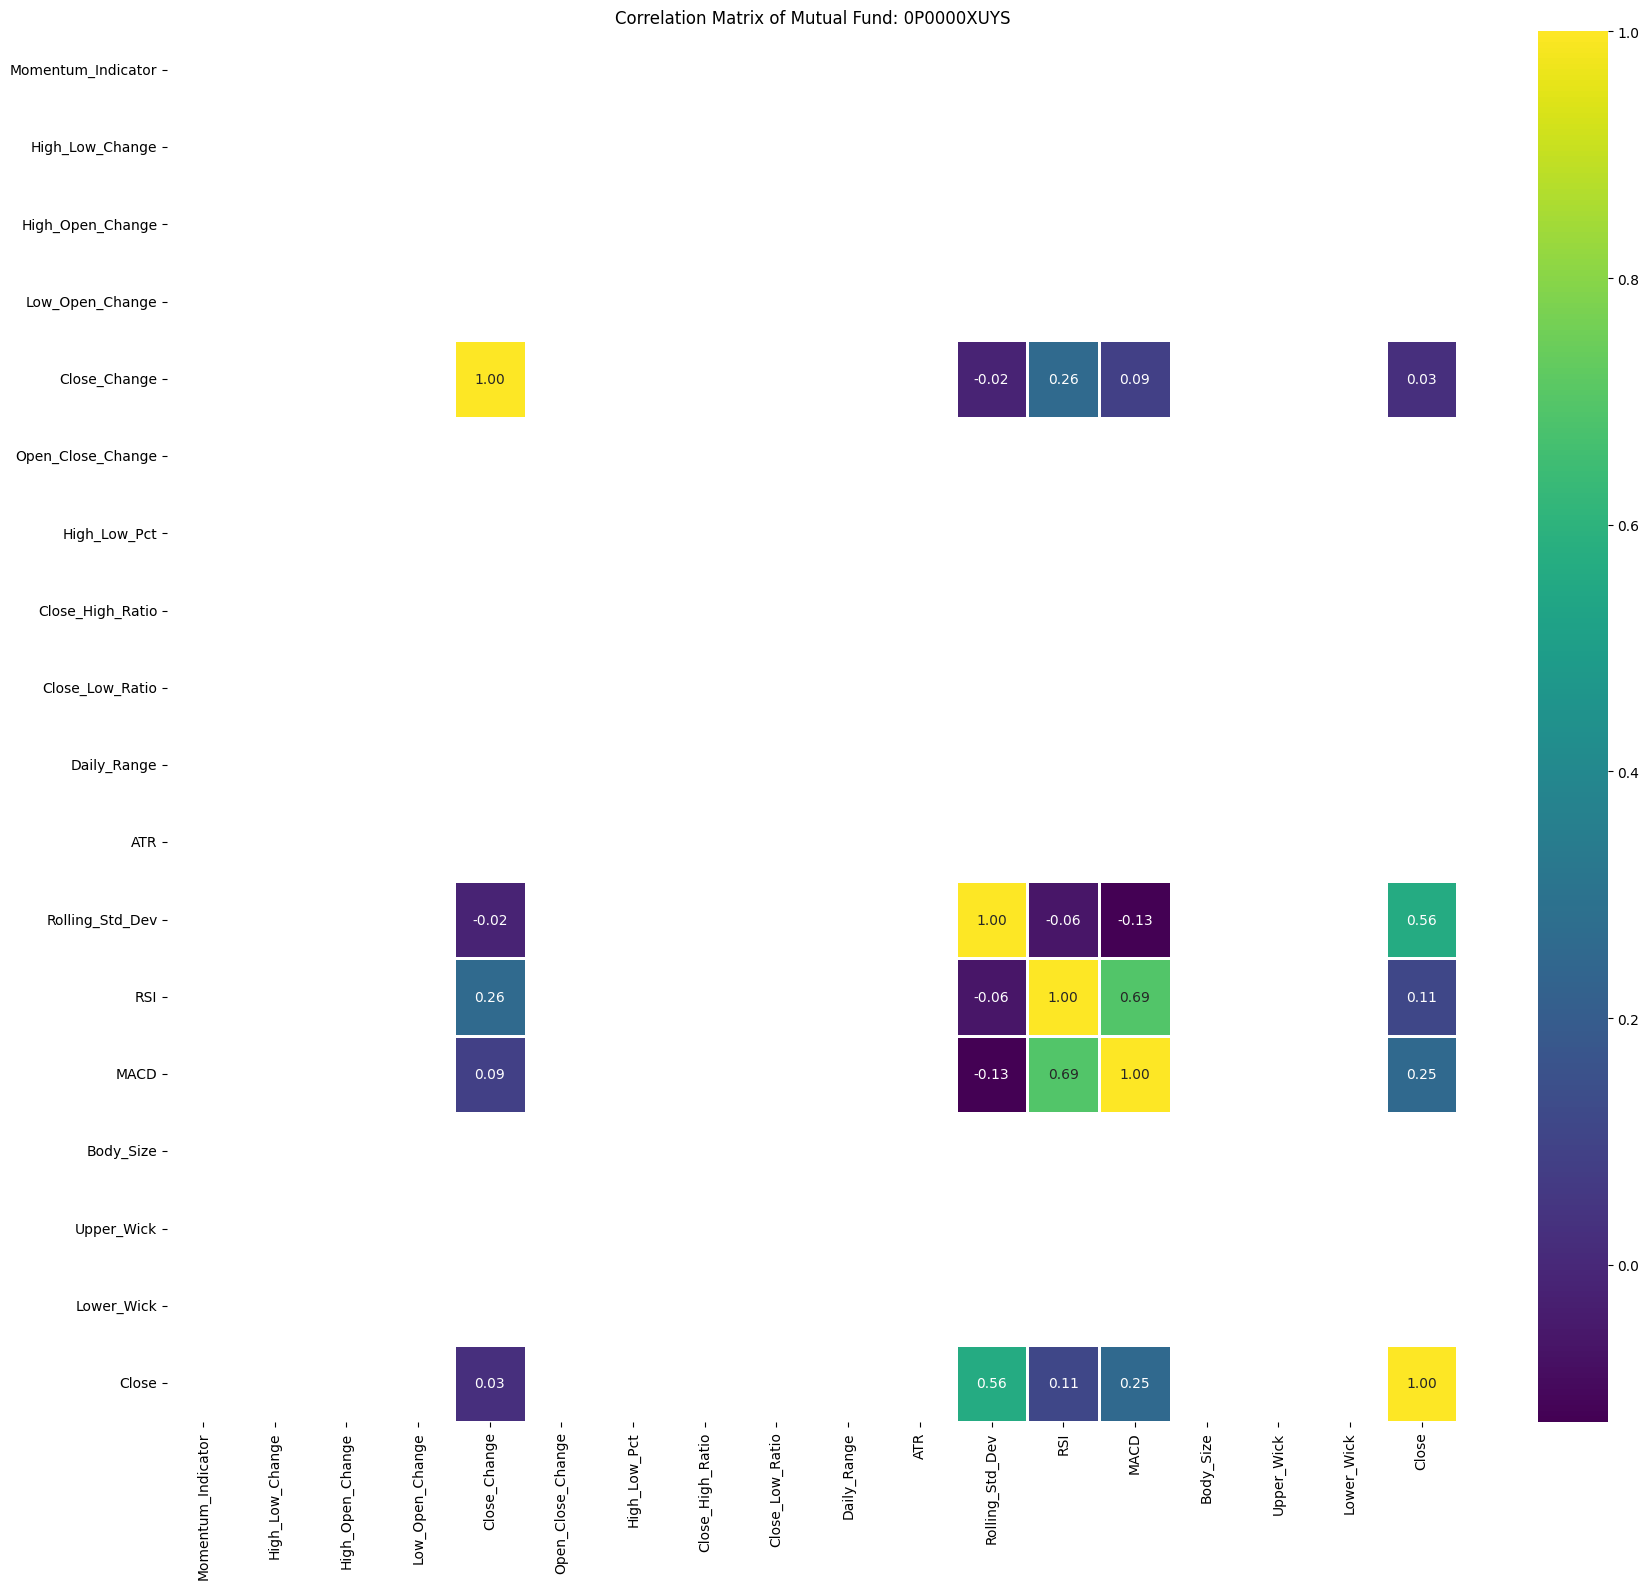


Processing Mutual Fund: 0P0000XW7I

Mutual Fund: 0P0000XW7I - Feature Importances:
Rolling_Std_Dev       0.445146
MACD                  0.270469
RSI                   0.178078
Close_Change          0.106308
Momentum_Indicator    0.000000
Daily_Range           0.000000
Upper_Wick            0.000000
Body_Size             0.000000
ATR                   0.000000
Close_Low_Ratio       0.000000
High_Low_Change       0.000000
Close_High_Ratio      0.000000
High_Low_Pct          0.000000
Open_Close_Change     0.000000
Low_Open_Change       0.000000
High_Open_Change      0.000000
Lower_Wick            0.000000
dtype: float64


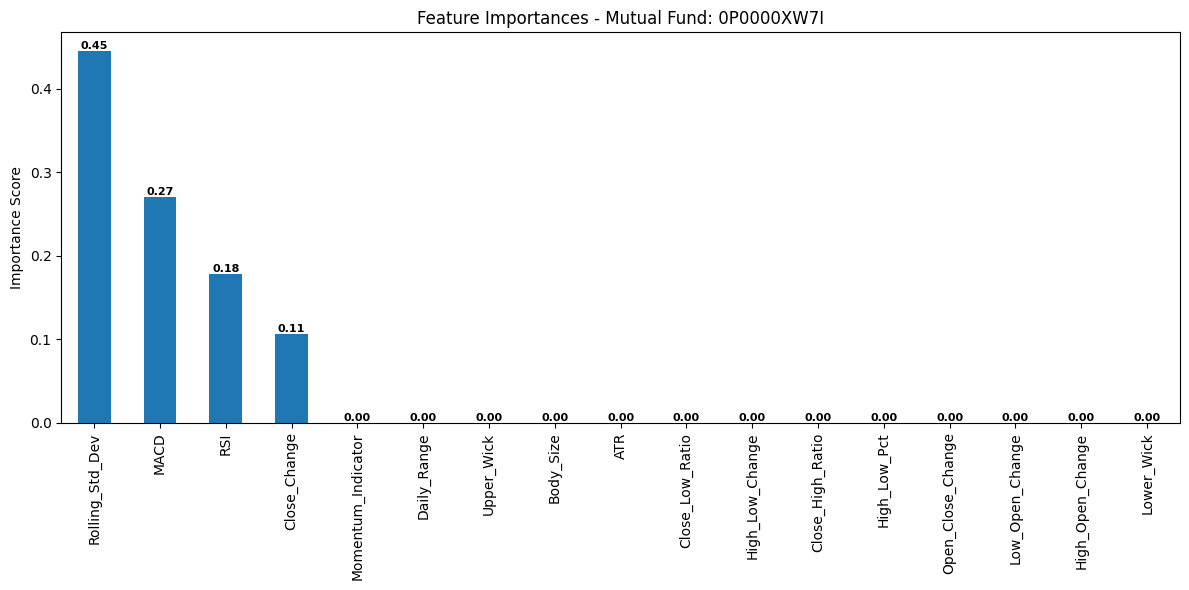

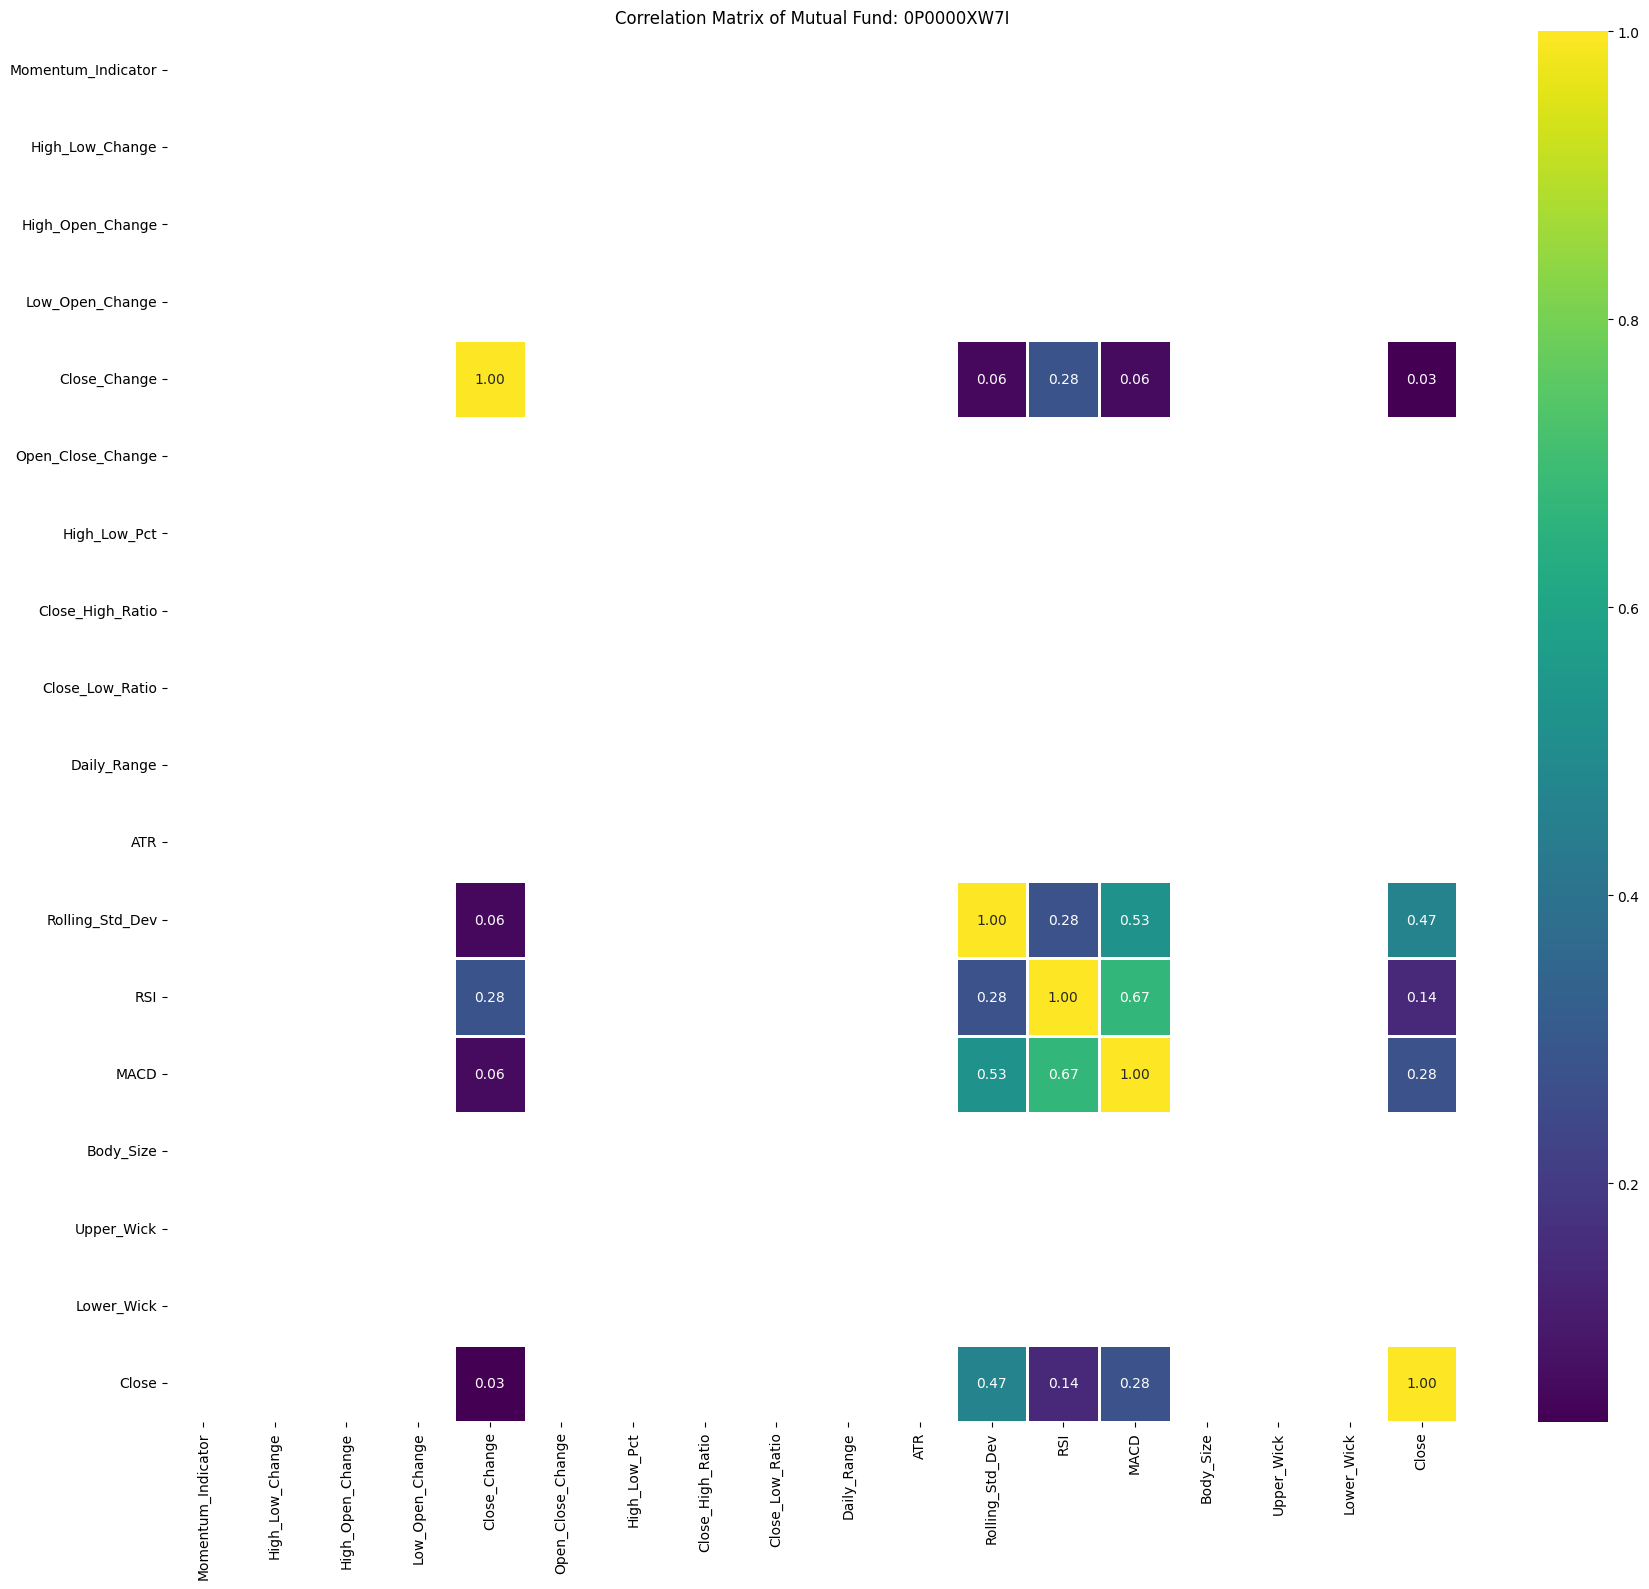


Processing Mutual Fund: 0P0000U3OG

Mutual Fund: 0P0000U3OG - Feature Importances:
Rolling_Std_Dev       0.469552
MACD                  0.258792
RSI                   0.167452
Close_Change          0.104204
Momentum_Indicator    0.000000
Daily_Range           0.000000
Upper_Wick            0.000000
Body_Size             0.000000
ATR                   0.000000
Close_Low_Ratio       0.000000
High_Low_Change       0.000000
Close_High_Ratio      0.000000
High_Low_Pct          0.000000
Open_Close_Change     0.000000
Low_Open_Change       0.000000
High_Open_Change      0.000000
Lower_Wick            0.000000
dtype: float64


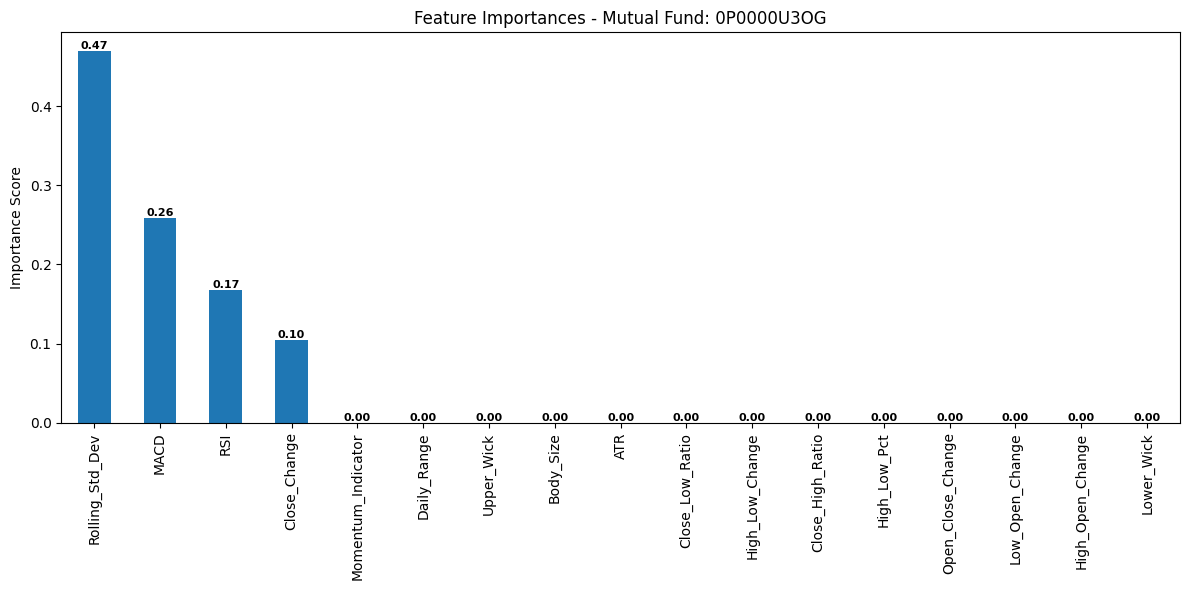

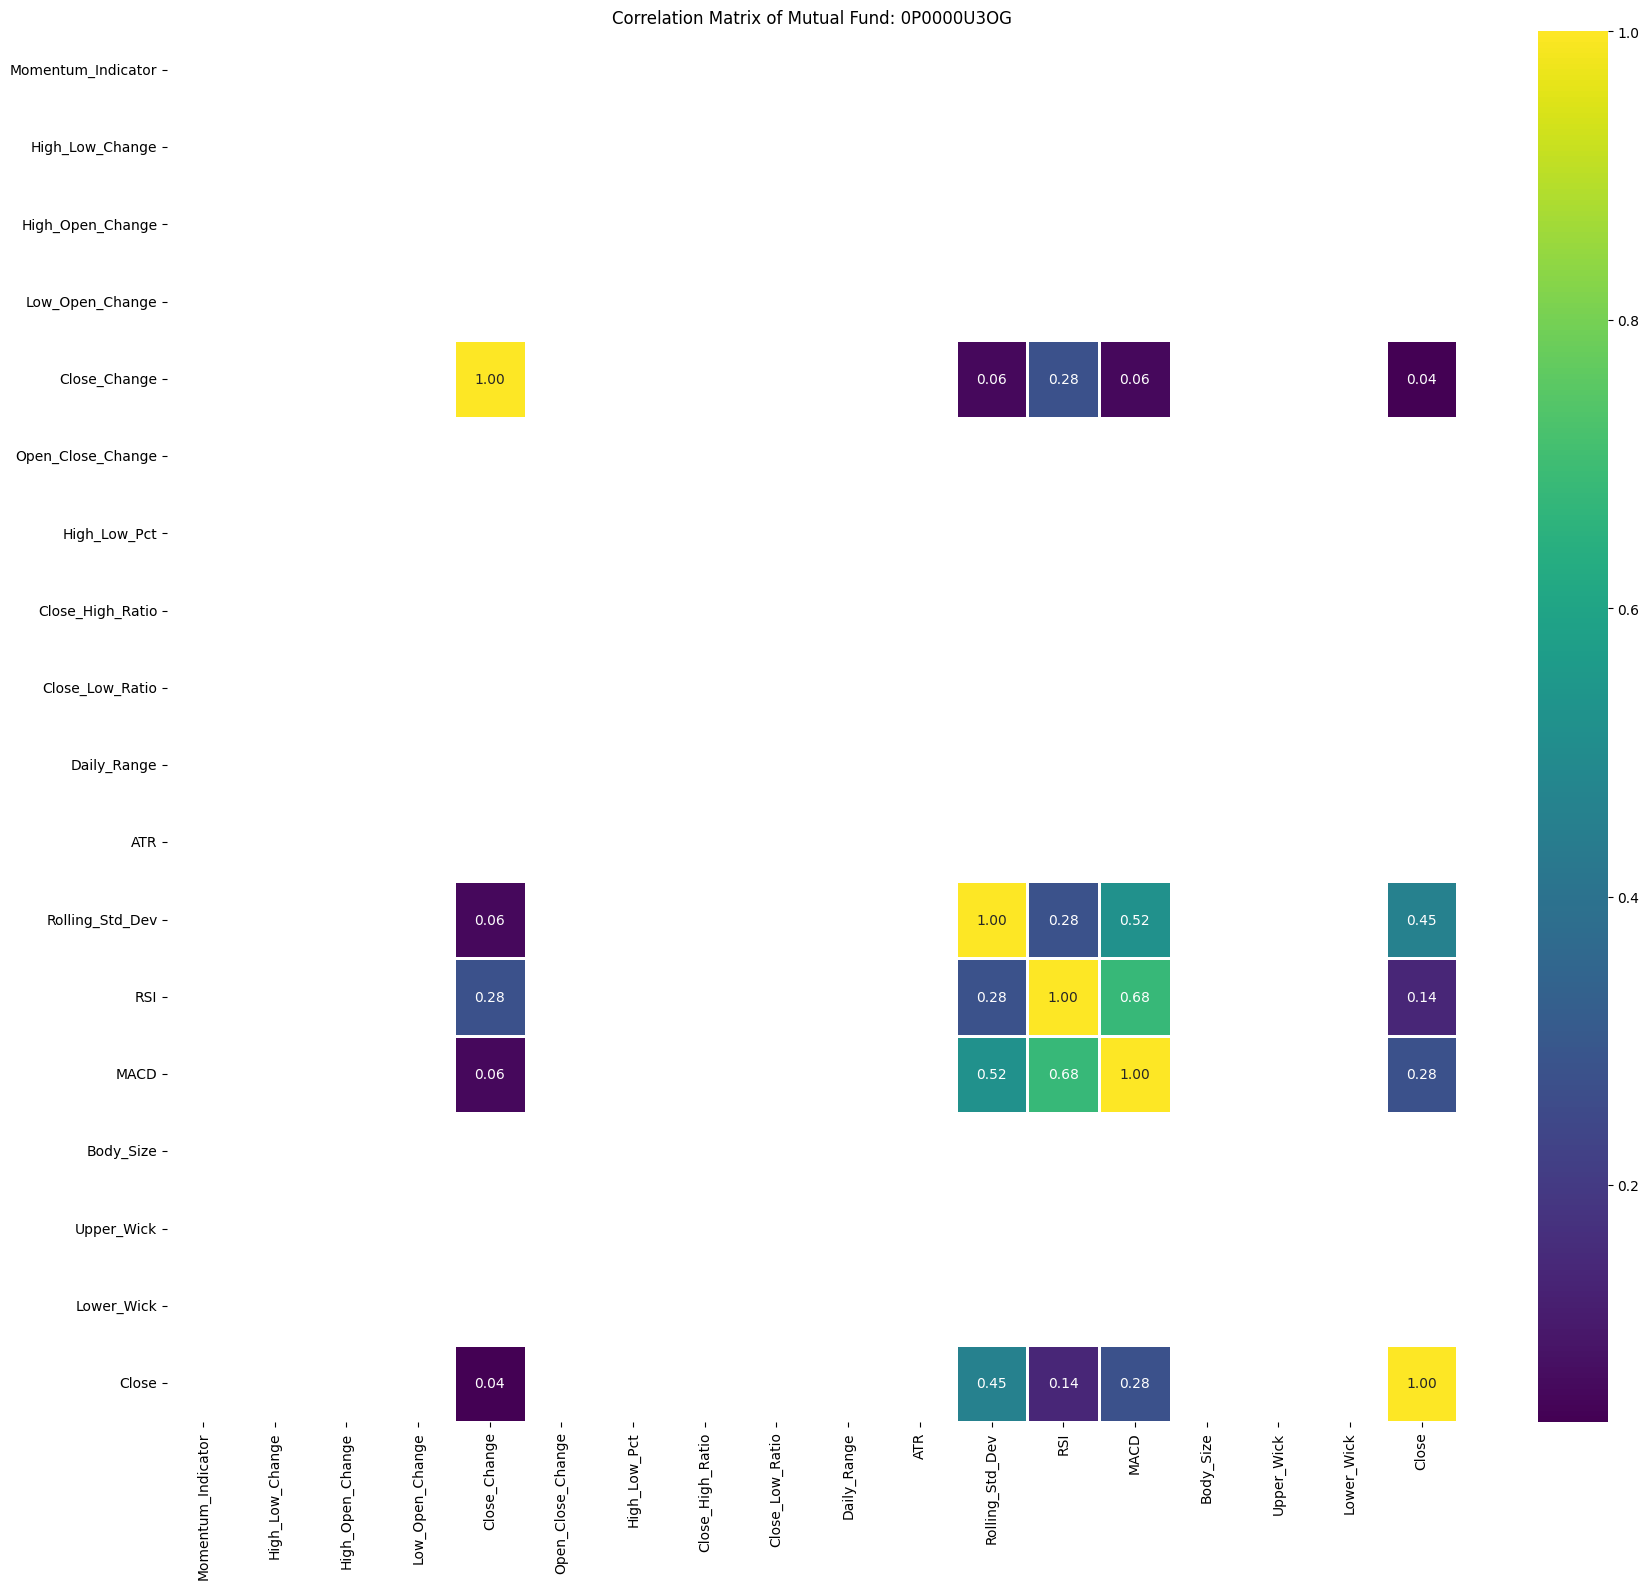


Processing Mutual Fund: SETFGOLD

Mutual Fund: SETFGOLD - Feature Importances:
Daily_Range           0.915353
ATR                   0.072178
MACD                  0.006899
Rolling_Std_Dev       0.001728
RSI                   0.000726
High_Low_Change       0.000536
High_Open_Change      0.000525
Close_High_Ratio      0.000464
High_Low_Pct          0.000459
Close_Low_Ratio       0.000341
Lower_Wick            0.000161
Low_Open_Change       0.000161
Body_Size             0.000139
Close_Change          0.000123
Upper_Wick            0.000087
Momentum_Indicator    0.000070
Open_Close_Change     0.000051
dtype: float64


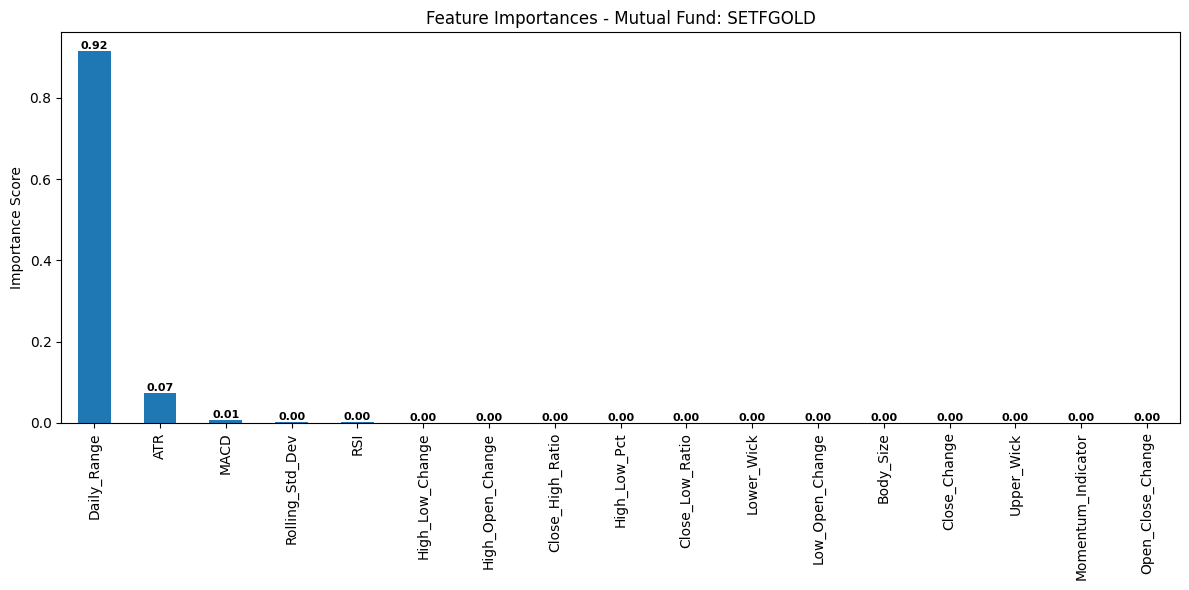

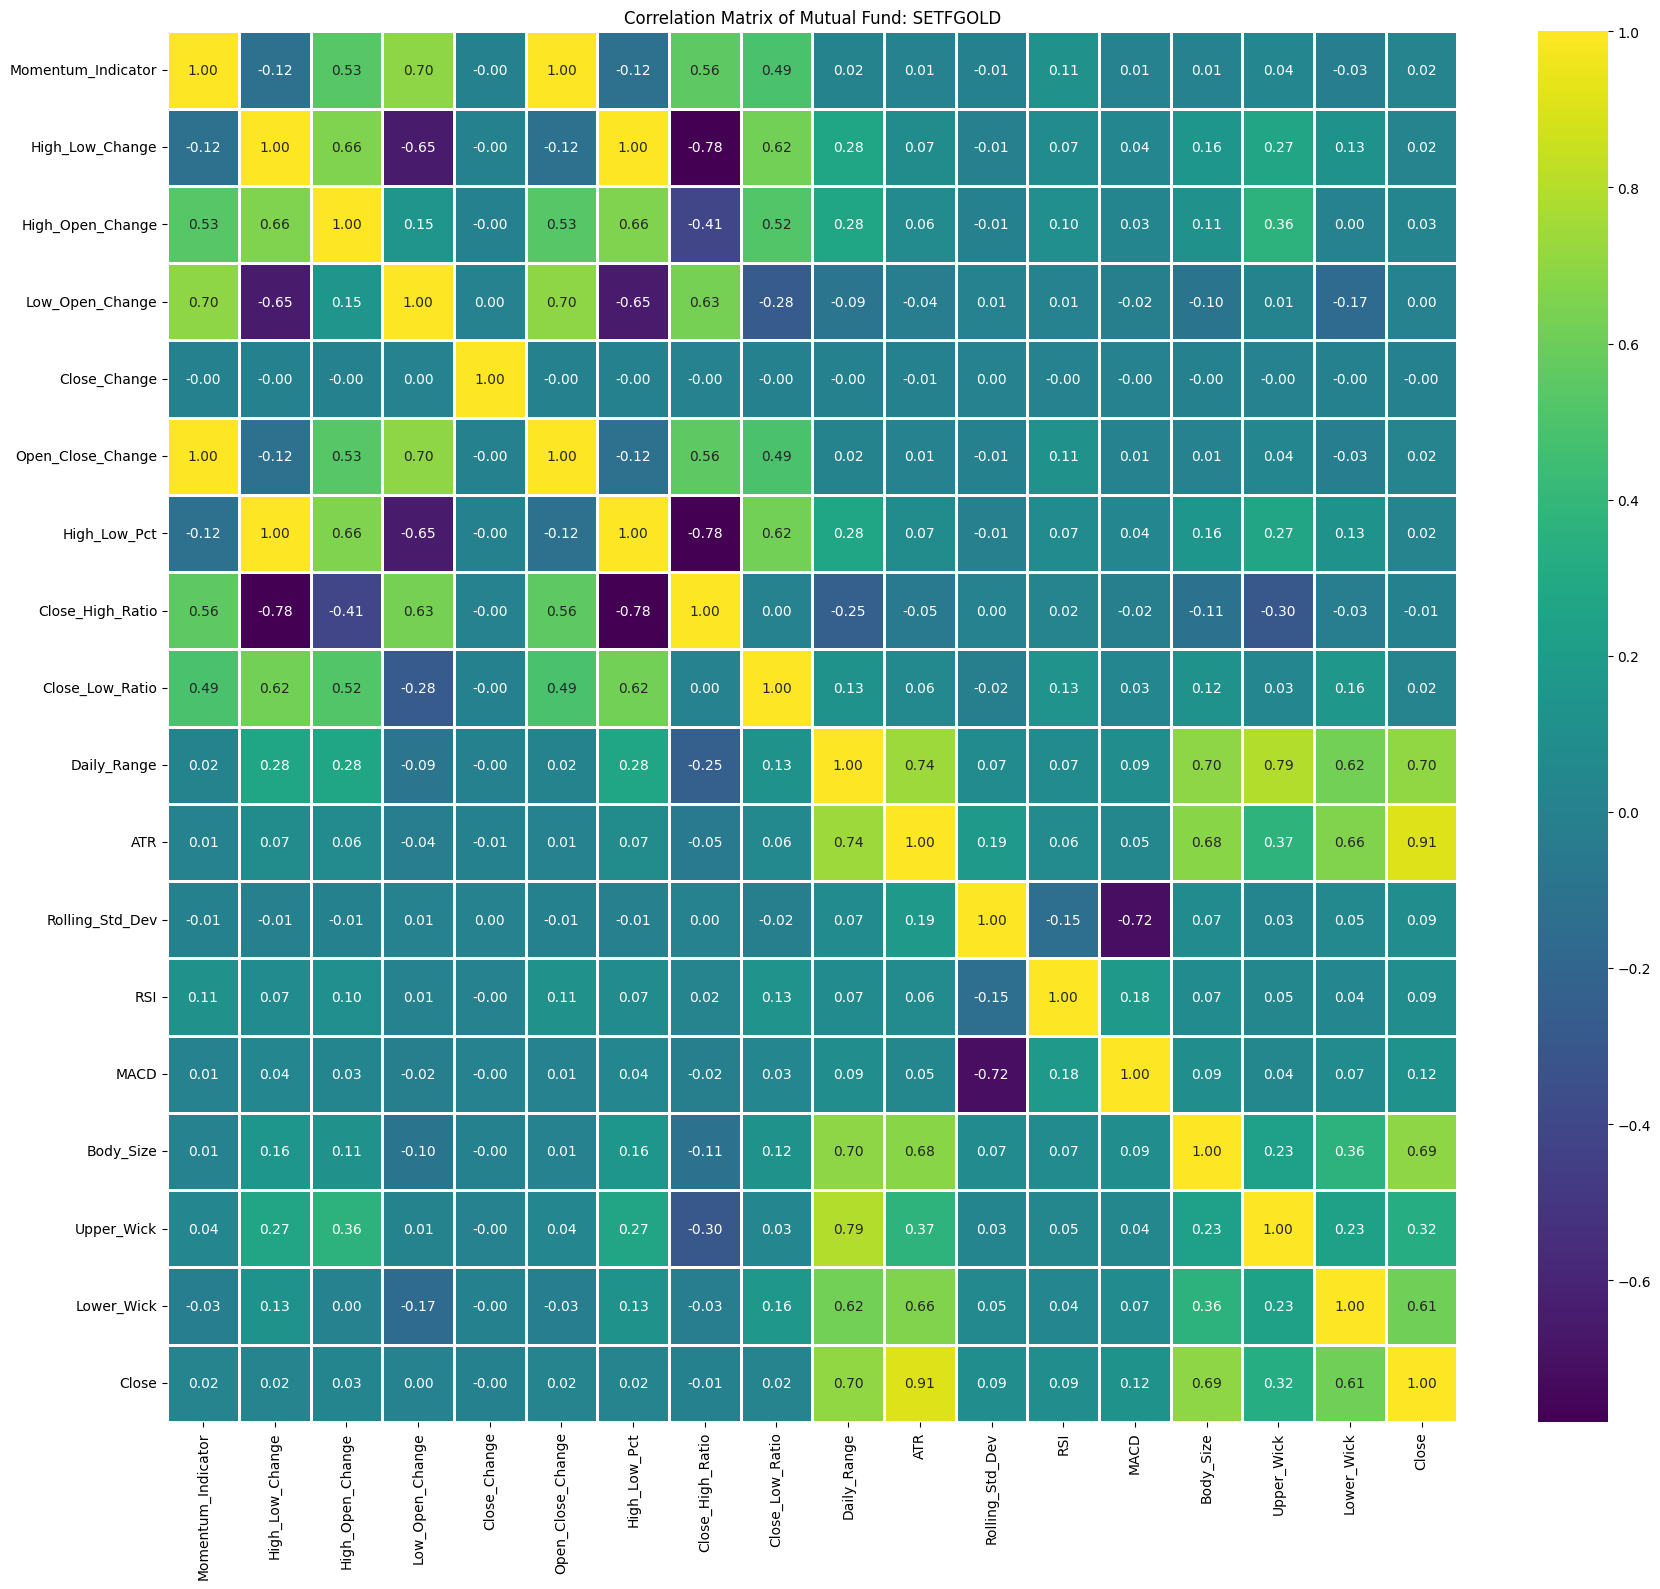


Processing Mutual Fund: BSLGOLDETF

Mutual Fund: BSLGOLDETF - Feature Importances:
ATR                   0.845254
Daily_Range           0.046694
Rolling_Std_Dev       0.026429
High_Low_Change       0.018781
High_Low_Pct          0.018570
MACD                  0.011705
RSI                   0.007203
Lower_Wick            0.006538
Close_Low_Ratio       0.003845
Upper_Wick            0.003165
Close_Change          0.002613
Close_High_Ratio      0.002526
Body_Size             0.002304
Low_Open_Change       0.001626
High_Open_Change      0.001254
Momentum_Indicator    0.000809
Open_Close_Change     0.000684
dtype: float64


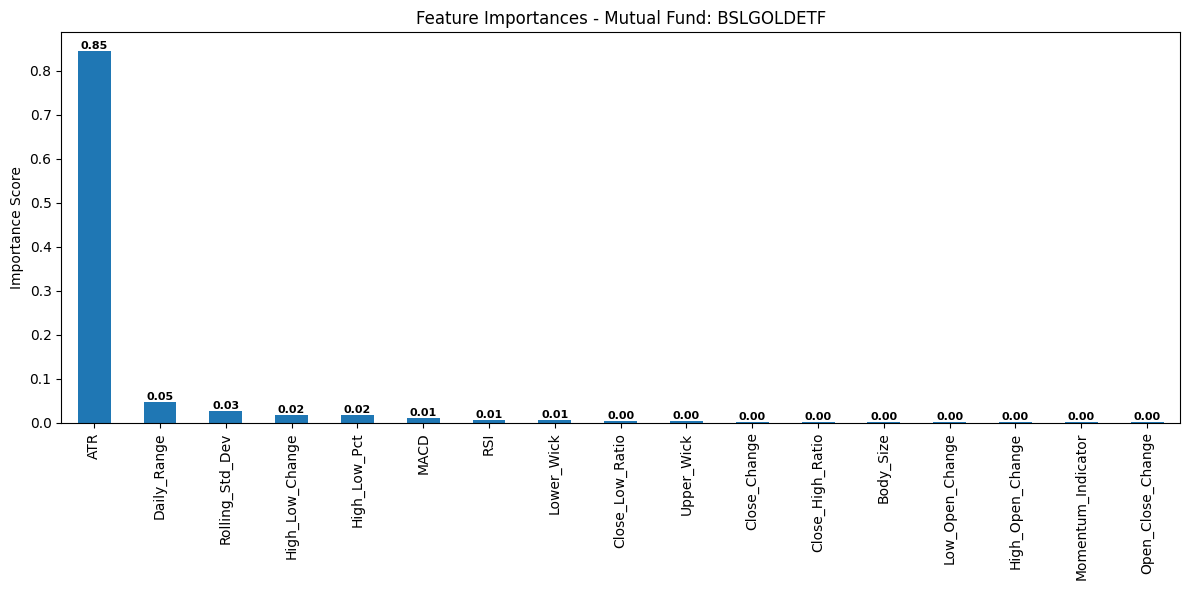

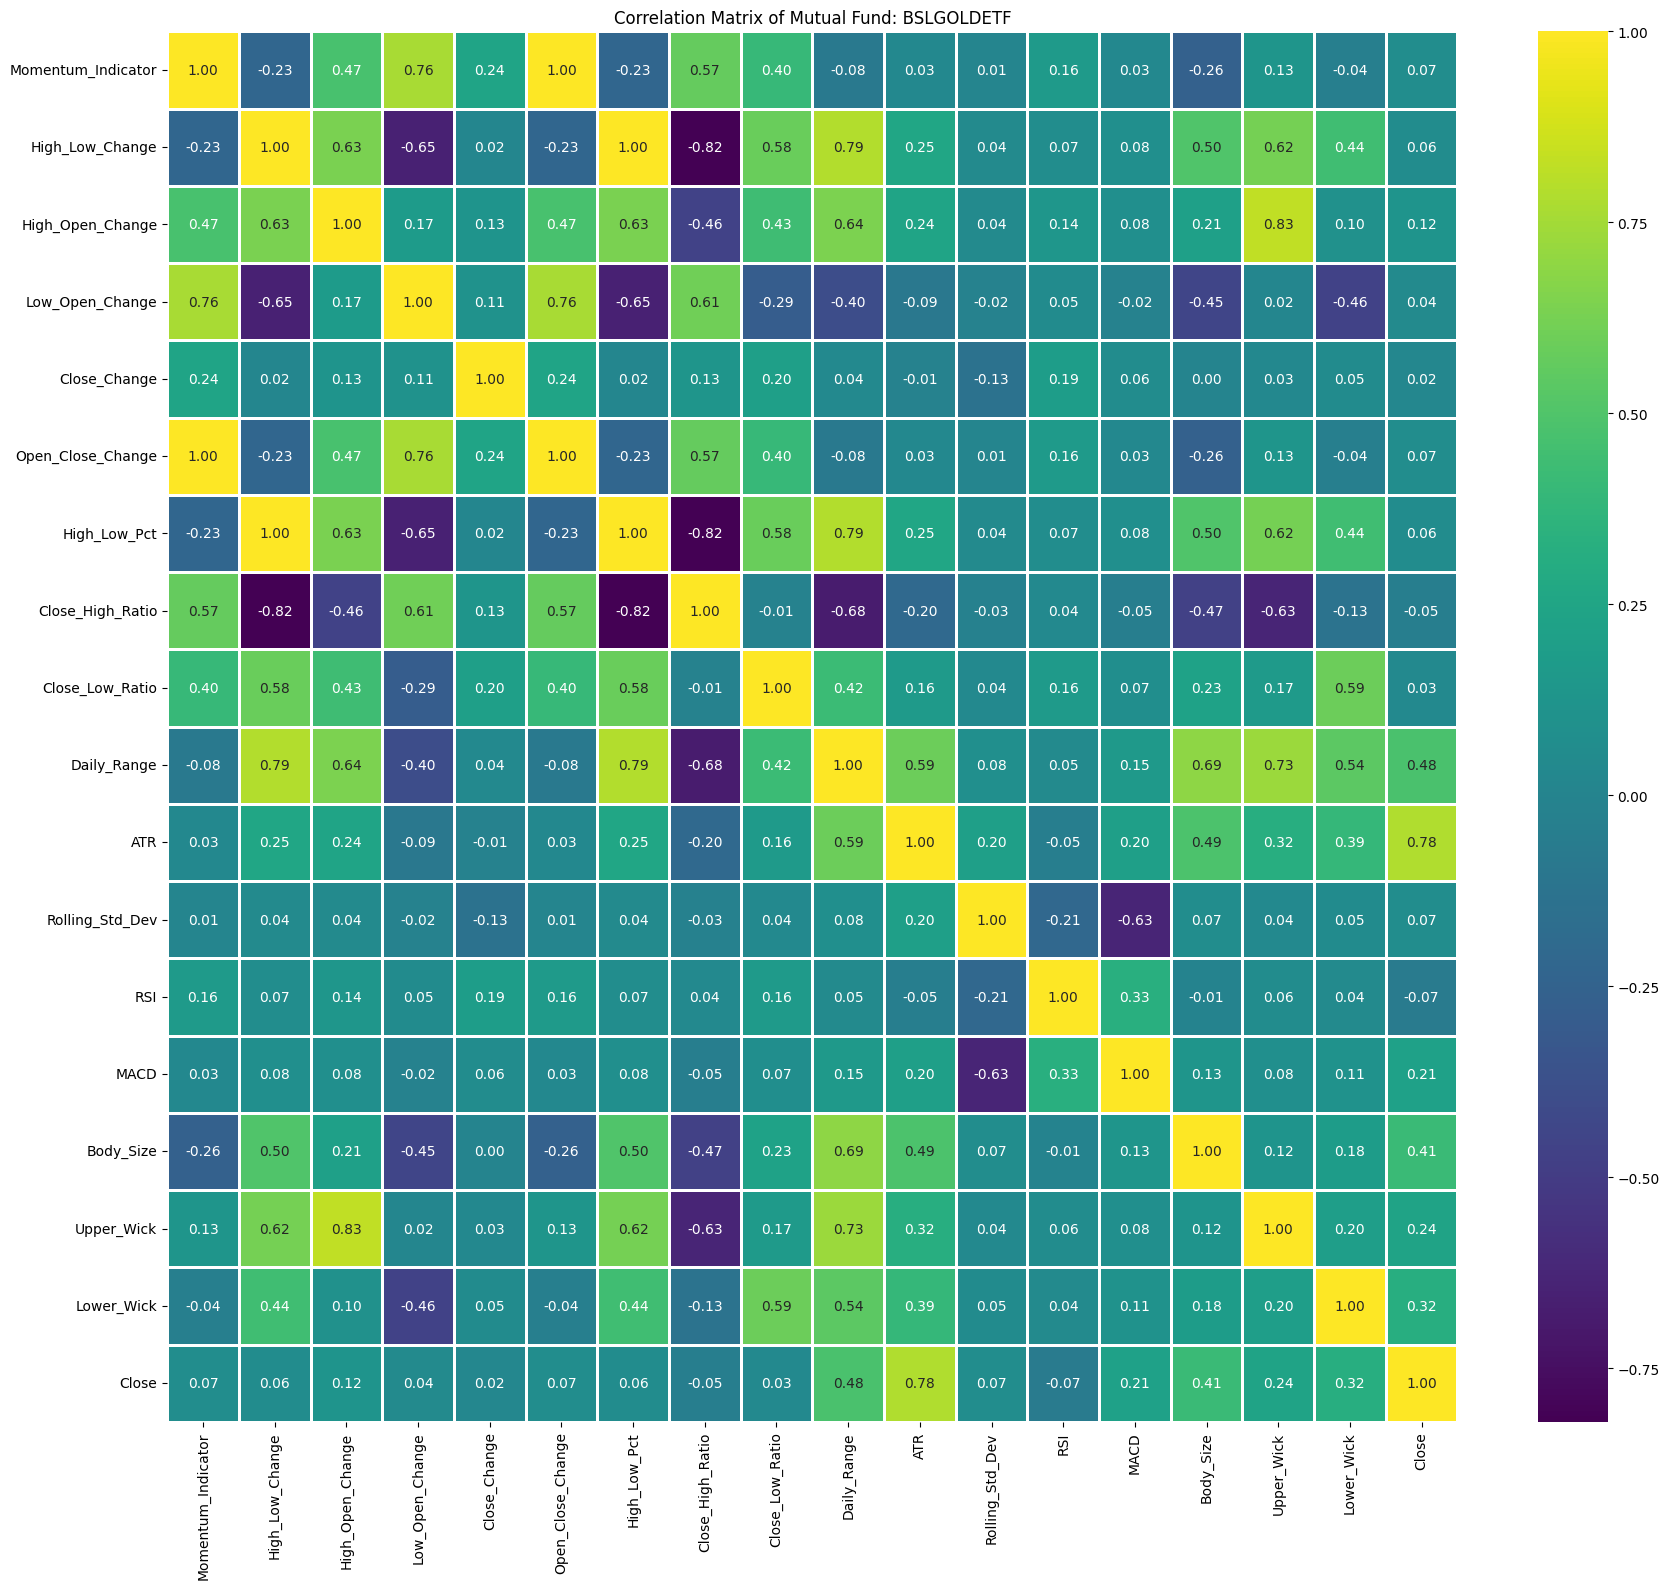

In [33]:
mutual_funds_excel_file = '../Data/Mutual_Funds_Data.xlsx'
all_mutual_funds = pd.read_excel(mutual_funds_excel_file, sheet_name=None)

print("### Feature Selection for Each Mutual Fund ###")
for sheet_name, df in all_mutual_funds.items():
    asset_identifier = f"Mutual Fund: {sheet_name}"
    print(f"\nProcessing {asset_identifier}")
    feat_imp = select_features_rf(df, asset_name=asset_identifier)

### Feature Selection for Gold Bonds

### Feature Selection for Gold Bonds ###

Gold Bonds - Feature Importances:
MACD                  0.301723
ATR                   0.233079
Rolling_Std_Dev       0.173897
RSI                   0.097552
Close_Change          0.062009
Close_High_Ratio      0.022663
Body_Size             0.018619
Daily_Range           0.015840
High_Low_Change       0.010724
High_Low_Pct          0.010468
Low_Open_Change       0.009438
Momentum_Indicator    0.007990
Open_Close_Change     0.007871
Lower_Wick            0.007701
Close_Low_Ratio       0.007425
High_Open_Change      0.006906
Upper_Wick            0.006095
dtype: float64


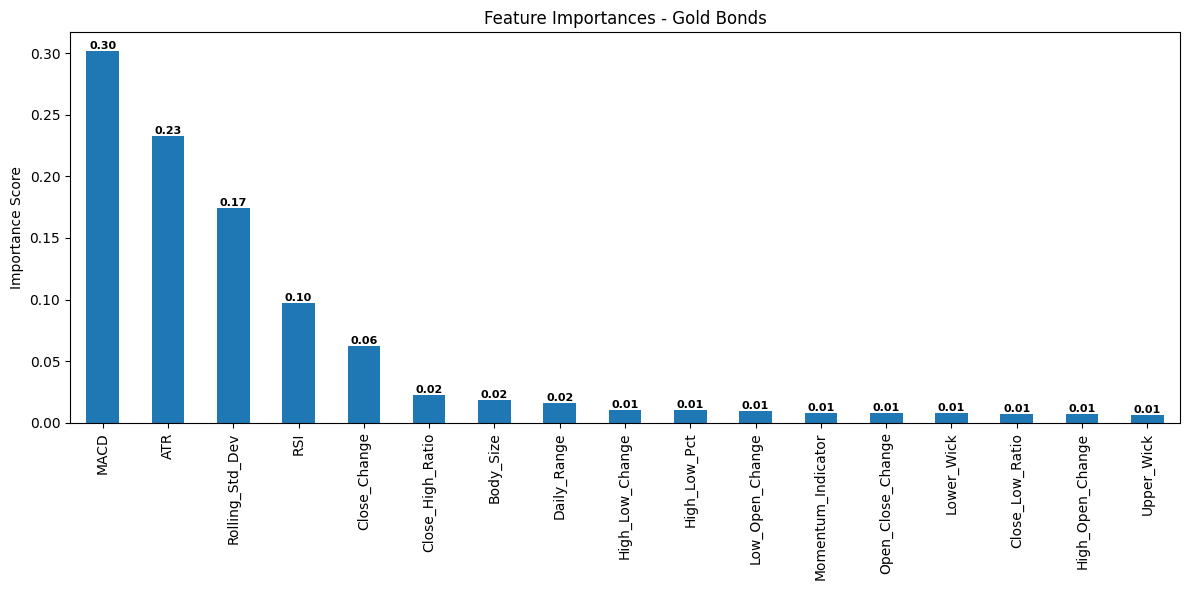

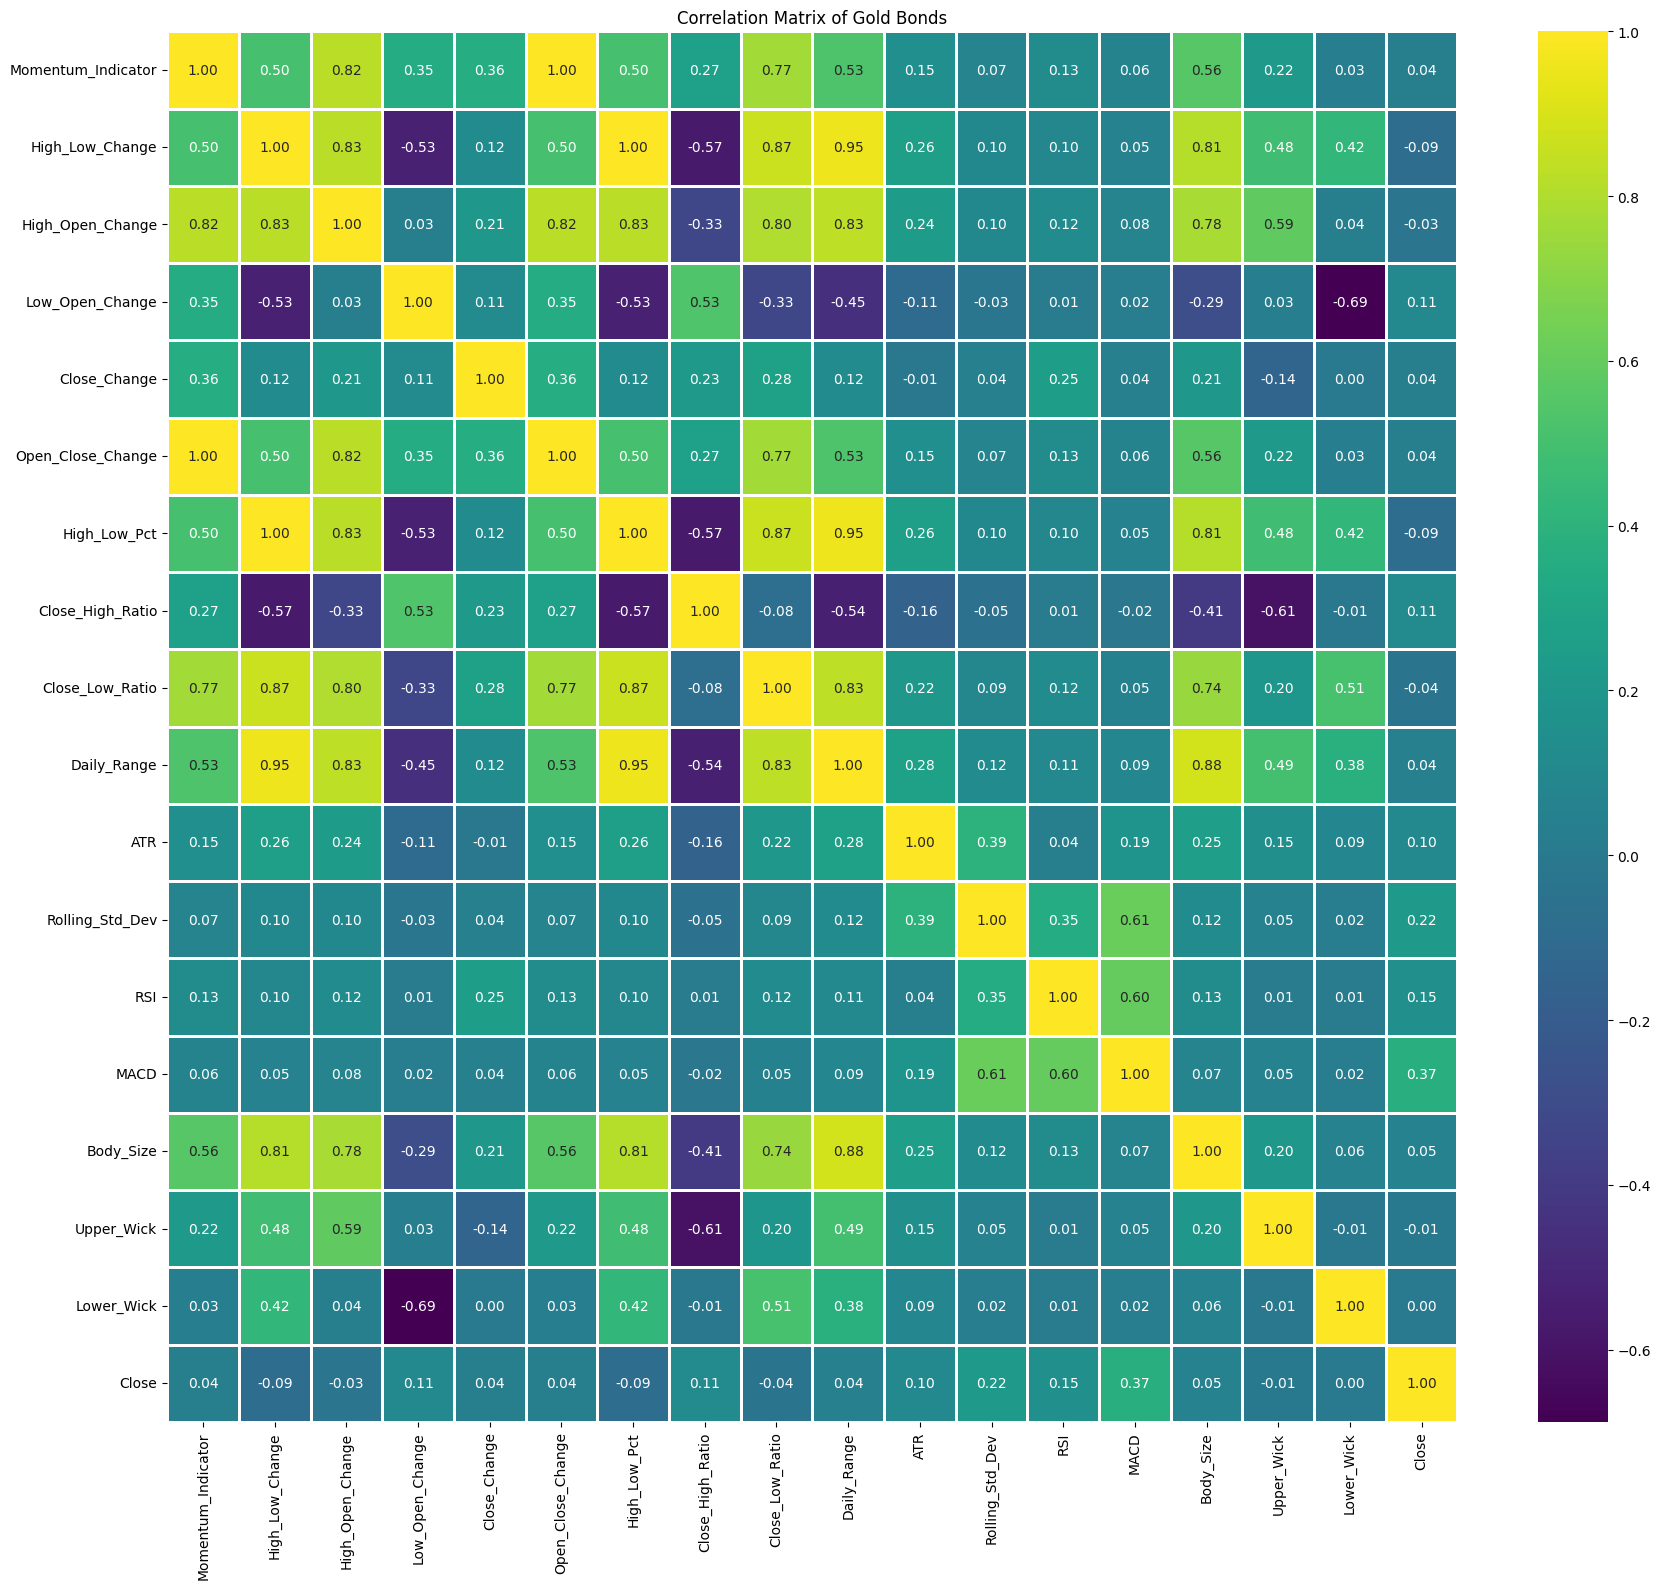

In [34]:
gold_bonds_file = '../Data/Gold_Bond_Data.xlsx'
gold_df = pd.read_excel(gold_bonds_file)

print("### Feature Selection for Gold Bonds ###")
feat_imp_gold = select_features_rf(gold_df, asset_name="Gold Bonds")